### Laboratory of Computational Physics Mod. B 
#### Students

- Marchetti Andrea - 2089216 - andrea.marchetti.5@studenti.unipd.it
- Menti Luca  - 2069534 - luca.menti@studenti.unipd.it
- Merlin Giovanni - 2091186 - giovanni.merlin@studenti.unipd.it
- Saretto Alberto - 2063139 - alberto.saretto.1@studenti.unipd.it


### Exercise 1 (Gradient descent & Deep Neural Networks, DNNs)

Analyze the labeled 2d data x=(x1,x2) introduced in the second lesson, with DNNs.



#### Point 1
Implement a “grid search,” as shown in NB11 (link-> https://github.com/Emergent-Behaviors-in-Biology/mlreview_notebooks/blob/master/NB11_CIX-DNN_mnist_Keras.ipynb), to improve at least two of the aspects or hyperparameters of the model. One aspect is the choice of the minimization algorithm (ADAM, RMSprop, Nesterov, etc.). In the grid search, put at least a second aspect picked from this list:
- activation units (sigmoid, ReLU, ELU, etc.)
- dropout values
- learning rate
- size or number of layers
- rescaling of data

In [4]:
from __future__ import print_function
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import keras,sklearn
# suppress tensorflow compilation warnings
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import numpy as np
seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)
import matplotlib.pyplot as plt

In [5]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout

import matplotlib as mpl
mpl.rc('image', cmap='copper')
import matplotlib.pyplot as plt
# default font
plt.rcParams['font.size'] = 15

%run nonlinear_function.py

# training data
perc_train = 0.8

2
[-31.60811883 -29.54397214] 0.0
[6.77250291 9.5544703 ] 1.0
[46.45145197 15.31770969] 1.0
[24.89066375 15.35698709] 0.0
[24.77148093 46.13067361] 1.0
[-49.16117021 -39.35556233] 0.0
[-20.12962862  15.64111831] 1.0
[30.98125525 37.21759137] 1.0
[46.46475974 22.36853469] 1.0
[14.24753279 21.74536208] 0.0
data: 4000
train: 3200


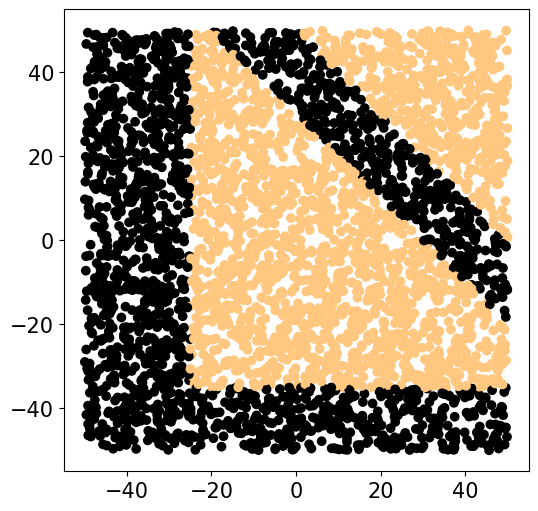

In [6]:
# Keras works with numpy arrays: just use them from the start
TYPE=1
x = np.loadtxt(filename("data"), delimiter=' ')
y = np.loadtxt(filename("labels"), delimiter=' ')
N = len(x)

# dim. of a sample
L = len(x[0])
print(L)

for i in range(10):
    print(x[i],y[i])

N_train = int(perc_train * N)
print(f'data: {N}\ntrain: {N_train}')

plt.figure(figsize = (6,6))
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()


In [7]:

#splitting the data into test and train
(x_train, y_train) = (x[0:N_train],y[0:N_train])
(x_valid, y_valid) = (x[N_train:],y[N_train:])
print("Train:",len(x_train),"\t Validation:",len(x_valid))


#rescaling the data
def Rescale(x, factor=50):
    #return (x-x.mean())/np.sqrt(x.var())
    return x/factor


Train: 3200 	 Validation: 800


In [8]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import SGD,RMSprop,Adagrad, Adadelta, Adam, Adamax, Nadam

In [9]:
optimizers = {'SGD':SGD, 'RMSprop':RMSprop, 'Adagrad':Adagrad, 'Adadelta':Adadelta, 'Adam':Adam, 'Adamax':Adamax, 'Nadam':Nadam}

In [10]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Dense, Dropout, Rescaling
from keras.models import Sequential


# define the create_DNN function
def create_DNN(units=20, activation='relu', dropout=0.01, hid_layers=20, scale=1/50):
    # instantiate model
    model = Sequential()
    model.add(Dense(L, input_shape=(L,), activation=activation))

    for i in range(hid_layers):
        model.add(Dense(units, activation=activation))

    model.add(Dropout(dropout))
    model.add(keras.layers.Rescaling(scale=scale))
    model.add(Dense(1, activation='sigmoid'))
    
    return model

# define the compile_model function
def compile_model(optimizers=optimizers, lr=0.01, optimizer='Adam', nlayers=3, units=20, activation='relu', dropout=0.01, rescale=1/50):

    opt = optimizers[optimizer](lr=lr)

    # create the model
    model = create_DNN(units=units, activation=activation, dropout=dropout, hid_layers=nlayers)

    # compile the model
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

# training parameters
batch_size = 50
epochs = 100



# define the parameter dictionary for grid search
param_grid = {'optimizer': ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam'], 'lr': [0.001, 0.01, 0.1], 'activation': ['relu', 'tanh', 'sigmoid','elu']}
"""   'units': [10, 20, 30],
    'activation': ['relu', 'tanh', 'sigmoid']
}"""



# call Keras scikit wrapper
model_gridsearch = KerasClassifier(build_fn=compile_model, batch_size=batch_size, epochs=epochs)

# call scikit grid search module
grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs =1, cv=4)
grid_result = grid.fit(x_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
#for mean, stdev, param in zip(means, stds, params):
   # print("%f (%f) with: %r" % (mean, stdev, param))

Epoch 1/100


C:\Users\alber\AppData\Local\Temp\ipykernel_22328\3451139868.py:49: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_gridsearch = KerasClassifier(build_fn=compile_model, batch_size=batch_size, epochs=epochs)
C:\Users\alber\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


48/48 [==============================] - 1s 1ms/step - loss: 0.6962 - accuracy: 0.5108
Epoch 2/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6960 - accuracy: 0.5133
Epoch 3/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6959 - accuracy: 0.5142
Epoch 4/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6958 - accuracy: 0.5138
Epoch 5/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6958 - accuracy: 0.5142
Epoch 6/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6955 - accuracy: 0.5150
Epoch 7/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6954 - accuracy: 0.5142
Epoch 8/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6952 - accuracy: 0.5146
Epoch 9/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6952 - accuracy: 0.5146
Epoch 10/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6951 - accuracy: 0.5142
Epoch 11/100
48/48 [=

48/48 [==============================] - 0s 1ms/step - loss: 0.6875 - accuracy: 0.6267
Epoch 84/100
48/48 [==============================] - 0s 997us/step - loss: 0.6874 - accuracy: 0.6250
Epoch 85/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6873 - accuracy: 0.6263
Epoch 86/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6872 - accuracy: 0.6263
Epoch 87/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6872 - accuracy: 0.6271
Epoch 88/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6871 - accuracy: 0.6258
Epoch 89/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6871 - accuracy: 0.6267
Epoch 90/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6870 - accuracy: 0.6246
Epoch 91/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6869 - accuracy: 0.6242
Epoch 92/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6868 - accuracy: 0.6300
Epoch 93/10

48/48 [==============================] - 0s 1ms/step - loss: 0.6915 - accuracy: 0.5833
Epoch 65/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6916 - accuracy: 0.5788
Epoch 66/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6915 - accuracy: 0.5829
Epoch 67/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6915 - accuracy: 0.5833
Epoch 68/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6915 - accuracy: 0.5817
Epoch 69/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6914 - accuracy: 0.5800
Epoch 70/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6913 - accuracy: 0.5871
Epoch 71/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6914 - accuracy: 0.5825
Epoch 72/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6913 - accuracy: 0.5838
Epoch 73/100
48/48 [==============================] - 0s 997us/step - loss: 0.6913 - accuracy: 0.5779
Epoch 74/10

48/48 [==============================] - 0s 1ms/step - loss: 0.6871 - accuracy: 0.5242
Epoch 46/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6869 - accuracy: 0.5238
Epoch 47/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6866 - accuracy: 0.5238
Epoch 48/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6864 - accuracy: 0.5242
Epoch 49/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6866 - accuracy: 0.5238
Epoch 50/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6864 - accuracy: 0.5238
Epoch 51/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6862 - accuracy: 0.5238
Epoch 52/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6861 - accuracy: 0.5238
Epoch 53/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6860 - accuracy: 0.5238
Epoch 54/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6858 - accuracy: 0.5238
Epoch 55/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6907 - accuracy: 0.5612
Epoch 27/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6906 - accuracy: 0.5600
Epoch 28/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6904 - accuracy: 0.5612
Epoch 29/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6900 - accuracy: 0.5600
Epoch 30/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6896 - accuracy: 0.5708
Epoch 31/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6894 - accuracy: 0.5708
Epoch 32/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6889 - accuracy: 0.5800
Epoch 33/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6887 - accuracy: 0.5821
Epoch 34/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6884 - accuracy: 0.5917
Epoch 35/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6882 - accuracy: 0.5875
Epoch 36/100


C:\Users\alber\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


48/48 [==============================] - 1s 1ms/step - loss: 0.6918 - accuracy: 0.5921
Epoch 2/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6882 - accuracy: 0.6133
Epoch 3/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6815 - accuracy: 0.6263
Epoch 4/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6725 - accuracy: 0.6175
Epoch 5/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6635 - accuracy: 0.6292
Epoch 6/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6562 - accuracy: 0.6329
Epoch 7/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6541 - accuracy: 0.6346
Epoch 8/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6512 - accuracy: 0.6325
Epoch 9/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6498 - accuracy: 0.6358
Epoch 10/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6484 - accuracy: 0.6400
Epoch 11/100
48/48 [=

48/48 [==============================] - 0s 1ms/step - loss: 0.5221 - accuracy: 0.7387
Epoch 84/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5201 - accuracy: 0.7383
Epoch 85/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5164 - accuracy: 0.7454
Epoch 86/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5178 - accuracy: 0.7387
Epoch 87/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5151 - accuracy: 0.7375
Epoch 88/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5141 - accuracy: 0.7412
Epoch 89/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5136 - accuracy: 0.7458
Epoch 90/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5126 - accuracy: 0.7437
Epoch 91/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5107 - accuracy: 0.7400
Epoch 92/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5129 - accuracy: 0.7429
Epoch 93/100


48/48 [==============================] - 0s 1ms/step - loss: 0.3622 - accuracy: 0.8542
Epoch 65/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3583 - accuracy: 0.8571
Epoch 66/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3556 - accuracy: 0.8529
Epoch 67/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3528 - accuracy: 0.8600
Epoch 68/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3481 - accuracy: 0.8587
Epoch 69/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3458 - accuracy: 0.8604
Epoch 70/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3425 - accuracy: 0.8621
Epoch 71/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3368 - accuracy: 0.8621
Epoch 72/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3368 - accuracy: 0.8637
Epoch 73/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3313 - accuracy: 0.8654
Epoch 74/100


48/48 [==============================] - 0s 1ms/step - loss: 0.5103 - accuracy: 0.7317
Epoch 46/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5092 - accuracy: 0.7271
Epoch 47/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5084 - accuracy: 0.7308
Epoch 48/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5057 - accuracy: 0.7317
Epoch 49/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5040 - accuracy: 0.7325
Epoch 50/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5036 - accuracy: 0.7329
Epoch 51/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5026 - accuracy: 0.7329
Epoch 52/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5008 - accuracy: 0.7346
Epoch 53/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4979 - accuracy: 0.7371
Epoch 54/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4975 - accuracy: 0.7375
Epoch 55/100


48/48 [==============================] - 0s 1ms/step - loss: 0.5223 - accuracy: 0.7246
Epoch 27/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5221 - accuracy: 0.7279
Epoch 28/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5205 - accuracy: 0.7271
Epoch 29/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5189 - accuracy: 0.7271
Epoch 30/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5177 - accuracy: 0.7300
Epoch 31/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5161 - accuracy: 0.7300
Epoch 32/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5139 - accuracy: 0.7354
Epoch 33/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5139 - accuracy: 0.7350
Epoch 34/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5111 - accuracy: 0.7371
Epoch 35/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5097 - accuracy: 0.7358
Epoch 36/100


C:\Users\alber\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adagrad.py:81: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


48/48 [==============================] - 1s 1ms/step - loss: 0.6934 - accuracy: 0.4971
Epoch 2/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.5142
Epoch 3/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.5138
Epoch 4/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5142
Epoch 5/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5138
Epoch 6/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5138
Epoch 7/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5146
Epoch 8/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6928 - accuracy: 0.5142
Epoch 9/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6928 - accuracy: 0.5138
Epoch 10/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6928 - accuracy: 0.5133
Epoch 11/100
48/48 [=

48/48 [==============================] - 0s 1ms/step - loss: 0.6895 - accuracy: 0.6421
Epoch 84/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6895 - accuracy: 0.6408
Epoch 85/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6895 - accuracy: 0.6413
Epoch 86/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6894 - accuracy: 0.6425
Epoch 87/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6894 - accuracy: 0.6425
Epoch 88/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6894 - accuracy: 0.6404
Epoch 89/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6894 - accuracy: 0.6413
Epoch 90/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6893 - accuracy: 0.6433
Epoch 91/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6891 - accuracy: 0.6421
Epoch 92/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6891 - accuracy: 0.6413
Epoch 93/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6837 - accuracy: 0.5108
Epoch 65/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6834 - accuracy: 0.5108
Epoch 66/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6832 - accuracy: 0.5108
Epoch 67/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6829 - accuracy: 0.5108
Epoch 68/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6829 - accuracy: 0.5108
Epoch 69/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6826 - accuracy: 0.5108
Epoch 70/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6825 - accuracy: 0.5108
Epoch 71/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6823 - accuracy: 0.5108
Epoch 72/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6820 - accuracy: 0.5108
Epoch 73/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6819 - accuracy: 0.5108
Epoch 74/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6880 - accuracy: 0.7204
Epoch 46/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6879 - accuracy: 0.7229
Epoch 47/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6879 - accuracy: 0.7217
Epoch 48/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6878 - accuracy: 0.7242
Epoch 49/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6877 - accuracy: 0.7221
Epoch 50/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6877 - accuracy: 0.7250
Epoch 51/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6876 - accuracy: 0.7254
Epoch 52/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6876 - accuracy: 0.7258
Epoch 53/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6875 - accuracy: 0.7292
Epoch 54/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6874 - accuracy: 0.7258
Epoch 55/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6961 - accuracy: 0.5221
Epoch 27/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6960 - accuracy: 0.5225
Epoch 28/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6960 - accuracy: 0.5225
Epoch 29/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6960 - accuracy: 0.5200
Epoch 30/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6960 - accuracy: 0.5213
Epoch 31/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6958 - accuracy: 0.5208
Epoch 32/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6957 - accuracy: 0.5217
Epoch 33/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6957 - accuracy: 0.5208
Epoch 34/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6955 - accuracy: 0.5233
Epoch 35/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6956 - accuracy: 0.5204
Epoch 36/100


C:\Users\alber\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adadelta.py:79: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


48/48 [==============================] - 1s 1ms/step - loss: 0.6940 - accuracy: 0.3867
Epoch 2/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6940 - accuracy: 0.3887
Epoch 3/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6940 - accuracy: 0.3842
Epoch 4/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6939 - accuracy: 0.3842
Epoch 5/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6939 - accuracy: 0.3854
Epoch 6/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6939 - accuracy: 0.3842
Epoch 7/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6938 - accuracy: 0.3833
Epoch 8/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6938 - accuracy: 0.3837
Epoch 9/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6938 - accuracy: 0.3842
Epoch 10/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6937 - accuracy: 0.3896
Epoch 11/100
48/48 [=

48/48 [==============================] - 0s 1ms/step - loss: 0.6913 - accuracy: 0.5971
Epoch 84/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6912 - accuracy: 0.5942
Epoch 85/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6912 - accuracy: 0.5962
Epoch 86/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6912 - accuracy: 0.5942
Epoch 87/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6911 - accuracy: 0.5950
Epoch 88/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6910 - accuracy: 0.6004
Epoch 89/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6910 - accuracy: 0.5950
Epoch 90/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6911 - accuracy: 0.5946
Epoch 91/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6910 - accuracy: 0.5950
Epoch 92/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6910 - accuracy: 0.5942
Epoch 93/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6942 - accuracy: 0.4892
Epoch 65/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6942 - accuracy: 0.4892
Epoch 66/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6942 - accuracy: 0.4892
Epoch 67/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6940 - accuracy: 0.4888
Epoch 68/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6941 - accuracy: 0.4896
Epoch 69/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6942 - accuracy: 0.4892
Epoch 70/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6939 - accuracy: 0.4888
Epoch 71/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6940 - accuracy: 0.4892
Epoch 72/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6938 - accuracy: 0.4892
Epoch 73/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6937 - accuracy: 0.4892
Epoch 74/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6974 - accuracy: 0.3517
Epoch 46/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6975 - accuracy: 0.3512
Epoch 47/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6974 - accuracy: 0.3521
Epoch 48/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6974 - accuracy: 0.3512
Epoch 49/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6974 - accuracy: 0.3512
Epoch 50/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6973 - accuracy: 0.3525
Epoch 51/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6973 - accuracy: 0.3512
Epoch 52/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6973 - accuracy: 0.3521
Epoch 53/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6973 - accuracy: 0.3512
Epoch 54/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6972 - accuracy: 0.3521
Epoch 55/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6986 - accuracy: 0.4796
Epoch 27/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6987 - accuracy: 0.4812
Epoch 28/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6985 - accuracy: 0.4792
Epoch 29/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6985 - accuracy: 0.4779
Epoch 30/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6984 - accuracy: 0.4787
Epoch 31/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6984 - accuracy: 0.4787
Epoch 32/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6983 - accuracy: 0.4787
Epoch 33/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6984 - accuracy: 0.4800
Epoch 34/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6981 - accuracy: 0.4800
Epoch 35/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6982 - accuracy: 0.4792
Epoch 36/100


C:\Users\alber\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


48/48 [==============================] - 1s 1ms/step - loss: 0.6823 - accuracy: 0.5896
Epoch 2/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6689 - accuracy: 0.6208
Epoch 3/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6603 - accuracy: 0.6392
Epoch 4/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6531 - accuracy: 0.6379
Epoch 5/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6476 - accuracy: 0.6408
Epoch 6/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6449 - accuracy: 0.6375
Epoch 7/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6428 - accuracy: 0.6417
Epoch 8/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6417 - accuracy: 0.6400
Epoch 9/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6407 - accuracy: 0.6421
Epoch 10/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6393 - accuracy: 0.6442
Epoch 11/100
48/48 [=

48/48 [==============================] - 0s 1ms/step - loss: 0.5914 - accuracy: 0.6562
Epoch 84/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5845 - accuracy: 0.6375
Epoch 85/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5797 - accuracy: 0.6567
Epoch 86/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5755 - accuracy: 0.6554
Epoch 87/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5736 - accuracy: 0.6558
Epoch 88/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5710 - accuracy: 0.6621
Epoch 89/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5682 - accuracy: 0.6587
Epoch 90/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5665 - accuracy: 0.6583
Epoch 91/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5655 - accuracy: 0.6617
Epoch 92/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5637 - accuracy: 0.6621
Epoch 93/100


48/48 [==============================] - 0s 1ms/step - loss: 0.3756 - accuracy: 0.8504
Epoch 65/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3706 - accuracy: 0.8500
Epoch 66/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3664 - accuracy: 0.8508
Epoch 67/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3604 - accuracy: 0.8550
Epoch 68/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3569 - accuracy: 0.8592
Epoch 69/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3521 - accuracy: 0.8587
Epoch 70/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3485 - accuracy: 0.8542
Epoch 71/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3447 - accuracy: 0.8562
Epoch 72/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3391 - accuracy: 0.8650
Epoch 73/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3375 - accuracy: 0.8596
Epoch 74/100


48/48 [==============================] - 0s 1ms/step - loss: 0.3417 - accuracy: 0.8587
Epoch 46/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3367 - accuracy: 0.8604
Epoch 47/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3342 - accuracy: 0.8567
Epoch 48/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3311 - accuracy: 0.8554
Epoch 49/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3291 - accuracy: 0.8579
Epoch 50/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3286 - accuracy: 0.8533
Epoch 51/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3238 - accuracy: 0.8567
Epoch 52/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3186 - accuracy: 0.8587
Epoch 53/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3146 - accuracy: 0.8629
Epoch 54/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3151 - accuracy: 0.8600
Epoch 55/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6175 - accuracy: 0.6479
Epoch 27/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6154 - accuracy: 0.6504
Epoch 28/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6148 - accuracy: 0.6517
Epoch 29/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6133 - accuracy: 0.6529
Epoch 30/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6116 - accuracy: 0.6525
Epoch 31/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6113 - accuracy: 0.6517
Epoch 32/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6092 - accuracy: 0.6546
Epoch 33/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6087 - accuracy: 0.6529
Epoch 34/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6069 - accuracy: 0.6571
Epoch 35/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6062 - accuracy: 0.6612
Epoch 36/100


C:\Users\alber\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adamax.py:99: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


48/48 [==============================] - 1s 1ms/step - loss: 0.6893 - accuracy: 0.4971
Epoch 2/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6825 - accuracy: 0.5942
Epoch 3/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6774 - accuracy: 0.6004
Epoch 4/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6713 - accuracy: 0.6092
Epoch 5/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6648 - accuracy: 0.6129
Epoch 6/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6586 - accuracy: 0.6162
Epoch 7/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6524 - accuracy: 0.6212
Epoch 8/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6479 - accuracy: 0.6271
Epoch 9/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6444 - accuracy: 0.6338
Epoch 10/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6417 - accuracy: 0.6375
Epoch 11/100
48/48 [=

48/48 [==============================] - 0s 1ms/step - loss: 0.5366 - accuracy: 0.7029
Epoch 84/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5350 - accuracy: 0.7054
Epoch 85/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5347 - accuracy: 0.7079
Epoch 86/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5337 - accuracy: 0.7071
Epoch 87/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5326 - accuracy: 0.7096
Epoch 88/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5319 - accuracy: 0.7092
Epoch 89/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5315 - accuracy: 0.7146
Epoch 90/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5296 - accuracy: 0.7142
Epoch 91/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5287 - accuracy: 0.7167
Epoch 92/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5278 - accuracy: 0.7171
Epoch 93/100


48/48 [==============================] - 0s 1ms/step - loss: 0.5228 - accuracy: 0.7192
Epoch 65/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5221 - accuracy: 0.7167
Epoch 66/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5207 - accuracy: 0.7200
Epoch 67/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5206 - accuracy: 0.7188
Epoch 68/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5203 - accuracy: 0.7196
Epoch 69/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5195 - accuracy: 0.7217
Epoch 70/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5192 - accuracy: 0.7250
Epoch 71/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5182 - accuracy: 0.7225
Epoch 72/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5186 - accuracy: 0.7217
Epoch 73/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5180 - accuracy: 0.7242
Epoch 74/100


48/48 [==============================] - 0s 1ms/step - loss: 0.5256 - accuracy: 0.7412
Epoch 46/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5230 - accuracy: 0.7504
Epoch 47/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5218 - accuracy: 0.7458
Epoch 48/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5195 - accuracy: 0.7513
Epoch 49/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5174 - accuracy: 0.7492
Epoch 50/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5170 - accuracy: 0.7554
Epoch 51/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5150 - accuracy: 0.7596
Epoch 52/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5134 - accuracy: 0.7683
Epoch 53/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5115 - accuracy: 0.7583
Epoch 54/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5104 - accuracy: 0.7658
Epoch 55/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6543 - accuracy: 0.6137
Epoch 27/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6547 - accuracy: 0.6092
Epoch 28/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6539 - accuracy: 0.6137
Epoch 29/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6531 - accuracy: 0.6104
Epoch 30/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6525 - accuracy: 0.6133
Epoch 31/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6530 - accuracy: 0.6087
Epoch 32/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6518 - accuracy: 0.6083
Epoch 33/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6524 - accuracy: 0.6071
Epoch 34/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6514 - accuracy: 0.6067
Epoch 35/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6511 - accuracy: 0.6058
Epoch 36/100


C:\Users\alber\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\nadam.py:86: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


48/48 [==============================] - 1s 1ms/step - loss: 0.6846 - accuracy: 0.5550
Epoch 2/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6639 - accuracy: 0.6092
Epoch 3/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6340 - accuracy: 0.6204
Epoch 4/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6206 - accuracy: 0.6250
Epoch 5/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6143 - accuracy: 0.6321
Epoch 6/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6082 - accuracy: 0.6350
Epoch 7/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6016 - accuracy: 0.6396
Epoch 8/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5936 - accuracy: 0.6513
Epoch 9/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5854 - accuracy: 0.6617
Epoch 10/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5755 - accuracy: 0.6733
Epoch 11/100
48/48 [=

48/48 [==============================] - 0s 1ms/step - loss: 0.4271 - accuracy: 0.8125
Epoch 84/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4237 - accuracy: 0.8104
Epoch 85/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4213 - accuracy: 0.8133
Epoch 86/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4193 - accuracy: 0.8142
Epoch 87/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4165 - accuracy: 0.8129
Epoch 88/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4165 - accuracy: 0.8150
Epoch 89/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4130 - accuracy: 0.8167
Epoch 90/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4117 - accuracy: 0.8167
Epoch 91/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4094 - accuracy: 0.8171
Epoch 92/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4073 - accuracy: 0.8204
Epoch 93/100


48/48 [==============================] - 0s 1ms/step - loss: 0.4070 - accuracy: 0.8175
Epoch 65/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4053 - accuracy: 0.8179
Epoch 66/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4016 - accuracy: 0.8188
Epoch 67/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3989 - accuracy: 0.8229
Epoch 68/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3966 - accuracy: 0.8217
Epoch 69/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3926 - accuracy: 0.8288
Epoch 70/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3918 - accuracy: 0.8279
Epoch 71/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3881 - accuracy: 0.8288
Epoch 72/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3873 - accuracy: 0.8275
Epoch 73/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3835 - accuracy: 0.8321
Epoch 74/100


48/48 [==============================] - 0s 1ms/step - loss: 0.5750 - accuracy: 0.7233
Epoch 46/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5731 - accuracy: 0.7258
Epoch 47/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5721 - accuracy: 0.7242
Epoch 48/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5723 - accuracy: 0.7254
Epoch 49/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5695 - accuracy: 0.7262
Epoch 50/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5668 - accuracy: 0.7271
Epoch 51/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5658 - accuracy: 0.7337
Epoch 52/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5631 - accuracy: 0.7337
Epoch 53/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5611 - accuracy: 0.7342
Epoch 54/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5592 - accuracy: 0.7346
Epoch 55/100


48/48 [==============================] - 0s 1ms/step - loss: 0.5471 - accuracy: 0.7138
Epoch 27/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5458 - accuracy: 0.7146
Epoch 28/100
48/48 [==============================] - 0s 2ms/step - loss: 0.5432 - accuracy: 0.7154
Epoch 29/100
48/48 [==============================] - 0s 2ms/step - loss: 0.5410 - accuracy: 0.7171
Epoch 30/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5388 - accuracy: 0.7188
Epoch 31/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5366 - accuracy: 0.7208
Epoch 32/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5342 - accuracy: 0.7200
Epoch 33/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5314 - accuracy: 0.7221
Epoch 34/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5279 - accuracy: 0.7242
Epoch 35/100
48/48 [==============================] - 0s 2ms/step - loss: 0.5249 - accuracy: 0.7250
Epoch 36/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6924 - accuracy: 0.5350
Epoch 8/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6923 - accuracy: 0.5342
Epoch 9/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6922 - accuracy: 0.5358
Epoch 10/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6919 - accuracy: 0.5417
Epoch 11/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6920 - accuracy: 0.5350
Epoch 12/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6919 - accuracy: 0.5433
Epoch 13/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6917 - accuracy: 0.5408
Epoch 14/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6917 - accuracy: 0.5433
Epoch 15/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6917 - accuracy: 0.5408
Epoch 16/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6916 - accuracy: 0.5433
Epoch 17/100
48

48/48 [==============================] - 0s 1ms/step - loss: 0.6328 - accuracy: 0.6208
Epoch 90/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6299 - accuracy: 0.6267
Epoch 91/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6274 - accuracy: 0.6346
Epoch 92/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6244 - accuracy: 0.6413
Epoch 93/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6218 - accuracy: 0.6433
Epoch 94/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6189 - accuracy: 0.6454
Epoch 95/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6168 - accuracy: 0.6463
Epoch 96/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6147 - accuracy: 0.6533
Epoch 97/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6125 - accuracy: 0.6571
Epoch 98/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6101 - accuracy: 0.6571
Epoch 99/100


48/48 [==============================] - 0s 2ms/step - loss: 0.5191 - accuracy: 0.7542
Epoch 71/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5189 - accuracy: 0.7567
Epoch 72/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5174 - accuracy: 0.7583
Epoch 73/100
48/48 [==============================] - 0s 2ms/step - loss: 0.5143 - accuracy: 0.7646
Epoch 74/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5159 - accuracy: 0.7613
Epoch 75/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5146 - accuracy: 0.7633
Epoch 76/100
48/48 [==============================] - 0s 2ms/step - loss: 0.5129 - accuracy: 0.7663
Epoch 77/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5133 - accuracy: 0.7638
Epoch 78/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5135 - accuracy: 0.7625
Epoch 79/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5148 - accuracy: 0.7638
Epoch 80/100


48/48 [==============================] - 0s 1ms/step - loss: 0.5308 - accuracy: 0.7258
Epoch 52/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5284 - accuracy: 0.7267
Epoch 53/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5270 - accuracy: 0.7283
Epoch 54/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5258 - accuracy: 0.7279
Epoch 55/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5241 - accuracy: 0.7312
Epoch 56/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5230 - accuracy: 0.7287
Epoch 57/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5220 - accuracy: 0.7296
Epoch 58/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5204 - accuracy: 0.7321
Epoch 59/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5191 - accuracy: 0.7325
Epoch 60/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5185 - accuracy: 0.7296
Epoch 61/100


48/48 [==============================] - 0s 2ms/step - loss: 0.6860 - accuracy: 0.5217
Epoch 33/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6858 - accuracy: 0.5217
Epoch 34/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6855 - accuracy: 0.5217
Epoch 35/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6852 - accuracy: 0.5217
Epoch 36/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6848 - accuracy: 0.5217
Epoch 37/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6845 - accuracy: 0.5217
Epoch 38/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6842 - accuracy: 0.5217
Epoch 39/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6839 - accuracy: 0.5217
Epoch 40/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6834 - accuracy: 0.5217
Epoch 41/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6830 - accuracy: 0.5217
Epoch 42/100


48/48 [==============================] - 0s 1ms/step - loss: 0.3295 - accuracy: 0.8462
Epoch 14/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3450 - accuracy: 0.8367
Epoch 15/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3267 - accuracy: 0.8442
Epoch 16/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3279 - accuracy: 0.8450
Epoch 17/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3262 - accuracy: 0.8421
Epoch 18/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3337 - accuracy: 0.8383
Epoch 19/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3233 - accuracy: 0.8425
Epoch 20/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3263 - accuracy: 0.8487
Epoch 21/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3258 - accuracy: 0.8421
Epoch 22/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3193 - accuracy: 0.8446
Epoch 23/100


48/48 [==============================] - 0s 1ms/step - loss: 0.2999 - accuracy: 0.8579
Epoch 96/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3072 - accuracy: 0.8533
Epoch 97/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3026 - accuracy: 0.8542
Epoch 98/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3035 - accuracy: 0.8554
Epoch 99/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3074 - accuracy: 0.8508
Epoch 100/100
16/16 [==============================] - 0s 1ms/step - loss: 0.2688 - accuracy: 0.8813
Epoch 1/100
48/48 [==============================] - 1s 2ms/step - loss: 0.5717 - accuracy: 0.6800
Epoch 2/100
48/48 [==============================] - 0s 2ms/step - loss: 0.5474 - accuracy: 0.6967
Epoch 3/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5379 - accuracy: 0.7063
Epoch 4/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5304 - accuracy: 0.7125
Epoch 5/100
48/4

48/48 [==============================] - 0s 1ms/step - loss: 0.2688 - accuracy: 0.8637
Epoch 77/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2656 - accuracy: 0.8604
Epoch 78/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2713 - accuracy: 0.8575
Epoch 79/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2674 - accuracy: 0.8571
Epoch 80/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2718 - accuracy: 0.8558
Epoch 81/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2662 - accuracy: 0.8617
Epoch 82/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2716 - accuracy: 0.8550
Epoch 83/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2635 - accuracy: 0.8629
Epoch 84/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2658 - accuracy: 0.8587
Epoch 85/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2676 - accuracy: 0.8550
Epoch 86/100


48/48 [==============================] - 0s 1ms/step - loss: 0.2792 - accuracy: 0.8554
Epoch 58/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2786 - accuracy: 0.8583
Epoch 59/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2820 - accuracy: 0.8571
Epoch 60/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2720 - accuracy: 0.8592
Epoch 61/100
48/48 [==============================] - 0s 3ms/step - loss: 0.2760 - accuracy: 0.8554
Epoch 62/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2735 - accuracy: 0.8617
Epoch 63/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2754 - accuracy: 0.8612
Epoch 64/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2741 - accuracy: 0.8562
Epoch 65/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2700 - accuracy: 0.8625
Epoch 66/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2738 - accuracy: 0.8562
Epoch 67/100


48/48 [==============================] - 0s 2ms/step - loss: 0.2588 - accuracy: 0.8800
Epoch 39/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2603 - accuracy: 0.8779
Epoch 40/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2569 - accuracy: 0.8763
Epoch 41/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2499 - accuracy: 0.8829
Epoch 42/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2540 - accuracy: 0.8767
Epoch 43/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2620 - accuracy: 0.8796
Epoch 44/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2461 - accuracy: 0.8883
Epoch 45/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2513 - accuracy: 0.8808
Epoch 46/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2378 - accuracy: 0.8838
Epoch 47/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2408 - accuracy: 0.8838
Epoch 48/100


48/48 [==============================] - 0s 1ms/step - loss: 0.5854 - accuracy: 0.6633
Epoch 20/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5822 - accuracy: 0.6637
Epoch 21/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5799 - accuracy: 0.6642
Epoch 22/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5784 - accuracy: 0.6650
Epoch 23/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5770 - accuracy: 0.6658
Epoch 24/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5758 - accuracy: 0.6675
Epoch 25/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5742 - accuracy: 0.6667
Epoch 26/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5745 - accuracy: 0.6662
Epoch 27/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5733 - accuracy: 0.6692
Epoch 28/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5718 - accuracy: 0.6704
Epoch 29/100


16/16 [==============================] - 0s 1ms/step - loss: 0.5545 - accuracy: 0.7063
Epoch 1/100
48/48 [==============================] - 1s 1ms/step - loss: 0.6973 - accuracy: 0.3883
Epoch 2/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6921 - accuracy: 0.5021
Epoch 3/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6889 - accuracy: 0.5108
Epoch 4/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6859 - accuracy: 0.5108
Epoch 5/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6834 - accuracy: 0.5108
Epoch 6/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6804 - accuracy: 0.5108
Epoch 7/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6776 - accuracy: 0.5108
Epoch 8/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6743 - accuracy: 0.5242
Epoch 9/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6710 - accuracy: 0.6383
Epoch 10/100
48/48 [==

48/48 [==============================] - 0s 2ms/step - loss: 0.6498 - accuracy: 0.6204
Epoch 83/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6497 - accuracy: 0.6225
Epoch 84/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6499 - accuracy: 0.6212
Epoch 85/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6501 - accuracy: 0.6217
Epoch 86/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6497 - accuracy: 0.6196
Epoch 87/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6500 - accuracy: 0.6200
Epoch 88/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6498 - accuracy: 0.6204
Epoch 89/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6499 - accuracy: 0.6175
Epoch 90/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6493 - accuracy: 0.6187
Epoch 91/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6495 - accuracy: 0.6208
Epoch 92/100


48/48 [==============================] - 0s 1ms/step - loss: 0.5412 - accuracy: 0.7113
Epoch 64/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5398 - accuracy: 0.7113
Epoch 65/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5396 - accuracy: 0.7154
Epoch 66/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5388 - accuracy: 0.7133
Epoch 67/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5380 - accuracy: 0.7129
Epoch 68/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5365 - accuracy: 0.7163
Epoch 69/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5380 - accuracy: 0.7154
Epoch 70/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5363 - accuracy: 0.7125
Epoch 71/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5361 - accuracy: 0.7146
Epoch 72/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5358 - accuracy: 0.7163
Epoch 73/100


48/48 [==============================] - 0s 1ms/step - loss: 0.5602 - accuracy: 0.6954
Epoch 45/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5597 - accuracy: 0.6958
Epoch 46/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5610 - accuracy: 0.6975
Epoch 47/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5596 - accuracy: 0.6988
Epoch 48/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5598 - accuracy: 0.6975
Epoch 49/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5591 - accuracy: 0.6979
Epoch 50/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5592 - accuracy: 0.7000
Epoch 51/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5591 - accuracy: 0.7000
Epoch 52/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5590 - accuracy: 0.6979
Epoch 53/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5590 - accuracy: 0.6992
Epoch 54/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6956 - accuracy: 0.4071
Epoch 26/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6955 - accuracy: 0.4062
Epoch 27/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6955 - accuracy: 0.4033
Epoch 28/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6954 - accuracy: 0.4058
Epoch 29/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6953 - accuracy: 0.4075
Epoch 30/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6953 - accuracy: 0.4071
Epoch 31/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6952 - accuracy: 0.4071
Epoch 32/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6952 - accuracy: 0.4087
Epoch 33/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6952 - accuracy: 0.4071
Epoch 34/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6951 - accuracy: 0.4083
Epoch 35/100


48/48 [==============================] - 0s 2ms/step - loss: 0.6905 - accuracy: 0.5396
Epoch 7/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6902 - accuracy: 0.5408
Epoch 8/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6898 - accuracy: 0.5517
Epoch 9/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6895 - accuracy: 0.5579
Epoch 10/100
48/48 [==============================] - 0s 3ms/step - loss: 0.6892 - accuracy: 0.5608
Epoch 11/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6890 - accuracy: 0.5688
Epoch 12/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6886 - accuracy: 0.5708
Epoch 13/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6883 - accuracy: 0.5783
Epoch 14/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6880 - accuracy: 0.5804
Epoch 15/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6877 - accuracy: 0.5775
Epoch 16/100
48/

48/48 [==============================] - 0s 1ms/step - loss: 0.6385 - accuracy: 0.6687
Epoch 89/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6374 - accuracy: 0.6667
Epoch 90/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6367 - accuracy: 0.6687
Epoch 91/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6359 - accuracy: 0.6687
Epoch 92/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6349 - accuracy: 0.6683
Epoch 93/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6343 - accuracy: 0.6692
Epoch 94/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6336 - accuracy: 0.6683
Epoch 95/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6329 - accuracy: 0.6692
Epoch 96/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6321 - accuracy: 0.6708
Epoch 97/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6316 - accuracy: 0.6687
Epoch 98/100


48/48 [==============================] - 0s 2ms/step - loss: 0.6423 - accuracy: 0.6100
Epoch 70/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6415 - accuracy: 0.6100
Epoch 71/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6409 - accuracy: 0.6096
Epoch 72/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6403 - accuracy: 0.6100
Epoch 73/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6395 - accuracy: 0.6104
Epoch 74/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6388 - accuracy: 0.6096
Epoch 75/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6381 - accuracy: 0.6104
Epoch 76/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6374 - accuracy: 0.6104
Epoch 77/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6372 - accuracy: 0.6112
Epoch 78/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6360 - accuracy: 0.6104
Epoch 79/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6720 - accuracy: 0.6604
Epoch 51/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6718 - accuracy: 0.6604
Epoch 52/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6714 - accuracy: 0.6600
Epoch 53/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6713 - accuracy: 0.6608
Epoch 54/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6711 - accuracy: 0.6579
Epoch 55/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6710 - accuracy: 0.6596
Epoch 56/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6711 - accuracy: 0.6592
Epoch 57/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6707 - accuracy: 0.6600
Epoch 58/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6707 - accuracy: 0.6600
Epoch 59/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6704 - accuracy: 0.6592
Epoch 60/100


48/48 [==============================] - 0s 2ms/step - loss: 0.3046 - accuracy: 0.8579
Epoch 32/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2988 - accuracy: 0.8562
Epoch 33/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3146 - accuracy: 0.8475
Epoch 34/100
48/48 [==============================] - 0s 2ms/step - loss: 0.3085 - accuracy: 0.8529
Epoch 35/100
48/48 [==============================] - 0s 2ms/step - loss: 0.3026 - accuracy: 0.8587
Epoch 36/100
48/48 [==============================] - 0s 2ms/step - loss: 0.2931 - accuracy: 0.8587
Epoch 37/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2935 - accuracy: 0.8579
Epoch 38/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2957 - accuracy: 0.8596
Epoch 39/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3043 - accuracy: 0.8533
Epoch 40/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2921 - accuracy: 0.8596
Epoch 41/100


48/48 [==============================] - 0s 1ms/step - loss: 0.2896 - accuracy: 0.8621
Epoch 13/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3008 - accuracy: 0.8571
Epoch 14/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3053 - accuracy: 0.8525
Epoch 15/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2986 - accuracy: 0.8633
Epoch 16/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2787 - accuracy: 0.8704
Epoch 17/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2792 - accuracy: 0.8700
Epoch 18/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2852 - accuracy: 0.8646
Epoch 19/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2818 - accuracy: 0.8642
Epoch 20/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2892 - accuracy: 0.8621
Epoch 21/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2980 - accuracy: 0.8587
Epoch 22/100


48/48 [==============================] - 0s 1ms/step - loss: 0.2806 - accuracy: 0.8708
Epoch 95/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2725 - accuracy: 0.8704
Epoch 96/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2710 - accuracy: 0.8729
Epoch 97/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2650 - accuracy: 0.8742
Epoch 98/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2741 - accuracy: 0.8696
Epoch 99/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2619 - accuracy: 0.8771
Epoch 100/100
16/16 [==============================] - 0s 1ms/step - loss: 0.2971 - accuracy: 0.8587
Epoch 1/100
48/48 [==============================] - 1s 1ms/step - loss: 0.6089 - accuracy: 0.6654
Epoch 2/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5371 - accuracy: 0.7171
Epoch 3/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5207 - accuracy: 0.7242
Epoch 4/100
48/

48/48 [==============================] - 0s 1ms/step - loss: 0.2786 - accuracy: 0.8721
Epoch 76/100
48/48 [==============================] - 0s 2ms/step - loss: 0.3069 - accuracy: 0.8621
Epoch 77/100
48/48 [==============================] - 0s 2ms/step - loss: 0.2969 - accuracy: 0.8637
Epoch 78/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2815 - accuracy: 0.8671
Epoch 79/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2811 - accuracy: 0.8721
Epoch 80/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2864 - accuracy: 0.8633
Epoch 81/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2858 - accuracy: 0.8679
Epoch 82/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2806 - accuracy: 0.8708
Epoch 83/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2770 - accuracy: 0.8717
Epoch 84/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2843 - accuracy: 0.8683
Epoch 85/100


48/48 [==============================] - 0s 1ms/step - loss: 0.2868 - accuracy: 0.8642
Epoch 57/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2901 - accuracy: 0.8625
Epoch 58/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2766 - accuracy: 0.8667
Epoch 59/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2787 - accuracy: 0.8687
Epoch 60/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2792 - accuracy: 0.8679
Epoch 61/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2819 - accuracy: 0.8654
Epoch 62/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2839 - accuracy: 0.8679
Epoch 63/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2813 - accuracy: 0.8679
Epoch 64/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2933 - accuracy: 0.8612
Epoch 65/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2812 - accuracy: 0.8658
Epoch 66/100


48/48 [==============================] - 0s 1ms/step - loss: 0.3735 - accuracy: 0.8350
Epoch 38/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3665 - accuracy: 0.8325
Epoch 39/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3581 - accuracy: 0.8383
Epoch 40/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3459 - accuracy: 0.8446
Epoch 41/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3433 - accuracy: 0.8367
Epoch 42/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3257 - accuracy: 0.8525
Epoch 43/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3245 - accuracy: 0.8483
Epoch 44/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3162 - accuracy: 0.8529
Epoch 45/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3139 - accuracy: 0.8517
Epoch 46/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3124 - accuracy: 0.8504
Epoch 47/100


48/48 [==============================] - 0s 2ms/step - loss: 0.4860 - accuracy: 0.7533
Epoch 19/100
48/48 [==============================] - 0s 2ms/step - loss: 0.4832 - accuracy: 0.7550
Epoch 20/100
48/48 [==============================] - 0s 2ms/step - loss: 0.4771 - accuracy: 0.7567
Epoch 21/100
48/48 [==============================] - 0s 2ms/step - loss: 0.4727 - accuracy: 0.7550
Epoch 22/100
48/48 [==============================] - 0s 2ms/step - loss: 0.4686 - accuracy: 0.7600
Epoch 23/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4626 - accuracy: 0.7625
Epoch 24/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4551 - accuracy: 0.7912
Epoch 25/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4439 - accuracy: 0.7975
Epoch 26/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4383 - accuracy: 0.8158
Epoch 27/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4307 - accuracy: 0.8142
Epoch 28/100


16/16 [==============================] - 0s 997us/step - loss: 0.2622 - accuracy: 0.8863
Epoch 1/100
48/48 [==============================] - 1s 1ms/step - loss: 0.6606 - accuracy: 0.6221
Epoch 2/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6454 - accuracy: 0.6546
Epoch 3/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6333 - accuracy: 0.6567
Epoch 4/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6263 - accuracy: 0.6587
Epoch 5/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6247 - accuracy: 0.6596
Epoch 6/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6148 - accuracy: 0.6587
Epoch 7/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6120 - accuracy: 0.6671
Epoch 8/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6087 - accuracy: 0.6687
Epoch 9/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6051 - accuracy: 0.6658
Epoch 10/100
48/48 [

48/48 [==============================] - 0s 2ms/step - loss: 0.3647 - accuracy: 0.8208
Epoch 82/100
48/48 [==============================] - 0s 2ms/step - loss: 0.3620 - accuracy: 0.8217
Epoch 83/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3640 - accuracy: 0.8196
Epoch 84/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3640 - accuracy: 0.8188
Epoch 85/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3521 - accuracy: 0.8258
Epoch 86/100
48/48 [==============================] - 0s 2ms/step - loss: 0.3563 - accuracy: 0.8217
Epoch 87/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3581 - accuracy: 0.8154
Epoch 88/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3626 - accuracy: 0.8117
Epoch 89/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3547 - accuracy: 0.8200
Epoch 90/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3520 - accuracy: 0.8183
Epoch 91/100


48/48 [==============================] - 0s 1ms/step - loss: 0.2816 - accuracy: 0.8662
Epoch 63/100
48/48 [==============================] - 0s 2ms/step - loss: 0.2780 - accuracy: 0.8687
Epoch 64/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2822 - accuracy: 0.8692
Epoch 65/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2817 - accuracy: 0.8679
Epoch 66/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2809 - accuracy: 0.8671
Epoch 67/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2801 - accuracy: 0.8683
Epoch 68/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2826 - accuracy: 0.8654
Epoch 69/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2797 - accuracy: 0.8667
Epoch 70/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2795 - accuracy: 0.8675
Epoch 71/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2849 - accuracy: 0.8629
Epoch 72/100


48/48 [==============================] - 0s 1ms/step - loss: 0.2932 - accuracy: 0.8592
Epoch 44/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2891 - accuracy: 0.8600
Epoch 45/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2875 - accuracy: 0.8612
Epoch 46/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3052 - accuracy: 0.8537
Epoch 47/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2877 - accuracy: 0.8625
Epoch 48/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2897 - accuracy: 0.8604
Epoch 49/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2926 - accuracy: 0.8567
Epoch 50/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2837 - accuracy: 0.8608
Epoch 51/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2911 - accuracy: 0.8587
Epoch 52/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2861 - accuracy: 0.8621
Epoch 53/100


48/48 [==============================] - 0s 1ms/step - loss: 0.3385 - accuracy: 0.8329
Epoch 25/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3302 - accuracy: 0.8379
Epoch 26/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3180 - accuracy: 0.8487
Epoch 27/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3064 - accuracy: 0.8537
Epoch 28/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3054 - accuracy: 0.8487
Epoch 29/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2989 - accuracy: 0.8508
Epoch 30/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3146 - accuracy: 0.8446
Epoch 31/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2907 - accuracy: 0.8571
Epoch 32/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2957 - accuracy: 0.8521
Epoch 33/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2906 - accuracy: 0.8512
Epoch 34/100


48/48 [==============================] - 0s 1ms/step - loss: 0.4854 - accuracy: 0.7604
Epoch 6/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4714 - accuracy: 0.7583
Epoch 7/100
48/48 [==============================] - 0s 2ms/step - loss: 0.4590 - accuracy: 0.7571
Epoch 8/100
48/48 [==============================] - 0s 2ms/step - loss: 0.4170 - accuracy: 0.7854
Epoch 9/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3795 - accuracy: 0.8112
Epoch 10/100
48/48 [==============================] - 0s 2ms/step - loss: 0.3440 - accuracy: 0.8421
Epoch 11/100
48/48 [==============================] - 0s 2ms/step - loss: 0.3241 - accuracy: 0.8475
Epoch 12/100
48/48 [==============================] - 0s 2ms/step - loss: 0.3146 - accuracy: 0.8517
Epoch 13/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2916 - accuracy: 0.8592
Epoch 14/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2877 - accuracy: 0.8587
Epoch 15/100
48/4

48/48 [==============================] - 0s 1ms/step - loss: 0.2484 - accuracy: 0.8750
Epoch 88/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2466 - accuracy: 0.8717
Epoch 89/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2441 - accuracy: 0.8742
Epoch 90/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2511 - accuracy: 0.8717
Epoch 91/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2508 - accuracy: 0.8721
Epoch 92/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2440 - accuracy: 0.8754
Epoch 93/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2435 - accuracy: 0.8763
Epoch 94/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2553 - accuracy: 0.8712
Epoch 95/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2450 - accuracy: 0.8725
Epoch 96/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2463 - accuracy: 0.8742
Epoch 97/100


48/48 [==============================] - 0s 1ms/step - loss: 0.2064 - accuracy: 0.9033
Epoch 69/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2042 - accuracy: 0.9042
Epoch 70/100
48/48 [==============================] - 0s 1ms/step - loss: 0.1922 - accuracy: 0.9067
Epoch 71/100
48/48 [==============================] - 0s 1ms/step - loss: 0.1946 - accuracy: 0.9058
Epoch 72/100
48/48 [==============================] - 0s 1ms/step - loss: 0.1963 - accuracy: 0.9062
Epoch 73/100
48/48 [==============================] - 0s 1ms/step - loss: 0.1928 - accuracy: 0.9079
Epoch 74/100
48/48 [==============================] - 0s 1ms/step - loss: 0.1886 - accuracy: 0.9121
Epoch 75/100
48/48 [==============================] - 0s 1ms/step - loss: 0.1894 - accuracy: 0.9108
Epoch 76/100
48/48 [==============================] - 0s 1ms/step - loss: 0.1922 - accuracy: 0.9029
Epoch 77/100
48/48 [==============================] - 0s 1ms/step - loss: 0.1907 - accuracy: 0.9067
Epoch 78/100


48/48 [==============================] - 0s 1ms/step - loss: 0.5036 - accuracy: 0.7621
Epoch 50/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5015 - accuracy: 0.7671
Epoch 51/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5017 - accuracy: 0.7650
Epoch 52/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5005 - accuracy: 0.7621
Epoch 53/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5020 - accuracy: 0.7633
Epoch 54/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5016 - accuracy: 0.7629
Epoch 55/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5008 - accuracy: 0.7658
Epoch 56/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5020 - accuracy: 0.7675
Epoch 57/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4998 - accuracy: 0.7671
Epoch 58/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5004 - accuracy: 0.7646
Epoch 59/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6453 - accuracy: 0.6125
Epoch 31/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6441 - accuracy: 0.6087
Epoch 32/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6445 - accuracy: 0.6104
Epoch 33/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6446 - accuracy: 0.6054
Epoch 34/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6440 - accuracy: 0.6108
Epoch 35/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6444 - accuracy: 0.6092
Epoch 36/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6438 - accuracy: 0.6071
Epoch 37/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6434 - accuracy: 0.6008
Epoch 38/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6429 - accuracy: 0.6150
Epoch 39/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6430 - accuracy: 0.6125
Epoch 40/100


48/48 [==============================] - 0s 1ms/step - loss: 0.5070 - accuracy: 0.7721
Epoch 12/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5054 - accuracy: 0.7654
Epoch 13/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5061 - accuracy: 0.7733
Epoch 14/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5051 - accuracy: 0.7713
Epoch 15/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5046 - accuracy: 0.7683
Epoch 16/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5050 - accuracy: 0.7692
Epoch 17/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5045 - accuracy: 0.7700
Epoch 18/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5029 - accuracy: 0.7675
Epoch 19/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5027 - accuracy: 0.7671
Epoch 20/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5035 - accuracy: 0.7717
Epoch 21/100


48/48 [==============================] - 0s 1ms/step - loss: 0.4950 - accuracy: 0.7796
Epoch 94/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4930 - accuracy: 0.7758
Epoch 95/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4957 - accuracy: 0.7771
Epoch 96/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4961 - accuracy: 0.7763
Epoch 97/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4930 - accuracy: 0.7783
Epoch 98/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4949 - accuracy: 0.7767
Epoch 99/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4939 - accuracy: 0.7742
Epoch 100/100
16/16 [==============================] - 0s 997us/step - loss: 0.5056 - accuracy: 0.7800
Epoch 1/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6774 - accuracy: 0.6242
Epoch 2/100
48/48 [==============================] - 0s 997us/step - loss: 0.6246 - accuracy: 0.6762
Epoch 3/10

48/48 [==============================] - 0s 1ms/step - loss: 0.5063 - accuracy: 0.7646
Epoch 75/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5049 - accuracy: 0.7633
Epoch 76/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5056 - accuracy: 0.7629
Epoch 77/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5047 - accuracy: 0.7650
Epoch 78/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5049 - accuracy: 0.7646
Epoch 79/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5059 - accuracy: 0.7600
Epoch 80/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5063 - accuracy: 0.7671
Epoch 81/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5049 - accuracy: 0.7604
Epoch 82/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5048 - accuracy: 0.7633
Epoch 83/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5051 - accuracy: 0.7696
Epoch 84/100


48/48 [==============================] - 0s 1ms/step - loss: 0.3761 - accuracy: 0.8313
Epoch 56/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3770 - accuracy: 0.8304
Epoch 57/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3812 - accuracy: 0.8363
Epoch 58/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3719 - accuracy: 0.8304
Epoch 59/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3799 - accuracy: 0.8329
Epoch 60/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3758 - accuracy: 0.8358
Epoch 61/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3719 - accuracy: 0.8379
Epoch 62/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4048 - accuracy: 0.8221
Epoch 63/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3584 - accuracy: 0.8408
Epoch 64/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3789 - accuracy: 0.8379
Epoch 65/100


48/48 [==============================] - 0s 1ms/step - loss: 0.3797 - accuracy: 0.8388
Epoch 37/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3865 - accuracy: 0.8329
Epoch 38/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3684 - accuracy: 0.8346
Epoch 39/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3634 - accuracy: 0.8413
Epoch 40/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3754 - accuracy: 0.8329
Epoch 41/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3630 - accuracy: 0.8408
Epoch 42/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3679 - accuracy: 0.8450
Epoch 43/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3623 - accuracy: 0.8433
Epoch 44/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3699 - accuracy: 0.8388
Epoch 45/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3779 - accuracy: 0.8342
Epoch 46/100


48/48 [==============================] - 0s 2ms/step - loss: 0.5009 - accuracy: 0.7550
Epoch 18/100
48/48 [==============================] - 0s 2ms/step - loss: 0.4973 - accuracy: 0.7496
Epoch 19/100
48/48 [==============================] - 0s 2ms/step - loss: 0.4989 - accuracy: 0.7513
Epoch 20/100
48/48 [==============================] - 0s 2ms/step - loss: 0.4952 - accuracy: 0.7533
Epoch 21/100
48/48 [==============================] - 0s 2ms/step - loss: 0.4957 - accuracy: 0.7513
Epoch 22/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5046 - accuracy: 0.7504
Epoch 23/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4892 - accuracy: 0.7563
Epoch 24/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5000 - accuracy: 0.7517
Epoch 25/100
48/48 [==============================] - 0s 2ms/step - loss: 0.4918 - accuracy: 0.7583
Epoch 26/100
48/48 [==============================] - 0s 2ms/step - loss: 0.5019 - accuracy: 0.7538
Epoch 27/100


48/48 [==============================] - 0s 1ms/step - loss: 0.4854 - accuracy: 0.7579
Epoch 100/100
16/16 [==============================] - 0s 1ms/step - loss: 0.4710 - accuracy: 0.7575
Epoch 1/100
48/48 [==============================] - 1s 1ms/step - loss: 0.6869 - accuracy: 0.6242
Epoch 2/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5813 - accuracy: 0.6762
Epoch 3/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5432 - accuracy: 0.7217
Epoch 4/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5349 - accuracy: 0.7250
Epoch 5/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5311 - accuracy: 0.7262
Epoch 6/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5230 - accuracy: 0.7262
Epoch 7/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5215 - accuracy: 0.7362
Epoch 8/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5370 - accuracy: 0.7362
Epoch 9/100
48/48 [=

48/48 [==============================] - 0s 1ms/step - loss: 0.3755 - accuracy: 0.8329
Epoch 81/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3549 - accuracy: 0.8413
Epoch 82/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3676 - accuracy: 0.8358
Epoch 83/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3567 - accuracy: 0.8363
Epoch 84/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3713 - accuracy: 0.8346
Epoch 85/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3712 - accuracy: 0.8283
Epoch 86/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3514 - accuracy: 0.8392
Epoch 87/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3679 - accuracy: 0.8367
Epoch 88/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3649 - accuracy: 0.8388
Epoch 89/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3587 - accuracy: 0.8358
Epoch 90/100


48/48 [==============================] - 0s 1ms/step - loss: 0.5296 - accuracy: 0.7200
Epoch 62/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5279 - accuracy: 0.7221
Epoch 63/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5290 - accuracy: 0.7225
Epoch 64/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5285 - accuracy: 0.7212
Epoch 65/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5278 - accuracy: 0.7212
Epoch 66/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5272 - accuracy: 0.7237
Epoch 67/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5268 - accuracy: 0.7258
Epoch 68/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5262 - accuracy: 0.7208
Epoch 69/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5256 - accuracy: 0.7283
Epoch 70/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5251 - accuracy: 0.7267
Epoch 71/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6426 - accuracy: 0.5867
Epoch 43/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6427 - accuracy: 0.5829
Epoch 44/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6431 - accuracy: 0.5800
Epoch 45/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6421 - accuracy: 0.5896
Epoch 46/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6431 - accuracy: 0.5863
Epoch 47/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6420 - accuracy: 0.5846
Epoch 48/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6414 - accuracy: 0.5838
Epoch 49/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6422 - accuracy: 0.5813
Epoch 50/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6426 - accuracy: 0.5850
Epoch 51/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6419 - accuracy: 0.5858
Epoch 52/100


48/48 [==============================] - 0s 1ms/step - loss: 0.4987 - accuracy: 0.7746
Epoch 24/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4982 - accuracy: 0.7758
Epoch 25/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4982 - accuracy: 0.7729
Epoch 26/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4977 - accuracy: 0.7763
Epoch 27/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4986 - accuracy: 0.7742
Epoch 28/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4963 - accuracy: 0.7771
Epoch 29/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4959 - accuracy: 0.7779
Epoch 30/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4969 - accuracy: 0.7733
Epoch 31/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4956 - accuracy: 0.7754
Epoch 32/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4952 - accuracy: 0.7763
Epoch 33/100


48/48 [==============================] - 0s 1ms/step - loss: 0.5788 - accuracy: 0.6783
Epoch 5/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5656 - accuracy: 0.6862
Epoch 6/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5571 - accuracy: 0.6979
Epoch 7/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5540 - accuracy: 0.7050
Epoch 8/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5523 - accuracy: 0.7079
Epoch 9/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5499 - accuracy: 0.7058
Epoch 10/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5487 - accuracy: 0.7100
Epoch 11/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5485 - accuracy: 0.7079
Epoch 12/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5475 - accuracy: 0.7083
Epoch 13/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5470 - accuracy: 0.7092
Epoch 14/100
48/48

48/48 [==============================] - 0s 1ms/step - loss: 0.4853 - accuracy: 0.7554
Epoch 87/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4865 - accuracy: 0.7533
Epoch 88/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4856 - accuracy: 0.7554
Epoch 89/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4840 - accuracy: 0.7575
Epoch 90/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4843 - accuracy: 0.7563
Epoch 91/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4829 - accuracy: 0.7588
Epoch 92/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4838 - accuracy: 0.7554
Epoch 93/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4820 - accuracy: 0.7600
Epoch 94/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4817 - accuracy: 0.7563
Epoch 95/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4817 - accuracy: 0.7563
Epoch 96/100


48/48 [==============================] - 0s 1ms/step - loss: 0.5956 - accuracy: 0.6750
Epoch 68/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5952 - accuracy: 0.6750
Epoch 69/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5947 - accuracy: 0.6746
Epoch 70/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5942 - accuracy: 0.6767
Epoch 71/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5942 - accuracy: 0.6783
Epoch 72/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5926 - accuracy: 0.6787
Epoch 73/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5923 - accuracy: 0.6792
Epoch 74/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5914 - accuracy: 0.6792
Epoch 75/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5905 - accuracy: 0.6812
Epoch 76/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5891 - accuracy: 0.6846
Epoch 77/100


48/48 [==============================] - 0s 1ms/step - loss: 0.5696 - accuracy: 0.6904
Epoch 49/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5691 - accuracy: 0.6883
Epoch 50/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5674 - accuracy: 0.6917
Epoch 51/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5670 - accuracy: 0.6908
Epoch 52/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5666 - accuracy: 0.6913
Epoch 53/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5666 - accuracy: 0.6929
Epoch 54/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5652 - accuracy: 0.6942
Epoch 55/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5651 - accuracy: 0.6942
Epoch 56/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5632 - accuracy: 0.6942
Epoch 57/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5633 - accuracy: 0.6942
Epoch 58/100


48/48 [==============================] - 0s 1ms/step - loss: 0.5750 - accuracy: 0.6879
Epoch 30/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5735 - accuracy: 0.6888
Epoch 31/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5725 - accuracy: 0.6908
Epoch 32/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5721 - accuracy: 0.6921
Epoch 33/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5716 - accuracy: 0.6921
Epoch 34/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5704 - accuracy: 0.6938
Epoch 35/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5700 - accuracy: 0.6929
Epoch 36/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5685 - accuracy: 0.6925
Epoch 37/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5685 - accuracy: 0.6938
Epoch 38/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5681 - accuracy: 0.6942
Epoch 39/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6925 - accuracy: 0.5071
Epoch 11/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6925 - accuracy: 0.5104
Epoch 12/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6924 - accuracy: 0.5113
Epoch 13/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6925 - accuracy: 0.5312
Epoch 14/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6922 - accuracy: 0.5362
Epoch 15/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6921 - accuracy: 0.5400
Epoch 16/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6919 - accuracy: 0.5387
Epoch 17/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6918 - accuracy: 0.5346
Epoch 18/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6917 - accuracy: 0.5296
Epoch 19/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6918 - accuracy: 0.5350
Epoch 20/100


48/48 [==============================] - 0s 1ms/step - loss: 0.5935 - accuracy: 0.6608
Epoch 93/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5930 - accuracy: 0.6629
Epoch 94/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5920 - accuracy: 0.6617
Epoch 95/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5903 - accuracy: 0.6704
Epoch 96/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5897 - accuracy: 0.6721
Epoch 97/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5884 - accuracy: 0.6733
Epoch 98/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5879 - accuracy: 0.6692
Epoch 99/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5872 - accuracy: 0.6704
Epoch 100/100
16/16 [==============================] - 0s 1ms/step - loss: 0.5677 - accuracy: 0.7100
Epoch 1/100
48/48 [==============================] - 1s 1ms/step - loss: 0.5756 - accuracy: 0.6963
Epoch 2/100
4

48/48 [==============================] - 0s 1ms/step - loss: 0.3908 - accuracy: 0.8254
Epoch 74/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3812 - accuracy: 0.8321
Epoch 75/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3396 - accuracy: 0.8396
Epoch 76/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3331 - accuracy: 0.8483
Epoch 77/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3225 - accuracy: 0.8517
Epoch 78/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3241 - accuracy: 0.8512
Epoch 79/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3443 - accuracy: 0.8429
Epoch 80/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3295 - accuracy: 0.8413
Epoch 81/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3221 - accuracy: 0.8458
Epoch 82/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3184 - accuracy: 0.8546
Epoch 83/100


48/48 [==============================] - 0s 1ms/step - loss: 0.3247 - accuracy: 0.8567
Epoch 55/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3518 - accuracy: 0.8446
Epoch 56/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3360 - accuracy: 0.8542
Epoch 57/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3875 - accuracy: 0.8350
Epoch 58/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3203 - accuracy: 0.8558
Epoch 59/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4786 - accuracy: 0.7450
Epoch 60/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6185 - accuracy: 0.6450
Epoch 61/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5581 - accuracy: 0.6904
Epoch 62/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5410 - accuracy: 0.6825
Epoch 63/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5459 - accuracy: 0.7138
Epoch 64/100


48/48 [==============================] - 0s 1ms/step - loss: 0.3493 - accuracy: 0.8604
Epoch 36/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3635 - accuracy: 0.8496
Epoch 37/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3756 - accuracy: 0.8475
Epoch 38/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3597 - accuracy: 0.8525
Epoch 39/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3666 - accuracy: 0.8467
Epoch 40/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3406 - accuracy: 0.8637
Epoch 41/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3817 - accuracy: 0.8429
Epoch 42/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3558 - accuracy: 0.8592
Epoch 43/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3655 - accuracy: 0.8479
Epoch 44/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3646 - accuracy: 0.8512
Epoch 45/100


48/48 [==============================] - 0s 1ms/step - loss: 0.4839 - accuracy: 0.7546
Epoch 17/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5016 - accuracy: 0.7446
Epoch 18/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4960 - accuracy: 0.7487
Epoch 19/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4816 - accuracy: 0.7588
Epoch 20/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4882 - accuracy: 0.7529
Epoch 21/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4920 - accuracy: 0.7521
Epoch 22/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4980 - accuracy: 0.7525
Epoch 23/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4808 - accuracy: 0.7579
Epoch 24/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4905 - accuracy: 0.7538
Epoch 25/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5180 - accuracy: 0.7425
Epoch 26/100


48/48 [==============================] - 0s 1ms/step - loss: 0.4765 - accuracy: 0.7596
Epoch 99/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4775 - accuracy: 0.7596
Epoch 100/100
16/16 [==============================] - 0s 1ms/step - loss: 0.6890 - accuracy: 0.5163
Epoch 1/100
48/48 [==============================] - 1s 1ms/step - loss: 0.6052 - accuracy: 0.6725
Epoch 2/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5328 - accuracy: 0.7337
Epoch 3/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4984 - accuracy: 0.7650
Epoch 4/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4794 - accuracy: 0.7871
Epoch 5/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4361 - accuracy: 0.8183
Epoch 6/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4064 - accuracy: 0.8296
Epoch 7/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3960 - accuracy: 0.8325
Epoch 8/100
48/48 [

48/48 [==============================] - 0s 1ms/step - loss: 0.3101 - accuracy: 0.8517
Epoch 80/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3400 - accuracy: 0.8446
Epoch 81/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3043 - accuracy: 0.8579
Epoch 82/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2939 - accuracy: 0.8571
Epoch 83/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3090 - accuracy: 0.8583
Epoch 84/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2941 - accuracy: 0.8604
Epoch 85/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3215 - accuracy: 0.8504
Epoch 86/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3095 - accuracy: 0.8533
Epoch 87/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2958 - accuracy: 0.8587
Epoch 88/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3026 - accuracy: 0.8567
Epoch 89/100


48/48 [==============================] - 0s 1ms/step - loss: 0.2733 - accuracy: 0.8704
Epoch 61/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2857 - accuracy: 0.8675
Epoch 62/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2971 - accuracy: 0.8633
Epoch 63/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2969 - accuracy: 0.8612
Epoch 64/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3009 - accuracy: 0.8562
Epoch 65/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2991 - accuracy: 0.8621
Epoch 66/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2806 - accuracy: 0.8696
Epoch 67/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2947 - accuracy: 0.8625
Epoch 68/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2878 - accuracy: 0.8629
Epoch 69/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2747 - accuracy: 0.8704
Epoch 70/100


48/48 [==============================] - 0s 1ms/step - loss: 0.2925 - accuracy: 0.8675
Epoch 42/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2890 - accuracy: 0.8662
Epoch 43/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2984 - accuracy: 0.8621
Epoch 44/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2980 - accuracy: 0.8633
Epoch 45/100
48/48 [==============================] - 0s 2ms/step - loss: 0.2888 - accuracy: 0.8642
Epoch 46/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2926 - accuracy: 0.8646
Epoch 47/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3127 - accuracy: 0.8533
Epoch 48/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2932 - accuracy: 0.8637
Epoch 49/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2911 - accuracy: 0.8646
Epoch 50/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2827 - accuracy: 0.8683
Epoch 51/100


48/48 [==============================] - 0s 1ms/step - loss: 0.3014 - accuracy: 0.8629
Epoch 23/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3260 - accuracy: 0.8496
Epoch 24/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3154 - accuracy: 0.8533
Epoch 25/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3116 - accuracy: 0.8550
Epoch 26/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3087 - accuracy: 0.8537
Epoch 27/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2957 - accuracy: 0.8596
Epoch 28/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3175 - accuracy: 0.8525
Epoch 29/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3179 - accuracy: 0.8521
Epoch 30/100
48/48 [==============================] - 0s 2ms/step - loss: 0.2984 - accuracy: 0.8604
Epoch 31/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3276 - accuracy: 0.8517
Epoch 32/100


48/48 [==============================] - 0s 1ms/step - loss: 0.5156 - accuracy: 0.7350
Epoch 4/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5134 - accuracy: 0.7396
Epoch 5/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5049 - accuracy: 0.7454
Epoch 6/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5163 - accuracy: 0.7354
Epoch 7/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4955 - accuracy: 0.7487
Epoch 8/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5018 - accuracy: 0.7462
Epoch 9/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4935 - accuracy: 0.7492
Epoch 10/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5339 - accuracy: 0.7350
Epoch 11/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5072 - accuracy: 0.7429
Epoch 12/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4943 - accuracy: 0.7525
Epoch 13/100
48/48 

48/48 [==============================] - 0s 1ms/step - loss: 0.6600 - accuracy: 0.5971
Epoch 86/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6572 - accuracy: 0.5992
Epoch 87/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6528 - accuracy: 0.6112
Epoch 88/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6489 - accuracy: 0.6142
Epoch 89/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6389 - accuracy: 0.6229
Epoch 90/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6359 - accuracy: 0.6371
Epoch 91/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6223 - accuracy: 0.6504
Epoch 92/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6084 - accuracy: 0.6692
Epoch 93/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5928 - accuracy: 0.6808
Epoch 94/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5787 - accuracy: 0.6917
Epoch 95/100


48/48 [==============================] - 0s 1ms/step - loss: 0.4697 - accuracy: 0.7646
Epoch 67/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4777 - accuracy: 0.7604
Epoch 68/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4714 - accuracy: 0.7663
Epoch 69/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4709 - accuracy: 0.7642
Epoch 70/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4723 - accuracy: 0.7663
Epoch 71/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4682 - accuracy: 0.7663
Epoch 72/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4759 - accuracy: 0.7604
Epoch 73/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4722 - accuracy: 0.7642
Epoch 74/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4824 - accuracy: 0.7529
Epoch 75/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4721 - accuracy: 0.7629
Epoch 76/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6632 - accuracy: 0.6233
Epoch 48/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6625 - accuracy: 0.6250
Epoch 49/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6631 - accuracy: 0.6221
Epoch 50/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6630 - accuracy: 0.6233
Epoch 51/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6647 - accuracy: 0.6237
Epoch 52/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6627 - accuracy: 0.6237
Epoch 53/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6632 - accuracy: 0.6229
Epoch 54/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6636 - accuracy: 0.6229
Epoch 55/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6627 - accuracy: 0.6233
Epoch 56/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6642 - accuracy: 0.6233
Epoch 57/100


48/48 [==============================] - 0s 2ms/step - loss: 0.4928 - accuracy: 0.7500
Epoch 29/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4818 - accuracy: 0.7588
Epoch 30/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4868 - accuracy: 0.7533
Epoch 31/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4813 - accuracy: 0.7588
Epoch 32/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4928 - accuracy: 0.7508
Epoch 33/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4856 - accuracy: 0.7558
Epoch 34/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4802 - accuracy: 0.7608
Epoch 35/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4847 - accuracy: 0.7554
Epoch 36/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4835 - accuracy: 0.7558
Epoch 37/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4794 - accuracy: 0.7600
Epoch 38/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5158
Epoch 10/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5108
Epoch 11/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5108
Epoch 12/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5142
Epoch 13/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5138
Epoch 14/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5142
Epoch 15/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5142
Epoch 16/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5138
Epoch 17/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5138
Epoch 18/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5138
Epoch 19/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6928 - accuracy: 0.5138
Epoch 92/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6928 - accuracy: 0.5138
Epoch 93/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6928 - accuracy: 0.5138
Epoch 94/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6928 - accuracy: 0.5138
Epoch 95/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6928 - accuracy: 0.5138
Epoch 96/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6928 - accuracy: 0.5138
Epoch 97/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6928 - accuracy: 0.5138
Epoch 98/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6927 - accuracy: 0.5138
Epoch 99/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6928 - accuracy: 0.5138
Epoch 100/100
16/16 [==============================] - 0s 1ms/step - loss: 0.6922 - accuracy: 0.5288
Epoch 1/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6892 - accuracy: 0.5108
Epoch 73/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6892 - accuracy: 0.5108
Epoch 74/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6892 - accuracy: 0.5108
Epoch 75/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6892 - accuracy: 0.5108
Epoch 76/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6892 - accuracy: 0.5108
Epoch 77/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6892 - accuracy: 0.5108
Epoch 78/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6892 - accuracy: 0.5108
Epoch 79/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6892 - accuracy: 0.5108
Epoch 80/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6892 - accuracy: 0.5108
Epoch 81/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6892 - accuracy: 0.5108
Epoch 82/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6925 - accuracy: 0.5238
Epoch 54/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6925 - accuracy: 0.5238
Epoch 55/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6925 - accuracy: 0.5238
Epoch 56/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6925 - accuracy: 0.5238
Epoch 57/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6925 - accuracy: 0.5238
Epoch 58/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6925 - accuracy: 0.5238
Epoch 59/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6925 - accuracy: 0.5238
Epoch 60/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6925 - accuracy: 0.5238
Epoch 61/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6924 - accuracy: 0.5238
Epoch 62/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6925 - accuracy: 0.5238
Epoch 63/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5217
Epoch 35/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5217
Epoch 36/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5217
Epoch 37/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5217
Epoch 38/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5217
Epoch 39/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5217
Epoch 40/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5217
Epoch 41/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5217
Epoch 42/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5217
Epoch 43/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5217
Epoch 44/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6574 - accuracy: 0.6454
Epoch 16/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6567 - accuracy: 0.6454
Epoch 17/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6563 - accuracy: 0.6450
Epoch 18/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6555 - accuracy: 0.6454
Epoch 19/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6548 - accuracy: 0.6454
Epoch 20/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6545 - accuracy: 0.6454
Epoch 21/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6541 - accuracy: 0.6450
Epoch 22/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6536 - accuracy: 0.6454
Epoch 23/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6532 - accuracy: 0.6458
Epoch 24/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6529 - accuracy: 0.6454
Epoch 25/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6499 - accuracy: 0.6458
Epoch 98/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6499 - accuracy: 0.6458
Epoch 99/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6497 - accuracy: 0.6458
Epoch 100/100
16/16 [==============================] - 0s 1ms/step - loss: 0.6581 - accuracy: 0.6313
Epoch 1/100
48/48 [==============================] - 1s 1ms/step - loss: 0.6897 - accuracy: 0.6108
Epoch 2/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6823 - accuracy: 0.6438
Epoch 3/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6762 - accuracy: 0.6438
Epoch 4/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6730 - accuracy: 0.6433
Epoch 5/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6709 - accuracy: 0.6442
Epoch 6/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6692 - accuracy: 0.6438
Epoch 7/100
48/48 

48/48 [==============================] - 0s 1ms/step - loss: 0.5949 - accuracy: 0.7088
Epoch 79/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5957 - accuracy: 0.7067
Epoch 80/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5944 - accuracy: 0.7075
Epoch 81/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5939 - accuracy: 0.7050
Epoch 82/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5937 - accuracy: 0.7079
Epoch 83/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5937 - accuracy: 0.7088
Epoch 84/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5929 - accuracy: 0.7092
Epoch 85/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5931 - accuracy: 0.7067
Epoch 86/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5925 - accuracy: 0.7075
Epoch 87/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5918 - accuracy: 0.7067
Epoch 88/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6136 - accuracy: 0.6725
Epoch 60/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6140 - accuracy: 0.6712
Epoch 61/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6131 - accuracy: 0.6771
Epoch 62/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6132 - accuracy: 0.6742
Epoch 63/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6133 - accuracy: 0.6646
Epoch 64/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6130 - accuracy: 0.6733
Epoch 65/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6129 - accuracy: 0.6712
Epoch 66/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6126 - accuracy: 0.6729
Epoch 67/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6124 - accuracy: 0.6700
Epoch 68/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6125 - accuracy: 0.6792
Epoch 69/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6662 - accuracy: 0.6129
Epoch 41/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6643 - accuracy: 0.6187
Epoch 42/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6631 - accuracy: 0.6204
Epoch 43/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6623 - accuracy: 0.6221
Epoch 44/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6617 - accuracy: 0.6225
Epoch 45/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6613 - accuracy: 0.6242
Epoch 46/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6608 - accuracy: 0.6242
Epoch 47/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6601 - accuracy: 0.6221
Epoch 48/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6596 - accuracy: 0.6254
Epoch 49/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6589 - accuracy: 0.6267
Epoch 50/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5138
Epoch 22/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5138
Epoch 23/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5138
Epoch 24/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5138
Epoch 25/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5138
Epoch 26/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6928 - accuracy: 0.5138
Epoch 27/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6928 - accuracy: 0.5138
Epoch 28/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6928 - accuracy: 0.5138
Epoch 29/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6928 - accuracy: 0.5138
Epoch 30/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6928 - accuracy: 0.5138
Epoch 31/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6928 - accuracy: 0.5825
Epoch 3/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6928 - accuracy: 0.5121
Epoch 4/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6928 - accuracy: 0.5100
Epoch 5/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6928 - accuracy: 0.5113
Epoch 6/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6927 - accuracy: 0.5083
Epoch 7/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6927 - accuracy: 0.5058
Epoch 8/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6927 - accuracy: 0.5058
Epoch 9/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6927 - accuracy: 0.5088
Epoch 10/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6927 - accuracy: 0.5096
Epoch 11/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6926 - accuracy: 0.5067
Epoch 12/100
48/48 [

48/48 [==============================] - 0s 1ms/step - loss: 0.6915 - accuracy: 0.5108
Epoch 85/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6915 - accuracy: 0.5108
Epoch 86/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6915 - accuracy: 0.5108
Epoch 87/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6914 - accuracy: 0.5108
Epoch 88/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6914 - accuracy: 0.5108
Epoch 89/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6914 - accuracy: 0.5108
Epoch 90/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6914 - accuracy: 0.5108
Epoch 91/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6914 - accuracy: 0.5108
Epoch 92/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6914 - accuracy: 0.5108
Epoch 93/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6914 - accuracy: 0.5108
Epoch 94/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6924 - accuracy: 0.5238
Epoch 66/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6924 - accuracy: 0.5238
Epoch 67/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6924 - accuracy: 0.5238
Epoch 68/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6924 - accuracy: 0.5238
Epoch 69/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6924 - accuracy: 0.5238
Epoch 70/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6924 - accuracy: 0.5238
Epoch 71/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6924 - accuracy: 0.5238
Epoch 72/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6924 - accuracy: 0.5238
Epoch 73/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6924 - accuracy: 0.5238
Epoch 74/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6924 - accuracy: 0.5238
Epoch 75/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6914 - accuracy: 0.5217
Epoch 47/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6913 - accuracy: 0.5217
Epoch 48/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6913 - accuracy: 0.5217
Epoch 49/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6913 - accuracy: 0.5217
Epoch 50/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6913 - accuracy: 0.5217
Epoch 51/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6913 - accuracy: 0.5217
Epoch 52/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6913 - accuracy: 0.5217
Epoch 53/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6913 - accuracy: 0.5217
Epoch 54/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6912 - accuracy: 0.5217
Epoch 55/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6912 - accuracy: 0.5217
Epoch 56/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6937 - accuracy: 0.3733
Epoch 28/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6937 - accuracy: 0.3671
Epoch 29/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6937 - accuracy: 0.3700
Epoch 30/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6936 - accuracy: 0.3667
Epoch 31/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6936 - accuracy: 0.3796
Epoch 32/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6936 - accuracy: 0.3721
Epoch 33/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6936 - accuracy: 0.3713
Epoch 34/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6936 - accuracy: 0.3733
Epoch 35/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6936 - accuracy: 0.3742
Epoch 36/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6936 - accuracy: 0.3742
Epoch 37/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5050
Epoch 9/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5050
Epoch 10/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5054
Epoch 11/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5050
Epoch 12/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5050
Epoch 13/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5050
Epoch 14/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5050
Epoch 15/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5050
Epoch 16/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5046
Epoch 17/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5050
Epoch 18/100
4

48/48 [==============================] - 0s 1ms/step - loss: 0.6928 - accuracy: 0.5067
Epoch 91/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6928 - accuracy: 0.5067
Epoch 92/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6928 - accuracy: 0.5063
Epoch 93/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6928 - accuracy: 0.5071
Epoch 94/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6928 - accuracy: 0.5063
Epoch 95/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6928 - accuracy: 0.5067
Epoch 96/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6928 - accuracy: 0.5067
Epoch 97/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6928 - accuracy: 0.5067
Epoch 98/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6928 - accuracy: 0.5067
Epoch 99/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6928 - accuracy: 0.5063
Epoch 100/100

48/48 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.4904
Epoch 72/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.4900
Epoch 73/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.4917
Epoch 74/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.4908
Epoch 75/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.4896
Epoch 76/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.4908
Epoch 77/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.4888
Epoch 78/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.4867
Epoch 79/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.4917
Epoch 80/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.4900
Epoch 81/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6948 - accuracy: 0.3592
Epoch 53/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6948 - accuracy: 0.3562
Epoch 54/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6948 - accuracy: 0.3583
Epoch 55/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6948 - accuracy: 0.3596
Epoch 56/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6948 - accuracy: 0.3575
Epoch 57/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6948 - accuracy: 0.3613
Epoch 58/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6948 - accuracy: 0.3587
Epoch 59/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6948 - accuracy: 0.3600
Epoch 60/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6948 - accuracy: 0.3604
Epoch 61/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6948 - accuracy: 0.3596
Epoch 62/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6319 - accuracy: 0.6787
Epoch 34/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6318 - accuracy: 0.6779
Epoch 35/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6316 - accuracy: 0.6779
Epoch 36/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6314 - accuracy: 0.6779
Epoch 37/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6308 - accuracy: 0.6787
Epoch 38/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6308 - accuracy: 0.6783
Epoch 39/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6308 - accuracy: 0.6779
Epoch 40/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6301 - accuracy: 0.6787
Epoch 41/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6296 - accuracy: 0.6787
Epoch 42/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6296 - accuracy: 0.6787
Epoch 43/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6322 - accuracy: 0.7100
Epoch 15/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6281 - accuracy: 0.7163
Epoch 16/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6245 - accuracy: 0.7200
Epoch 17/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6200 - accuracy: 0.7271
Epoch 18/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6143 - accuracy: 0.7358
Epoch 19/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6071 - accuracy: 0.7458
Epoch 20/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6013 - accuracy: 0.7492
Epoch 21/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5948 - accuracy: 0.7588
Epoch 22/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5900 - accuracy: 0.7617
Epoch 23/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5858 - accuracy: 0.7663
Epoch 24/100


48/48 [==============================] - 0s 1ms/step - loss: 0.4799 - accuracy: 0.7788
Epoch 97/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4738 - accuracy: 0.7846
Epoch 98/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4731 - accuracy: 0.7850
Epoch 99/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4752 - accuracy: 0.7829
Epoch 100/100
16/16 [==============================] - 0s 1ms/step - loss: 0.4902 - accuracy: 0.7738
Epoch 1/100
48/48 [==============================] - 1s 1ms/step - loss: 0.6929 - accuracy: 0.5200
Epoch 2/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6924 - accuracy: 0.5238
Epoch 3/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6921 - accuracy: 0.5238
Epoch 4/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6916 - accuracy: 0.5238
Epoch 5/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6907 - accuracy: 0.5496
Epoch 6/100
48/48

48/48 [==============================] - 0s 1ms/step - loss: 0.6360 - accuracy: 0.6592
Epoch 78/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6375 - accuracy: 0.6596
Epoch 79/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6376 - accuracy: 0.6604
Epoch 80/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6355 - accuracy: 0.6600
Epoch 81/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6355 - accuracy: 0.6600
Epoch 82/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6350 - accuracy: 0.6604
Epoch 83/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6355 - accuracy: 0.6604
Epoch 84/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6348 - accuracy: 0.6608
Epoch 85/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6350 - accuracy: 0.6600
Epoch 86/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6355 - accuracy: 0.6604
Epoch 87/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6159 - accuracy: 0.6683
Epoch 59/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6156 - accuracy: 0.6717
Epoch 60/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6152 - accuracy: 0.6729
Epoch 61/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6143 - accuracy: 0.6733
Epoch 62/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6138 - accuracy: 0.6654
Epoch 63/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6140 - accuracy: 0.6712
Epoch 64/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6133 - accuracy: 0.6692
Epoch 65/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6133 - accuracy: 0.6687
Epoch 66/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6130 - accuracy: 0.6717
Epoch 67/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6126 - accuracy: 0.6637
Epoch 68/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6701 - accuracy: 0.6187
Epoch 40/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6698 - accuracy: 0.6187
Epoch 41/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6693 - accuracy: 0.6192
Epoch 42/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6691 - accuracy: 0.6192
Epoch 43/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6688 - accuracy: 0.6192
Epoch 44/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6684 - accuracy: 0.6187
Epoch 45/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6683 - accuracy: 0.6187
Epoch 46/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6679 - accuracy: 0.6196
Epoch 47/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6676 - accuracy: 0.6192
Epoch 48/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6671 - accuracy: 0.6204
Epoch 49/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6676 - accuracy: 0.6371
Epoch 21/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6670 - accuracy: 0.6375
Epoch 22/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6665 - accuracy: 0.6375
Epoch 23/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6660 - accuracy: 0.6375
Epoch 24/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6655 - accuracy: 0.6379
Epoch 25/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6650 - accuracy: 0.6379
Epoch 26/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6646 - accuracy: 0.6379
Epoch 27/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6641 - accuracy: 0.6379
Epoch 28/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6638 - accuracy: 0.6375
Epoch 29/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6632 - accuracy: 0.6375
Epoch 30/100


48/48 [==============================] - 1s 1ms/step - loss: 0.6928 - accuracy: 0.4963
Epoch 2/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6887 - accuracy: 0.6504
Epoch 3/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6846 - accuracy: 0.6454
Epoch 4/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6805 - accuracy: 0.6467
Epoch 5/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6773 - accuracy: 0.6483
Epoch 6/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6746 - accuracy: 0.6475
Epoch 7/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6724 - accuracy: 0.6475
Epoch 8/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6704 - accuracy: 0.6587
Epoch 9/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6689 - accuracy: 0.6600
Epoch 10/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6675 - accuracy: 0.6596
Epoch 11/100
48/48 [=

48/48 [==============================] - 0s 1ms/step - loss: 0.6215 - accuracy: 0.6825
Epoch 84/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6209 - accuracy: 0.6804
Epoch 85/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6210 - accuracy: 0.6692
Epoch 86/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6213 - accuracy: 0.6796
Epoch 87/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6207 - accuracy: 0.6808
Epoch 88/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6204 - accuracy: 0.6817
Epoch 89/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6199 - accuracy: 0.6812
Epoch 90/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6200 - accuracy: 0.6696
Epoch 91/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6198 - accuracy: 0.6779
Epoch 92/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6196 - accuracy: 0.6800
Epoch 93/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6384 - accuracy: 0.6617
Epoch 65/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6385 - accuracy: 0.6612
Epoch 66/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6379 - accuracy: 0.6612
Epoch 67/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6377 - accuracy: 0.6608
Epoch 68/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6375 - accuracy: 0.6608
Epoch 69/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6374 - accuracy: 0.6608
Epoch 70/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6371 - accuracy: 0.6621
Epoch 71/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6366 - accuracy: 0.6612
Epoch 72/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6362 - accuracy: 0.6617
Epoch 73/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6365 - accuracy: 0.6621
Epoch 74/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6471 - accuracy: 0.6496
Epoch 46/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6470 - accuracy: 0.6500
Epoch 47/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6474 - accuracy: 0.6504
Epoch 48/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6471 - accuracy: 0.6504
Epoch 49/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6472 - accuracy: 0.6504
Epoch 50/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6468 - accuracy: 0.6500
Epoch 51/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6471 - accuracy: 0.6500
Epoch 52/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6470 - accuracy: 0.6508
Epoch 53/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6471 - accuracy: 0.6504
Epoch 54/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6470 - accuracy: 0.6508
Epoch 55/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6318 - accuracy: 0.6804
Epoch 27/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6308 - accuracy: 0.6771
Epoch 28/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6299 - accuracy: 0.6783
Epoch 29/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6289 - accuracy: 0.6800
Epoch 30/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6286 - accuracy: 0.6792
Epoch 31/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6277 - accuracy: 0.6804
Epoch 32/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6274 - accuracy: 0.6808
Epoch 33/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6265 - accuracy: 0.6817
Epoch 34/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6259 - accuracy: 0.6804
Epoch 35/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6254 - accuracy: 0.6825
Epoch 36/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6527 - accuracy: 0.7017
Epoch 8/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6478 - accuracy: 0.7096
Epoch 9/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6424 - accuracy: 0.7183
Epoch 10/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6358 - accuracy: 0.7346
Epoch 11/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6284 - accuracy: 0.7467
Epoch 12/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6226 - accuracy: 0.7496
Epoch 13/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6174 - accuracy: 0.7567
Epoch 14/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6132 - accuracy: 0.7563
Epoch 15/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6095 - accuracy: 0.7550
Epoch 16/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6062 - accuracy: 0.7588
Epoch 17/100
48

48/48 [==============================] - 0s 1ms/step - loss: 0.4996 - accuracy: 0.7667
Epoch 90/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4984 - accuracy: 0.7671
Epoch 91/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4994 - accuracy: 0.7667
Epoch 92/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5014 - accuracy: 0.7646
Epoch 93/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4967 - accuracy: 0.7679
Epoch 94/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4988 - accuracy: 0.7667
Epoch 95/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4964 - accuracy: 0.7679
Epoch 96/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4966 - accuracy: 0.7650
Epoch 97/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4972 - accuracy: 0.7650
Epoch 98/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4955 - accuracy: 0.7679
Epoch 99/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6334 - accuracy: 0.6700
Epoch 71/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6333 - accuracy: 0.6704
Epoch 72/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6320 - accuracy: 0.6725
Epoch 73/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6317 - accuracy: 0.6742
Epoch 74/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6319 - accuracy: 0.6729
Epoch 75/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6315 - accuracy: 0.6729
Epoch 76/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6319 - accuracy: 0.6733
Epoch 77/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6313 - accuracy: 0.6725
Epoch 78/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6320 - accuracy: 0.6725
Epoch 79/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6323 - accuracy: 0.6717
Epoch 80/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6906 - accuracy: 0.5138
Epoch 52/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6906 - accuracy: 0.5138
Epoch 53/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6906 - accuracy: 0.5138
Epoch 54/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6905 - accuracy: 0.5138
Epoch 55/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6905 - accuracy: 0.5138
Epoch 56/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6905 - accuracy: 0.5138
Epoch 57/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6904 - accuracy: 0.5138
Epoch 58/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6904 - accuracy: 0.5138
Epoch 59/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6904 - accuracy: 0.5138
Epoch 60/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6904 - accuracy: 0.5138
Epoch 61/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6912 - accuracy: 0.5108
Epoch 33/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6912 - accuracy: 0.5108
Epoch 34/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6911 - accuracy: 0.5108
Epoch 35/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6911 - accuracy: 0.5108
Epoch 36/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6911 - accuracy: 0.5108
Epoch 37/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6910 - accuracy: 0.5108
Epoch 38/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6910 - accuracy: 0.5108
Epoch 39/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6909 - accuracy: 0.5108
Epoch 40/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6909 - accuracy: 0.5108
Epoch 41/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6908 - accuracy: 0.5108
Epoch 42/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6926 - accuracy: 0.5238
Epoch 14/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6926 - accuracy: 0.5238
Epoch 15/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6925 - accuracy: 0.5238
Epoch 16/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6925 - accuracy: 0.5238
Epoch 17/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6925 - accuracy: 0.5238
Epoch 18/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6924 - accuracy: 0.5238
Epoch 19/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6924 - accuracy: 0.5238
Epoch 20/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6924 - accuracy: 0.5238
Epoch 21/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6924 - accuracy: 0.5238
Epoch 22/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6923 - accuracy: 0.5238
Epoch 23/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6908 - accuracy: 0.5238
Epoch 96/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6908 - accuracy: 0.5238
Epoch 97/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6907 - accuracy: 0.5238
Epoch 98/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6907 - accuracy: 0.5238
Epoch 99/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6907 - accuracy: 0.5238
Epoch 100/100
16/16 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.4988
Epoch 1/100
48/48 [==============================] - 1s 1ms/step - loss: 0.6945 - accuracy: 0.4004
Epoch 2/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6943 - accuracy: 0.4717
Epoch 3/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6941 - accuracy: 0.5208
Epoch 4/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6940 - accuracy: 0.5217
Epoch 5/100
48/4

48/48 [==============================] - 0s 1ms/step - loss: 0.6915 - accuracy: 0.5217
Epoch 77/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6915 - accuracy: 0.5217
Epoch 78/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6915 - accuracy: 0.5217
Epoch 79/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6915 - accuracy: 0.5217
Epoch 80/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6914 - accuracy: 0.5217
Epoch 81/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6914 - accuracy: 0.5217
Epoch 82/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6914 - accuracy: 0.5217
Epoch 83/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6914 - accuracy: 0.5217
Epoch 84/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6913 - accuracy: 0.5217
Epoch 85/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6913 - accuracy: 0.5217
Epoch 86/100


48/48 [==============================] - 0s 1ms/step - loss: 0.4752 - accuracy: 0.7604
Epoch 58/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4754 - accuracy: 0.7667
Epoch 59/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4818 - accuracy: 0.7638
Epoch 60/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4823 - accuracy: 0.7583
Epoch 61/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4740 - accuracy: 0.7638
Epoch 62/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4780 - accuracy: 0.7663
Epoch 63/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4746 - accuracy: 0.7600
Epoch 64/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4710 - accuracy: 0.7654
Epoch 65/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4718 - accuracy: 0.7692
Epoch 66/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4738 - accuracy: 0.7704
Epoch 67/100


48/48 [==============================] - 0s 1ms/step - loss: 0.4880 - accuracy: 0.7563
Epoch 39/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4915 - accuracy: 0.7533
Epoch 40/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4927 - accuracy: 0.7483
Epoch 41/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4893 - accuracy: 0.7563
Epoch 42/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4883 - accuracy: 0.7558
Epoch 43/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4828 - accuracy: 0.7563
Epoch 44/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4913 - accuracy: 0.7550
Epoch 45/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4833 - accuracy: 0.7579
Epoch 46/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4828 - accuracy: 0.7592
Epoch 47/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4903 - accuracy: 0.7533
Epoch 48/100


48/48 [==============================] - 0s 1ms/step - loss: 0.5268 - accuracy: 0.7462
Epoch 20/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5308 - accuracy: 0.7433
Epoch 21/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5117 - accuracy: 0.7546
Epoch 22/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5108 - accuracy: 0.7521
Epoch 23/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5099 - accuracy: 0.7533
Epoch 24/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5079 - accuracy: 0.7542
Epoch 25/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5230 - accuracy: 0.7446
Epoch 26/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5022 - accuracy: 0.7571
Epoch 27/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5095 - accuracy: 0.7525
Epoch 28/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5061 - accuracy: 0.7483
Epoch 29/100


16/16 [==============================] - 0s 1ms/step - loss: 0.4876 - accuracy: 0.7538
Epoch 1/100
48/48 [==============================] - 1s 1ms/step - loss: 0.6694 - accuracy: 0.6300
Epoch 2/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6580 - accuracy: 0.6408
Epoch 3/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6532 - accuracy: 0.6421
Epoch 4/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6513 - accuracy: 0.6425
Epoch 5/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6512 - accuracy: 0.6425
Epoch 6/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6530 - accuracy: 0.6392
Epoch 7/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6505 - accuracy: 0.6442
Epoch 8/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6509 - accuracy: 0.6421
Epoch 9/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6501 - accuracy: 0.6438
Epoch 10/100
48/48 [==

48/48 [==============================] - 0s 1ms/step - loss: 0.4746 - accuracy: 0.7625
Epoch 83/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4775 - accuracy: 0.7608
Epoch 84/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4820 - accuracy: 0.7621
Epoch 85/100
48/48 [==============================] - 0s 2ms/step - loss: 0.4698 - accuracy: 0.7704
Epoch 86/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4808 - accuracy: 0.7596
Epoch 87/100
48/48 [==============================] - 0s 2ms/step - loss: 0.4730 - accuracy: 0.7663
Epoch 88/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4798 - accuracy: 0.7617
Epoch 89/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4772 - accuracy: 0.7621
Epoch 90/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4912 - accuracy: 0.7513
Epoch 91/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4742 - accuracy: 0.7679
Epoch 92/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6923 - accuracy: 0.5138
Epoch 64/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6923 - accuracy: 0.5138
Epoch 65/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6923 - accuracy: 0.5138
Epoch 66/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6923 - accuracy: 0.5138
Epoch 67/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6923 - accuracy: 0.5138
Epoch 68/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6923 - accuracy: 0.5138
Epoch 69/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6923 - accuracy: 0.5138
Epoch 70/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6922 - accuracy: 0.5138
Epoch 71/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6922 - accuracy: 0.5138
Epoch 72/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6922 - accuracy: 0.5138
Epoch 73/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6883 - accuracy: 0.5108
Epoch 45/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6882 - accuracy: 0.5108
Epoch 46/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6881 - accuracy: 0.5108
Epoch 47/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6880 - accuracy: 0.5108
Epoch 48/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6878 - accuracy: 0.5108
Epoch 49/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6877 - accuracy: 0.5108
Epoch 50/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6876 - accuracy: 0.5108
Epoch 51/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6874 - accuracy: 0.5108
Epoch 52/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6873 - accuracy: 0.5113
Epoch 53/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6871 - accuracy: 0.5108
Epoch 54/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6897 - accuracy: 0.5238
Epoch 26/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6897 - accuracy: 0.5238
Epoch 27/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6896 - accuracy: 0.5238
Epoch 28/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6895 - accuracy: 0.5238
Epoch 29/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6895 - accuracy: 0.5238
Epoch 30/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6894 - accuracy: 0.5238
Epoch 31/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6893 - accuracy: 0.5238
Epoch 32/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6893 - accuracy: 0.5238
Epoch 33/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6892 - accuracy: 0.5238
Epoch 34/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6891 - accuracy: 0.5238
Epoch 35/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6918 - accuracy: 0.5217
Epoch 7/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6918 - accuracy: 0.5217
Epoch 8/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6917 - accuracy: 0.5217
Epoch 9/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6917 - accuracy: 0.5217
Epoch 10/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6916 - accuracy: 0.5217
Epoch 11/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6916 - accuracy: 0.5217
Epoch 12/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6915 - accuracy: 0.5217
Epoch 13/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6915 - accuracy: 0.5217
Epoch 14/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6914 - accuracy: 0.5217
Epoch 15/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6914 - accuracy: 0.5217
Epoch 16/100
48/

48/48 [==============================] - 0s 1ms/step - loss: 0.6820 - accuracy: 0.5217
Epoch 89/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6818 - accuracy: 0.5217
Epoch 90/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6816 - accuracy: 0.5217
Epoch 91/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6815 - accuracy: 0.5217
Epoch 92/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6813 - accuracy: 0.5217
Epoch 93/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6810 - accuracy: 0.5217
Epoch 94/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6809 - accuracy: 0.5217
Epoch 95/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6807 - accuracy: 0.5217
Epoch 96/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6805 - accuracy: 0.5217
Epoch 97/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6804 - accuracy: 0.5217
Epoch 98/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6903 - accuracy: 0.5846
Epoch 70/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6903 - accuracy: 0.5825
Epoch 71/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6903 - accuracy: 0.5867
Epoch 72/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6903 - accuracy: 0.5821
Epoch 73/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6902 - accuracy: 0.5833
Epoch 74/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6902 - accuracy: 0.5846
Epoch 75/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6902 - accuracy: 0.5850
Epoch 76/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6901 - accuracy: 0.5838
Epoch 77/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6901 - accuracy: 0.5879
Epoch 78/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6901 - accuracy: 0.5850
Epoch 79/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6920 - accuracy: 0.6042
Epoch 51/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6920 - accuracy: 0.6050
Epoch 52/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6920 - accuracy: 0.6037
Epoch 53/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6919 - accuracy: 0.6042
Epoch 54/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6919 - accuracy: 0.6046
Epoch 55/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6919 - accuracy: 0.6050
Epoch 56/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6919 - accuracy: 0.6054
Epoch 57/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6918 - accuracy: 0.6050
Epoch 58/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6918 - accuracy: 0.6054
Epoch 59/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6918 - accuracy: 0.6062
Epoch 60/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6923 - accuracy: 0.6104
Epoch 32/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6922 - accuracy: 0.6108
Epoch 33/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6922 - accuracy: 0.6154
Epoch 34/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6921 - accuracy: 0.6133
Epoch 35/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6921 - accuracy: 0.6079
Epoch 36/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6921 - accuracy: 0.6054
Epoch 37/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6920 - accuracy: 0.6129
Epoch 38/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6920 - accuracy: 0.6100
Epoch 39/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6919 - accuracy: 0.6137
Epoch 40/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6919 - accuracy: 0.6096
Epoch 41/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6901 - accuracy: 0.6017
Epoch 13/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6901 - accuracy: 0.6017
Epoch 14/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6900 - accuracy: 0.6021
Epoch 15/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6900 - accuracy: 0.6029
Epoch 16/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6900 - accuracy: 0.6033
Epoch 17/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6899 - accuracy: 0.6042
Epoch 18/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6899 - accuracy: 0.6037
Epoch 19/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6899 - accuracy: 0.6042
Epoch 20/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6899 - accuracy: 0.6062
Epoch 21/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6899 - accuracy: 0.6037
Epoch 22/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6877 - accuracy: 0.6325
Epoch 95/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6877 - accuracy: 0.6321
Epoch 96/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6877 - accuracy: 0.6321
Epoch 97/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6877 - accuracy: 0.6325
Epoch 98/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6876 - accuracy: 0.6325
Epoch 99/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6876 - accuracy: 0.6321
Epoch 100/100
16/16 [==============================] - 0s 997us/step - loss: 0.6870 - accuracy: 0.6500
Epoch 1/100
48/48 [==============================] - 1s 1ms/step - loss: 0.6688 - accuracy: 0.6658
Epoch 2/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6454 - accuracy: 0.6762
Epoch 3/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6390 - accuracy: 0.6708
Epoch 4/100
4

48/48 [==============================] - 0s 1ms/step - loss: 0.4799 - accuracy: 0.7563
Epoch 76/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4792 - accuracy: 0.7558
Epoch 77/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4882 - accuracy: 0.7542
Epoch 78/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4905 - accuracy: 0.7492
Epoch 79/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4806 - accuracy: 0.7596
Epoch 80/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4864 - accuracy: 0.7542
Epoch 81/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4799 - accuracy: 0.7604
Epoch 82/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4776 - accuracy: 0.7608
Epoch 83/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4784 - accuracy: 0.7592
Epoch 84/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4858 - accuracy: 0.7546
Epoch 85/100


48/48 [==============================] - 0s 1ms/step - loss: 0.4807 - accuracy: 0.7617
Epoch 57/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4792 - accuracy: 0.7575
Epoch 58/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4778 - accuracy: 0.7621
Epoch 59/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4762 - accuracy: 0.7629
Epoch 60/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4762 - accuracy: 0.7638
Epoch 61/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4732 - accuracy: 0.7654
Epoch 62/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4757 - accuracy: 0.7633
Epoch 63/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4752 - accuracy: 0.7654
Epoch 64/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4723 - accuracy: 0.7654
Epoch 65/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4734 - accuracy: 0.7633
Epoch 66/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6114 - accuracy: 0.6900
Epoch 38/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6135 - accuracy: 0.6896
Epoch 39/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6096 - accuracy: 0.6938
Epoch 40/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6101 - accuracy: 0.6925
Epoch 41/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6116 - accuracy: 0.6871
Epoch 42/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6100 - accuracy: 0.6888
Epoch 43/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6059 - accuracy: 0.6904
Epoch 44/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6081 - accuracy: 0.6837
Epoch 45/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6076 - accuracy: 0.6888
Epoch 46/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6072 - accuracy: 0.6933
Epoch 47/100


48/48 [==============================] - 0s 1ms/step - loss: 0.5946 - accuracy: 0.7183
Epoch 19/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6051 - accuracy: 0.7038
Epoch 20/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6288 - accuracy: 0.6771
Epoch 21/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6148 - accuracy: 0.6942
Epoch 22/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6049 - accuracy: 0.7042
Epoch 23/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5930 - accuracy: 0.7125
Epoch 24/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5619 - accuracy: 0.7417
Epoch 25/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5512 - accuracy: 0.7367
Epoch 26/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5924 - accuracy: 0.7142
Epoch 27/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5768 - accuracy: 0.7254
Epoch 28/100


16/16 [==============================] - 0s 1ms/step - loss: 0.4656 - accuracy: 0.7700
Epoch 1/100
48/48 [==============================] - 1s 1ms/step - loss: 0.6749 - accuracy: 0.6750
Epoch 2/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6585 - accuracy: 0.6758
Epoch 3/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6487 - accuracy: 0.6771
Epoch 4/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6421 - accuracy: 0.6771
Epoch 5/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6375 - accuracy: 0.6733
Epoch 6/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6337 - accuracy: 0.6742
Epoch 7/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6309 - accuracy: 0.6700
Epoch 8/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6281 - accuracy: 0.6787
Epoch 9/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6254 - accuracy: 0.6754
Epoch 10/100
48/48 [==

48/48 [==============================] - 0s 1ms/step - loss: 0.6045 - accuracy: 0.6938
Epoch 82/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6054 - accuracy: 0.6921
Epoch 83/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6038 - accuracy: 0.6921
Epoch 84/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6059 - accuracy: 0.6925
Epoch 85/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6039 - accuracy: 0.6950
Epoch 86/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6037 - accuracy: 0.6946
Epoch 87/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6042 - accuracy: 0.6925
Epoch 88/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6011 - accuracy: 0.6958
Epoch 89/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6015 - accuracy: 0.6963
Epoch 90/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6028 - accuracy: 0.6958
Epoch 91/100


48/48 [==============================] - 0s 1ms/step - loss: 0.4770 - accuracy: 0.7671
Epoch 63/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4777 - accuracy: 0.7638
Epoch 64/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4752 - accuracy: 0.7633
Epoch 65/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4779 - accuracy: 0.7633
Epoch 66/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4742 - accuracy: 0.7642
Epoch 67/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4781 - accuracy: 0.7625
Epoch 68/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4778 - accuracy: 0.7646
Epoch 69/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4723 - accuracy: 0.7683
Epoch 70/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4727 - accuracy: 0.7667
Epoch 71/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4789 - accuracy: 0.7629
Epoch 72/100


48/48 [==============================] - 0s 1ms/step - loss: 0.5039 - accuracy: 0.7650
Epoch 44/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5066 - accuracy: 0.7613
Epoch 45/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5061 - accuracy: 0.7633
Epoch 46/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4981 - accuracy: 0.7638
Epoch 47/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4946 - accuracy: 0.7654
Epoch 48/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4978 - accuracy: 0.7608
Epoch 49/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4909 - accuracy: 0.7663
Epoch 50/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4898 - accuracy: 0.7658
Epoch 51/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4884 - accuracy: 0.7654
Epoch 52/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4896 - accuracy: 0.7663
Epoch 53/100


48/48 [==============================] - 0s 1ms/step - loss: 0.5381 - accuracy: 0.7583
Epoch 25/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5354 - accuracy: 0.7538
Epoch 26/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5296 - accuracy: 0.7558
Epoch 27/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5299 - accuracy: 0.7504
Epoch 28/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5185 - accuracy: 0.7583
Epoch 29/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5101 - accuracy: 0.7608
Epoch 30/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5149 - accuracy: 0.7538
Epoch 31/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5051 - accuracy: 0.7613
Epoch 32/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5068 - accuracy: 0.7583
Epoch 33/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5055 - accuracy: 0.7583
Epoch 34/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6223 - accuracy: 0.6783
Epoch 6/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6199 - accuracy: 0.6750
Epoch 7/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6148 - accuracy: 0.6825
Epoch 8/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6130 - accuracy: 0.6804
Epoch 9/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6074 - accuracy: 0.6754
Epoch 10/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6054 - accuracy: 0.6825
Epoch 11/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5879 - accuracy: 0.6879
Epoch 12/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5812 - accuracy: 0.7108
Epoch 13/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5449 - accuracy: 0.7375
Epoch 14/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5311 - accuracy: 0.7475
Epoch 15/100
48/4

48/48 [==============================] - 0s 1ms/step - loss: 0.4744 - accuracy: 0.7638
Epoch 88/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4800 - accuracy: 0.7579
Epoch 89/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4777 - accuracy: 0.7567
Epoch 90/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4801 - accuracy: 0.7575
Epoch 91/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4813 - accuracy: 0.7567
Epoch 92/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4813 - accuracy: 0.7575
Epoch 93/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4818 - accuracy: 0.7583
Epoch 94/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4822 - accuracy: 0.7579
Epoch 95/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4792 - accuracy: 0.7583
Epoch 96/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5300 - accuracy: 0.7475
Epoch 97/100


48/48 [==============================] - 0s 1ms/step - loss: 0.4659 - accuracy: 0.7675
Epoch 69/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4566 - accuracy: 0.7725
Epoch 70/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4633 - accuracy: 0.7692
Epoch 71/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4545 - accuracy: 0.7708
Epoch 72/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4732 - accuracy: 0.7617
Epoch 73/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4650 - accuracy: 0.7650
Epoch 74/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4584 - accuracy: 0.7713
Epoch 75/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4700 - accuracy: 0.7663
Epoch 76/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4551 - accuracy: 0.7717
Epoch 77/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4630 - accuracy: 0.7675
Epoch 78/100


48/48 [==============================] - 0s 1ms/step - loss: 0.4920 - accuracy: 0.7646
Epoch 50/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4966 - accuracy: 0.7588
Epoch 51/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4918 - accuracy: 0.7600
Epoch 52/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4914 - accuracy: 0.7600
Epoch 53/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4973 - accuracy: 0.7533
Epoch 54/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4849 - accuracy: 0.7658
Epoch 55/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4796 - accuracy: 0.7671
Epoch 56/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4871 - accuracy: 0.7608
Epoch 57/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4837 - accuracy: 0.7633
Epoch 58/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4811 - accuracy: 0.7638
Epoch 59/100


48/48 [==============================] - 0s 1ms/step - loss: 0.4993 - accuracy: 0.7525
Epoch 31/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5092 - accuracy: 0.7504
Epoch 32/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4944 - accuracy: 0.7588
Epoch 33/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5039 - accuracy: 0.7492
Epoch 34/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5044 - accuracy: 0.7475
Epoch 35/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5017 - accuracy: 0.7458
Epoch 36/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4914 - accuracy: 0.7575
Epoch 37/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4891 - accuracy: 0.7579
Epoch 38/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4919 - accuracy: 0.7571
Epoch 39/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4870 - accuracy: 0.7617
Epoch 40/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6883 - accuracy: 0.5925
Epoch 12/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6880 - accuracy: 0.5554
Epoch 13/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6875 - accuracy: 0.5138
Epoch 14/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6873 - accuracy: 0.5333
Epoch 15/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6868 - accuracy: 0.5375
Epoch 16/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6865 - accuracy: 0.6137
Epoch 17/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6863 - accuracy: 0.5775
Epoch 18/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6858 - accuracy: 0.5708
Epoch 19/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6854 - accuracy: 0.5933
Epoch 20/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6851 - accuracy: 0.6012
Epoch 21/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6481 - accuracy: 0.6754
Epoch 94/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6474 - accuracy: 0.6762
Epoch 95/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6469 - accuracy: 0.6775
Epoch 96/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6467 - accuracy: 0.6746
Epoch 97/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6462 - accuracy: 0.6779
Epoch 98/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6464 - accuracy: 0.6729
Epoch 99/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6457 - accuracy: 0.6767
Epoch 100/100
16/16 [==============================] - 0s 4ms/step - loss: 0.6460 - accuracy: 0.6775
Epoch 1/100
48/48 [==============================] - 1s 1ms/step - loss: 0.6943 - accuracy: 0.4696
Epoch 2/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6939 - accuracy: 0.4925
Epoch 3/100
48

48/48 [==============================] - 0s 1ms/step - loss: 0.6676 - accuracy: 0.6438
Epoch 75/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6674 - accuracy: 0.6438
Epoch 76/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6674 - accuracy: 0.6425
Epoch 77/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6667 - accuracy: 0.6446
Epoch 78/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6667 - accuracy: 0.6429
Epoch 79/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6662 - accuracy: 0.6446
Epoch 80/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6661 - accuracy: 0.6433
Epoch 81/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6659 - accuracy: 0.6438
Epoch 82/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6658 - accuracy: 0.6417
Epoch 83/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6653 - accuracy: 0.6446
Epoch 84/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6727 - accuracy: 0.6471
Epoch 56/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6722 - accuracy: 0.6488
Epoch 57/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6720 - accuracy: 0.6471
Epoch 58/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6714 - accuracy: 0.6467
Epoch 59/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6712 - accuracy: 0.6471
Epoch 60/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6707 - accuracy: 0.6483
Epoch 61/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6704 - accuracy: 0.6479
Epoch 62/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6705 - accuracy: 0.6463
Epoch 63/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6700 - accuracy: 0.6467
Epoch 64/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6694 - accuracy: 0.6463
Epoch 65/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6796 - accuracy: 0.6158
Epoch 37/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6790 - accuracy: 0.5683
Epoch 38/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6783 - accuracy: 0.6471
Epoch 39/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6780 - accuracy: 0.5825
Epoch 40/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6773 - accuracy: 0.6254
Epoch 41/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6768 - accuracy: 0.6458
Epoch 42/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6760 - accuracy: 0.6321
Epoch 43/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6755 - accuracy: 0.6712
Epoch 44/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6750 - accuracy: 0.6592
Epoch 45/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6744 - accuracy: 0.6683
Epoch 46/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6250 - accuracy: 0.6742
Epoch 18/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6437 - accuracy: 0.6604
Epoch 19/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6348 - accuracy: 0.6733
Epoch 20/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6385 - accuracy: 0.6742
Epoch 21/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6243 - accuracy: 0.6792
Epoch 22/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6272 - accuracy: 0.6783
Epoch 23/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6460 - accuracy: 0.6525
Epoch 24/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6732 - accuracy: 0.6104
Epoch 25/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6559 - accuracy: 0.6388
Epoch 26/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6372 - accuracy: 0.6600
Epoch 27/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6980 - accuracy: 0.4971
Epoch 100/100
16/16 [==============================] - 0s 1ms/step - loss: 0.6917 - accuracy: 0.5288
Epoch 1/100
48/48 [==============================] - 1s 1ms/step - loss: 0.6902 - accuracy: 0.5317
Epoch 2/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6943 - accuracy: 0.5004
Epoch 3/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.5196
Epoch 4/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6927 - accuracy: 0.5158
Epoch 5/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6745 - accuracy: 0.5775
Epoch 6/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6809 - accuracy: 0.5500
Epoch 7/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6883 - accuracy: 0.5350
Epoch 8/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6966 - accuracy: 0.4967
Epoch 9/100
48/48 [=

48/48 [==============================] - 0s 1ms/step - loss: 0.6959 - accuracy: 0.5038
Epoch 81/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6968 - accuracy: 0.4938
Epoch 82/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6958 - accuracy: 0.4992
Epoch 83/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6958 - accuracy: 0.5025
Epoch 84/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6968 - accuracy: 0.4900
Epoch 85/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6962 - accuracy: 0.4917
Epoch 86/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6966 - accuracy: 0.4950
Epoch 87/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6944 - accuracy: 0.5096
Epoch 88/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6965 - accuracy: 0.4971
Epoch 89/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6949 - accuracy: 0.5096
Epoch 90/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6231 - accuracy: 0.6896
Epoch 62/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6462 - accuracy: 0.6642
Epoch 63/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6459 - accuracy: 0.6625
Epoch 64/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6424 - accuracy: 0.6633
Epoch 65/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6437 - accuracy: 0.6629
Epoch 66/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6469 - accuracy: 0.6513
Epoch 67/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6580 - accuracy: 0.6533
Epoch 68/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6695 - accuracy: 0.6004
Epoch 69/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6705 - accuracy: 0.5829
Epoch 70/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6665 - accuracy: 0.5892
Epoch 71/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6725 - accuracy: 0.5883
Epoch 43/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6595 - accuracy: 0.6421
Epoch 44/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6545 - accuracy: 0.6417
Epoch 45/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6658 - accuracy: 0.6292
Epoch 46/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6762 - accuracy: 0.6158
Epoch 47/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6730 - accuracy: 0.6179
Epoch 48/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6695 - accuracy: 0.6175
Epoch 49/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6607 - accuracy: 0.6212
Epoch 50/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6611 - accuracy: 0.6300
Epoch 51/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6718 - accuracy: 0.6125
Epoch 52/100


48/48 [==============================] - 0s 2ms/step - loss: 0.6547 - accuracy: 0.6737
Epoch 24/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6544 - accuracy: 0.6658
Epoch 25/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6524 - accuracy: 0.6637
Epoch 26/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6515 - accuracy: 0.6625
Epoch 27/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6496 - accuracy: 0.6650
Epoch 28/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6490 - accuracy: 0.6733
Epoch 29/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6473 - accuracy: 0.6767
Epoch 30/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6464 - accuracy: 0.6758
Epoch 31/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6457 - accuracy: 0.6758
Epoch 32/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6449 - accuracy: 0.6762
Epoch 33/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6880 - accuracy: 0.5267
Epoch 5/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6863 - accuracy: 0.5771
Epoch 6/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6842 - accuracy: 0.6237
Epoch 7/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6821 - accuracy: 0.6679
Epoch 8/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6804 - accuracy: 0.6671
Epoch 9/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6783 - accuracy: 0.6675
Epoch 10/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6764 - accuracy: 0.6646
Epoch 11/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6744 - accuracy: 0.6642
Epoch 12/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6725 - accuracy: 0.6667
Epoch 13/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6706 - accuracy: 0.6662
Epoch 14/100
48/48

48/48 [==============================] - 0s 1ms/step - loss: 0.5398 - accuracy: 0.7654
Epoch 87/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5375 - accuracy: 0.7654
Epoch 88/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5375 - accuracy: 0.7633
Epoch 89/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5373 - accuracy: 0.7625
Epoch 90/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5369 - accuracy: 0.7617
Epoch 91/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5327 - accuracy: 0.7650
Epoch 92/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5311 - accuracy: 0.7658
Epoch 93/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5311 - accuracy: 0.7650
Epoch 94/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5310 - accuracy: 0.7617
Epoch 95/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5298 - accuracy: 0.7621
Epoch 96/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6255 - accuracy: 0.6767
Epoch 68/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6255 - accuracy: 0.6792
Epoch 69/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6256 - accuracy: 0.6804
Epoch 70/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6254 - accuracy: 0.6817
Epoch 71/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6248 - accuracy: 0.6800
Epoch 72/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6249 - accuracy: 0.6775
Epoch 73/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6246 - accuracy: 0.6771
Epoch 74/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6237 - accuracy: 0.6817
Epoch 75/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6236 - accuracy: 0.6796
Epoch 76/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6237 - accuracy: 0.6796
Epoch 77/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6364 - accuracy: 0.6721
Epoch 49/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6365 - accuracy: 0.6704
Epoch 50/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6360 - accuracy: 0.6708
Epoch 51/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6351 - accuracy: 0.6721
Epoch 52/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6349 - accuracy: 0.6721
Epoch 53/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6346 - accuracy: 0.6725
Epoch 54/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6340 - accuracy: 0.6721
Epoch 55/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6333 - accuracy: 0.6742
Epoch 56/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6331 - accuracy: 0.6729
Epoch 57/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6331 - accuracy: 0.6712
Epoch 58/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6844 - accuracy: 0.6704
Epoch 30/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6840 - accuracy: 0.6708
Epoch 31/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6835 - accuracy: 0.6708
Epoch 32/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6830 - accuracy: 0.6708
Epoch 33/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6825 - accuracy: 0.6708
Epoch 34/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6820 - accuracy: 0.6704
Epoch 35/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6815 - accuracy: 0.6704
Epoch 36/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6810 - accuracy: 0.6704
Epoch 37/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6804 - accuracy: 0.6704
Epoch 38/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6799 - accuracy: 0.6704
Epoch 39/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6912 - accuracy: 0.6212
Epoch 11/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6910 - accuracy: 0.6208
Epoch 12/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6908 - accuracy: 0.6212
Epoch 13/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6905 - accuracy: 0.6212
Epoch 14/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6903 - accuracy: 0.6225
Epoch 15/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6901 - accuracy: 0.6229
Epoch 16/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6898 - accuracy: 0.6221
Epoch 17/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6896 - accuracy: 0.6229
Epoch 18/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6893 - accuracy: 0.6237
Epoch 19/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6891 - accuracy: 0.6237
Epoch 20/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6616 - accuracy: 0.6612
Epoch 93/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6612 - accuracy: 0.6612
Epoch 94/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6609 - accuracy: 0.6617
Epoch 95/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6604 - accuracy: 0.6625
Epoch 96/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6601 - accuracy: 0.6621
Epoch 97/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6598 - accuracy: 0.6617
Epoch 98/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6594 - accuracy: 0.6621
Epoch 99/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6590 - accuracy: 0.6621
Epoch 100/100
16/16 [==============================] - 0s 1ms/step - loss: 0.6604 - accuracy: 0.6513
Epoch 1/100
48/48 [==============================] - 1s 1ms/step - loss: 0.6943 - accuracy: 0.3708
Epoch 2/100
4

48/48 [==============================] - 0s 1ms/step - loss: 0.6652 - accuracy: 0.6583
Epoch 74/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6650 - accuracy: 0.6579
Epoch 75/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6647 - accuracy: 0.6579
Epoch 76/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6645 - accuracy: 0.6579
Epoch 77/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6642 - accuracy: 0.6579
Epoch 78/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6638 - accuracy: 0.6579
Epoch 79/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6636 - accuracy: 0.6579
Epoch 80/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6635 - accuracy: 0.6579
Epoch 81/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6632 - accuracy: 0.6579
Epoch 82/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6629 - accuracy: 0.6579
Epoch 83/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6842 - accuracy: 0.6392
Epoch 55/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6839 - accuracy: 0.6396
Epoch 56/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6837 - accuracy: 0.6404
Epoch 57/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6834 - accuracy: 0.6392
Epoch 58/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6831 - accuracy: 0.6392
Epoch 59/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6829 - accuracy: 0.6396
Epoch 60/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6826 - accuracy: 0.6383
Epoch 61/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6823 - accuracy: 0.6388
Epoch 62/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6819 - accuracy: 0.6392
Epoch 63/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6817 - accuracy: 0.6383
Epoch 64/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6795 - accuracy: 0.5846
Epoch 36/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6811 - accuracy: 0.5742
Epoch 37/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6794 - accuracy: 0.5846
Epoch 38/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6812 - accuracy: 0.5846
Epoch 39/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6835 - accuracy: 0.5846
Epoch 40/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6823 - accuracy: 0.5846
Epoch 41/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6799 - accuracy: 0.5846
Epoch 42/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6805 - accuracy: 0.5846
Epoch 43/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6803 - accuracy: 0.5846
Epoch 44/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6801 - accuracy: 0.5779
Epoch 45/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6961 - accuracy: 0.5063
Epoch 17/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6950 - accuracy: 0.4983
Epoch 18/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6953 - accuracy: 0.4846
Epoch 19/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6957 - accuracy: 0.4875
Epoch 20/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6945 - accuracy: 0.5029
Epoch 21/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6944 - accuracy: 0.4983
Epoch 22/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6954 - accuracy: 0.4863
Epoch 23/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6939 - accuracy: 0.5096
Epoch 24/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6945 - accuracy: 0.4996
Epoch 25/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6948 - accuracy: 0.5063
Epoch 26/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6941 - accuracy: 0.5192
Epoch 99/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6958 - accuracy: 0.5042
Epoch 100/100
16/16 [==============================] - 0s 1ms/step - loss: 0.7002 - accuracy: 0.4625
Epoch 1/100
48/48 [==============================] - 1s 1ms/step - loss: 0.6611 - accuracy: 0.6237
Epoch 2/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6556 - accuracy: 0.6354
Epoch 3/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6754 - accuracy: 0.5950
Epoch 4/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6952 - accuracy: 0.5150
Epoch 5/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6963 - accuracy: 0.5129
Epoch 6/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5258
Epoch 7/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6953 - accuracy: 0.5071
Epoch 8/100
48/48 [

48/48 [==============================] - 0s 1ms/step - loss: 0.6940 - accuracy: 0.5183
Epoch 80/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6927 - accuracy: 0.5254
Epoch 81/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6926 - accuracy: 0.5188
Epoch 82/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6924 - accuracy: 0.5208
Epoch 83/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6934 - accuracy: 0.5188
Epoch 84/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6925 - accuracy: 0.5150
Epoch 85/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6928 - accuracy: 0.5321
Epoch 86/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5150
Epoch 87/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.5204
Epoch 88/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6950 - accuracy: 0.5171
Epoch 89/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6573 - accuracy: 0.6375
Epoch 61/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6556 - accuracy: 0.6375
Epoch 62/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6557 - accuracy: 0.6375
Epoch 63/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6592 - accuracy: 0.6375
Epoch 64/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6577 - accuracy: 0.6375
Epoch 65/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6554 - accuracy: 0.6375
Epoch 66/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6591 - accuracy: 0.6375
Epoch 67/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6571 - accuracy: 0.6375
Epoch 68/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6566 - accuracy: 0.6375
Epoch 69/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6582 - accuracy: 0.6375
Epoch 70/100


48/48 [==============================] - 0s 1ms/step - loss: 0.5276 - accuracy: 0.7283
Epoch 42/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5372 - accuracy: 0.7300
Epoch 43/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5568 - accuracy: 0.7158
Epoch 44/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5325 - accuracy: 0.7450
Epoch 45/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5222 - accuracy: 0.7383
Epoch 46/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5193 - accuracy: 0.7337
Epoch 47/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4941 - accuracy: 0.7504
Epoch 48/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4897 - accuracy: 0.7579
Epoch 49/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5084 - accuracy: 0.7458
Epoch 50/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4887 - accuracy: 0.7588
Epoch 51/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6525 - accuracy: 0.6429
Epoch 23/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6532 - accuracy: 0.6417
Epoch 24/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6535 - accuracy: 0.6413
Epoch 25/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6512 - accuracy: 0.6446
Epoch 26/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6519 - accuracy: 0.6446
Epoch 27/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6515 - accuracy: 0.6433
Epoch 28/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6528 - accuracy: 0.6421
Epoch 29/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6518 - accuracy: 0.6438
Epoch 30/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6506 - accuracy: 0.6467
Epoch 31/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6518 - accuracy: 0.6433
Epoch 32/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6301 - accuracy: 0.6737
Epoch 4/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6422 - accuracy: 0.6592
Epoch 5/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6311 - accuracy: 0.6750
Epoch 6/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6296 - accuracy: 0.6700
Epoch 7/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6244 - accuracy: 0.6750
Epoch 8/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6204 - accuracy: 0.6767
Epoch 9/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6219 - accuracy: 0.6771
Epoch 10/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6265 - accuracy: 0.6708
Epoch 11/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6202 - accuracy: 0.6787
Epoch 12/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6166 - accuracy: 0.6817
Epoch 13/100
48/48 

48/48 [==============================] - 0s 1ms/step - loss: 0.4767 - accuracy: 0.7650
Epoch 86/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5247 - accuracy: 0.7400
Epoch 87/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5084 - accuracy: 0.7421
Epoch 88/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4813 - accuracy: 0.7608
Epoch 89/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4749 - accuracy: 0.7650
Epoch 90/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4771 - accuracy: 0.7633
Epoch 91/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4633 - accuracy: 0.7688
Epoch 92/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4929 - accuracy: 0.7567
Epoch 93/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4747 - accuracy: 0.7667
Epoch 94/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4674 - accuracy: 0.7696
Epoch 95/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6536 - accuracy: 0.6413
Epoch 67/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6528 - accuracy: 0.6421
Epoch 68/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6525 - accuracy: 0.6421
Epoch 69/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6545 - accuracy: 0.6404
Epoch 70/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6526 - accuracy: 0.6413
Epoch 71/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6537 - accuracy: 0.6400
Epoch 72/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6553 - accuracy: 0.6383
Epoch 73/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6564 - accuracy: 0.6379
Epoch 74/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6561 - accuracy: 0.6379
Epoch 75/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6540 - accuracy: 0.6396
Epoch 76/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6542 - accuracy: 0.6425
Epoch 48/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6547 - accuracy: 0.6425
Epoch 49/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6533 - accuracy: 0.6425
Epoch 50/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6546 - accuracy: 0.6425
Epoch 51/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6550 - accuracy: 0.6425
Epoch 52/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6540 - accuracy: 0.6425
Epoch 53/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6549 - accuracy: 0.6425
Epoch 54/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6540 - accuracy: 0.6425
Epoch 55/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6541 - accuracy: 0.6425
Epoch 56/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6541 - accuracy: 0.6425
Epoch 57/100


48/48 [==============================] - 0s 2ms/step - loss: 0.6947 - accuracy: 0.4883
Epoch 29/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.5029
Epoch 30/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6951 - accuracy: 0.5008
Epoch 31/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.4988
Epoch 32/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6951 - accuracy: 0.4971
Epoch 33/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6940 - accuracy: 0.5150
Epoch 34/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6948 - accuracy: 0.5017
Epoch 35/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6954 - accuracy: 0.4992
Epoch 36/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6946 - accuracy: 0.5138
Epoch 37/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6950 - accuracy: 0.4863
Epoch 38/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6321 - accuracy: 0.6687
Epoch 10/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6250 - accuracy: 0.6804
Epoch 11/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6796 - accuracy: 0.5904
Epoch 12/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6712 - accuracy: 0.6008
Epoch 13/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6911 - accuracy: 0.5421
Epoch 14/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6902 - accuracy: 0.5387
Epoch 15/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6888 - accuracy: 0.5496
Epoch 16/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6787 - accuracy: 0.5675
Epoch 17/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6679 - accuracy: 0.5933
Epoch 18/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6331 - accuracy: 0.6583
Epoch 19/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6920 - accuracy: 0.5317
Epoch 92/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6922 - accuracy: 0.5288
Epoch 93/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6913 - accuracy: 0.5208
Epoch 94/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6914 - accuracy: 0.5387
Epoch 95/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5329
Epoch 96/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6910 - accuracy: 0.5321
Epoch 97/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6909 - accuracy: 0.5279
Epoch 98/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6903 - accuracy: 0.5371
Epoch 99/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6914 - accuracy: 0.5342
Epoch 100/100
16/16 [==============================] - 0s 997us/step - loss: 0.6907 - accuracy: 0.5350
Epoch 1/10

48/48 [==============================] - 0s 1ms/step - loss: 0.6938 - accuracy: 0.5142
Epoch 73/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6939 - accuracy: 0.5096
Epoch 74/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6946 - accuracy: 0.4971
Epoch 75/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6945 - accuracy: 0.5133
Epoch 76/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6934 - accuracy: 0.5104
Epoch 77/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5175
Epoch 78/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6945 - accuracy: 0.5038
Epoch 79/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6938 - accuracy: 0.5017
Epoch 80/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6936 - accuracy: 0.5063
Epoch 81/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6944 - accuracy: 0.5171
Epoch 82/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5138
Epoch 54/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5138
Epoch 55/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5138
Epoch 56/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5138
Epoch 57/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5138
Epoch 58/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6928 - accuracy: 0.5138
Epoch 59/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5138
Epoch 60/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5138
Epoch 61/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6928 - accuracy: 0.5138
Epoch 62/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6928 - accuracy: 0.5138
Epoch 63/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5108
Epoch 35/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5108
Epoch 36/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5108
Epoch 37/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5108
Epoch 38/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5108
Epoch 39/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5108
Epoch 40/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5108
Epoch 41/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5108
Epoch 42/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5108
Epoch 43/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5108
Epoch 44/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5154
Epoch 16/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5267
Epoch 17/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5229
Epoch 18/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5208
Epoch 19/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5238
Epoch 20/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5242
Epoch 21/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5238
Epoch 22/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5238
Epoch 23/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5238
Epoch 24/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5238
Epoch 25/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6922 - accuracy: 0.5238
Epoch 98/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6922 - accuracy: 0.5238
Epoch 99/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6922 - accuracy: 0.5238
Epoch 100/100
16/16 [==============================] - 0s 1ms/step - loss: 0.6937 - accuracy: 0.4988
Epoch 1/100
48/48 [==============================] - 0s 997us/step - loss: 0.6933 - accuracy: 0.4787
Epoch 2/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.4779
Epoch 3/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.4792
Epoch 4/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.4804
Epoch 5/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.4742
Epoch 6/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.4775
Epoch 7/100
48/4

48/48 [==============================] - 0s 1ms/step - loss: 0.6924 - accuracy: 0.5217
Epoch 79/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6924 - accuracy: 0.5217
Epoch 80/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6924 - accuracy: 0.5217
Epoch 81/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6924 - accuracy: 0.5217
Epoch 82/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6924 - accuracy: 0.5217
Epoch 83/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6924 - accuracy: 0.5217
Epoch 84/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6924 - accuracy: 0.5217
Epoch 85/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6923 - accuracy: 0.5217
Epoch 86/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6924 - accuracy: 0.5217
Epoch 87/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6924 - accuracy: 0.5217
Epoch 88/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6569 - accuracy: 0.6517
Epoch 60/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6564 - accuracy: 0.6517
Epoch 61/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6563 - accuracy: 0.6513
Epoch 62/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6558 - accuracy: 0.6513
Epoch 63/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6555 - accuracy: 0.6513
Epoch 64/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6549 - accuracy: 0.6517
Epoch 65/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6546 - accuracy: 0.6513
Epoch 66/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6542 - accuracy: 0.6508
Epoch 67/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6539 - accuracy: 0.6504
Epoch 68/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6538 - accuracy: 0.6508
Epoch 69/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6464 - accuracy: 0.7050
Epoch 41/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6450 - accuracy: 0.7058
Epoch 42/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6438 - accuracy: 0.7054
Epoch 43/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6427 - accuracy: 0.7063
Epoch 44/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6413 - accuracy: 0.7075
Epoch 45/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6402 - accuracy: 0.7088
Epoch 46/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6390 - accuracy: 0.7071
Epoch 47/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6378 - accuracy: 0.7088
Epoch 48/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6364 - accuracy: 0.7104
Epoch 49/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6354 - accuracy: 0.7096
Epoch 50/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6905 - accuracy: 0.5238
Epoch 22/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6900 - accuracy: 0.5238
Epoch 23/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6896 - accuracy: 0.5238
Epoch 24/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6889 - accuracy: 0.5238
Epoch 25/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6882 - accuracy: 0.5238
Epoch 26/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6874 - accuracy: 0.5238
Epoch 27/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6863 - accuracy: 0.5238
Epoch 28/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6851 - accuracy: 0.5238
Epoch 29/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6836 - accuracy: 0.5238
Epoch 30/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6821 - accuracy: 0.5250
Epoch 31/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6925 - accuracy: 0.5217
Epoch 3/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6923 - accuracy: 0.5217
Epoch 4/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6923 - accuracy: 0.5217
Epoch 5/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6923 - accuracy: 0.5217
Epoch 6/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6922 - accuracy: 0.5217
Epoch 7/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6921 - accuracy: 0.5217
Epoch 8/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6921 - accuracy: 0.5217
Epoch 9/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6921 - accuracy: 0.5217
Epoch 10/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6920 - accuracy: 0.5217
Epoch 11/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6919 - accuracy: 0.5217
Epoch 12/100
48/48 [

48/48 [==============================] - 0s 2ms/step - loss: 0.6377 - accuracy: 0.6725
Epoch 85/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6377 - accuracy: 0.6725
Epoch 86/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6378 - accuracy: 0.6725
Epoch 87/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6376 - accuracy: 0.6712
Epoch 88/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6372 - accuracy: 0.6717
Epoch 89/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6367 - accuracy: 0.6712
Epoch 90/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6367 - accuracy: 0.6712
Epoch 91/100
48/48 [==============================] - 0s 4ms/step - loss: 0.6367 - accuracy: 0.6717
Epoch 92/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6365 - accuracy: 0.6721
Epoch 93/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6363 - accuracy: 0.6721
Epoch 94/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5138
Epoch 66/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5138
Epoch 67/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5138
Epoch 68/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5138
Epoch 69/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5138
Epoch 70/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5138
Epoch 71/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5138
Epoch 72/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5138
Epoch 73/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5138
Epoch 74/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5138
Epoch 75/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5113
Epoch 47/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5100
Epoch 48/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5104
Epoch 49/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5108
Epoch 50/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5108
Epoch 51/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5113
Epoch 52/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5104
Epoch 53/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5108
Epoch 54/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5113
Epoch 55/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5113
Epoch 56/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5242
Epoch 28/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5229
Epoch 29/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5246
Epoch 30/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6929 - accuracy: 0.5233
Epoch 31/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5242
Epoch 32/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5238
Epoch 33/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5229
Epoch 34/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5238
Epoch 35/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5238
Epoch 36/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5233
Epoch 37/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6925 - accuracy: 0.5217
Epoch 9/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6925 - accuracy: 0.5217
Epoch 10/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6925 - accuracy: 0.5217
Epoch 11/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6925 - accuracy: 0.5217
Epoch 12/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6925 - accuracy: 0.5217
Epoch 13/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6925 - accuracy: 0.5217
Epoch 14/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6925 - accuracy: 0.5217
Epoch 15/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6925 - accuracy: 0.5217
Epoch 16/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6925 - accuracy: 0.5217
Epoch 17/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6925 - accuracy: 0.5217
Epoch 18/100
4

48/48 [==============================] - 0s 1ms/step - loss: 0.6924 - accuracy: 0.5217
Epoch 91/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6924 - accuracy: 0.5217
Epoch 92/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6924 - accuracy: 0.5217
Epoch 93/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6924 - accuracy: 0.5217
Epoch 94/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6924 - accuracy: 0.5217
Epoch 95/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6924 - accuracy: 0.5217
Epoch 96/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6924 - accuracy: 0.5217
Epoch 97/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6924 - accuracy: 0.5217
Epoch 98/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6924 - accuracy: 0.5217
Epoch 99/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6924 - accuracy: 0.5217
Epoch 100/100

48/48 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5042
Epoch 72/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5121
Epoch 73/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5079
Epoch 74/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5117
Epoch 75/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5079
Epoch 76/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5192
Epoch 77/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5221
Epoch 78/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5163
Epoch 79/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5204
Epoch 80/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5104
Epoch 81/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5108
Epoch 53/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5108
Epoch 54/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5108
Epoch 55/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5108
Epoch 56/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5108
Epoch 57/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5108
Epoch 58/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5108
Epoch 59/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5108
Epoch 60/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5108
Epoch 61/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5108
Epoch 62/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6934 - accuracy: 0.4758
Epoch 34/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.4758
Epoch 35/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6934 - accuracy: 0.4758
Epoch 36/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.4767
Epoch 37/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6934 - accuracy: 0.4771
Epoch 38/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.4767
Epoch 39/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.4767
Epoch 40/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6934 - accuracy: 0.4758
Epoch 41/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.4762
Epoch 42/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.4762
Epoch 43/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5217
Epoch 15/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5217
Epoch 16/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5217
Epoch 17/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5217
Epoch 18/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5217
Epoch 19/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5208
Epoch 20/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5217
Epoch 21/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5217
Epoch 22/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5221
Epoch 23/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5221
Epoch 24/100


48/48 [==============================] - 0s 2ms/step - loss: 0.6929 - accuracy: 0.5217
Epoch 97/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6929 - accuracy: 0.5217
Epoch 98/100
48/48 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5221
Epoch 99/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6929 - accuracy: 0.5217
Epoch 100/100
16/16 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5050
Epoch 1/100
48/48 [==============================] - 1s 1ms/step - loss: 0.6932 - accuracy: 0.4812
Epoch 2/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5129
Epoch 3/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5138
Epoch 4/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6928 - accuracy: 0.5138
Epoch 5/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6927 - accuracy: 0.5138
Epoch 6/100
48/48

48/48 [==============================] - 0s 1ms/step - loss: 0.6238 - accuracy: 0.6950
Epoch 78/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6232 - accuracy: 0.6954
Epoch 79/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6228 - accuracy: 0.6958
Epoch 80/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6225 - accuracy: 0.6950
Epoch 81/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6219 - accuracy: 0.6967
Epoch 82/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6216 - accuracy: 0.6963
Epoch 83/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6214 - accuracy: 0.6946
Epoch 84/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6203 - accuracy: 0.6967
Epoch 85/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6202 - accuracy: 0.6975
Epoch 86/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6200 - accuracy: 0.6967
Epoch 87/100


48/48 [==============================] - 0s 1ms/step - loss: 0.5906 - accuracy: 0.7625
Epoch 59/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5887 - accuracy: 0.7646
Epoch 60/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5869 - accuracy: 0.7642
Epoch 61/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5855 - accuracy: 0.7642
Epoch 62/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5838 - accuracy: 0.7638
Epoch 63/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5822 - accuracy: 0.7646
Epoch 64/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5809 - accuracy: 0.7654
Epoch 65/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5795 - accuracy: 0.7654
Epoch 66/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5771 - accuracy: 0.7663
Epoch 67/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5762 - accuracy: 0.7646
Epoch 68/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6593 - accuracy: 0.6521
Epoch 40/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6588 - accuracy: 0.6529
Epoch 41/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6580 - accuracy: 0.6542
Epoch 42/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6576 - accuracy: 0.6538
Epoch 43/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6571 - accuracy: 0.6538
Epoch 44/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6566 - accuracy: 0.6538
Epoch 45/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6564 - accuracy: 0.6542
Epoch 46/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6558 - accuracy: 0.6542
Epoch 47/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6553 - accuracy: 0.6542
Epoch 48/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6549 - accuracy: 0.6542
Epoch 49/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6638 - accuracy: 0.7042
Epoch 21/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6614 - accuracy: 0.7075
Epoch 22/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6590 - accuracy: 0.7138
Epoch 23/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6559 - accuracy: 0.7233
Epoch 24/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6524 - accuracy: 0.7333
Epoch 25/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6496 - accuracy: 0.7333
Epoch 26/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6465 - accuracy: 0.7392
Epoch 27/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6439 - accuracy: 0.7437
Epoch 28/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6411 - accuracy: 0.7462
Epoch 29/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6383 - accuracy: 0.7517
Epoch 30/100


48/48 [==============================] - 1s 1ms/step - loss: 0.6932 - accuracy: 0.4858
Epoch 2/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5133
Epoch 3/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5138
Epoch 4/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5138
Epoch 5/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5138
Epoch 6/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5138
Epoch 7/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5138
Epoch 8/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6928 - accuracy: 0.5138
Epoch 9/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5138
Epoch 10/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6928 - accuracy: 0.5138
Epoch 11/100
48/48 [=

48/48 [==============================] - 0s 1ms/step - loss: 0.6800 - accuracy: 0.6421
Epoch 84/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6794 - accuracy: 0.6429
Epoch 85/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6789 - accuracy: 0.6438
Epoch 86/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6783 - accuracy: 0.6446
Epoch 87/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6779 - accuracy: 0.6454
Epoch 88/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6773 - accuracy: 0.6446
Epoch 89/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6768 - accuracy: 0.6442
Epoch 90/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6764 - accuracy: 0.6433
Epoch 91/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6760 - accuracy: 0.6458
Epoch 92/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6755 - accuracy: 0.6475
Epoch 93/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6632 - accuracy: 0.6837
Epoch 65/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6628 - accuracy: 0.6842
Epoch 66/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6621 - accuracy: 0.6842
Epoch 67/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6616 - accuracy: 0.6846
Epoch 68/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6611 - accuracy: 0.6854
Epoch 69/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6606 - accuracy: 0.6858
Epoch 70/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6600 - accuracy: 0.6850
Epoch 71/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6595 - accuracy: 0.6846
Epoch 72/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6592 - accuracy: 0.6854
Epoch 73/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6587 - accuracy: 0.6854
Epoch 74/100


48/48 [==============================] - 0s 2ms/step - loss: 0.6836 - accuracy: 0.5238
Epoch 46/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6829 - accuracy: 0.5238
Epoch 47/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6820 - accuracy: 0.5238
Epoch 48/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6813 - accuracy: 0.5238
Epoch 49/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6805 - accuracy: 0.5238
Epoch 50/100
48/48 [==============================] - 0s 3ms/step - loss: 0.6797 - accuracy: 0.5238
Epoch 51/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6788 - accuracy: 0.5238
Epoch 52/100
48/48 [==============================] - 0s 3ms/step - loss: 0.6780 - accuracy: 0.5238
Epoch 53/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6771 - accuracy: 0.5592
Epoch 54/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6762 - accuracy: 0.6742
Epoch 55/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6919 - accuracy: 0.5217
Epoch 27/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6918 - accuracy: 0.5217
Epoch 28/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6917 - accuracy: 0.5217
Epoch 29/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6917 - accuracy: 0.5217
Epoch 30/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6916 - accuracy: 0.5217
Epoch 31/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6915 - accuracy: 0.5217
Epoch 32/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6914 - accuracy: 0.5217
Epoch 33/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6913 - accuracy: 0.5217
Epoch 34/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6912 - accuracy: 0.5217
Epoch 35/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6910 - accuracy: 0.5217
Epoch 36/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6923 - accuracy: 0.5138
Epoch 8/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6919 - accuracy: 0.5138
Epoch 9/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6911 - accuracy: 0.5138
Epoch 10/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6898 - accuracy: 0.5138
Epoch 11/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6879 - accuracy: 0.5142
Epoch 12/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6853 - accuracy: 0.6237
Epoch 13/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6825 - accuracy: 0.6704
Epoch 14/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6797 - accuracy: 0.6800
Epoch 15/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6769 - accuracy: 0.6850
Epoch 16/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6743 - accuracy: 0.6854
Epoch 17/100
48

48/48 [==============================] - 0s 1ms/step - loss: 0.5543 - accuracy: 0.7650
Epoch 90/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5533 - accuracy: 0.7663
Epoch 91/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5527 - accuracy: 0.7663
Epoch 92/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5510 - accuracy: 0.7658
Epoch 93/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5502 - accuracy: 0.7646
Epoch 94/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5493 - accuracy: 0.7646
Epoch 95/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5479 - accuracy: 0.7667
Epoch 96/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5465 - accuracy: 0.7654
Epoch 97/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5466 - accuracy: 0.7658
Epoch 98/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5451 - accuracy: 0.7675
Epoch 99/100


48/48 [==============================] - 0s 1ms/step - loss: 0.5678 - accuracy: 0.7658
Epoch 71/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5664 - accuracy: 0.7663
Epoch 72/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5657 - accuracy: 0.7650
Epoch 73/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5645 - accuracy: 0.7658
Epoch 74/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5632 - accuracy: 0.7663
Epoch 75/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5621 - accuracy: 0.7654
Epoch 76/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5609 - accuracy: 0.7663
Epoch 77/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5600 - accuracy: 0.7658
Epoch 78/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5593 - accuracy: 0.7663
Epoch 79/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5579 - accuracy: 0.7663
Epoch 80/100


48/48 [==============================] - 0s 2ms/step - loss: 0.5920 - accuracy: 0.7650
Epoch 52/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5906 - accuracy: 0.7658
Epoch 53/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5891 - accuracy: 0.7650
Epoch 54/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5880 - accuracy: 0.7625
Epoch 55/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5865 - accuracy: 0.7650
Epoch 56/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5850 - accuracy: 0.7667
Epoch 57/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5836 - accuracy: 0.7633
Epoch 58/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5823 - accuracy: 0.7650
Epoch 59/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5814 - accuracy: 0.7629
Epoch 60/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5803 - accuracy: 0.7633
Epoch 61/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6566 - accuracy: 0.6754
Epoch 33/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6557 - accuracy: 0.6742
Epoch 34/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6545 - accuracy: 0.6717
Epoch 35/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6536 - accuracy: 0.6754
Epoch 36/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6526 - accuracy: 0.6771
Epoch 37/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6517 - accuracy: 0.6779
Epoch 38/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6510 - accuracy: 0.6775
Epoch 39/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6498 - accuracy: 0.6812
Epoch 40/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6490 - accuracy: 0.6787
Epoch 41/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6484 - accuracy: 0.6783
Epoch 42/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6928 - accuracy: 0.5138
Epoch 14/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6928 - accuracy: 0.5138
Epoch 15/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6928 - accuracy: 0.5138
Epoch 16/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6928 - accuracy: 0.5138
Epoch 17/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6928 - accuracy: 0.5138
Epoch 18/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6928 - accuracy: 0.5138
Epoch 19/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6928 - accuracy: 0.5138
Epoch 20/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6928 - accuracy: 0.5138
Epoch 21/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6928 - accuracy: 0.5138
Epoch 22/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6928 - accuracy: 0.5138
Epoch 23/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6928 - accuracy: 0.5138
Epoch 96/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6928 - accuracy: 0.5138
Epoch 97/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6928 - accuracy: 0.5138
Epoch 98/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6928 - accuracy: 0.5138
Epoch 99/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6928 - accuracy: 0.5138
Epoch 100/100
16/16 [==============================] - 0s 1ms/step - loss: 0.6919 - accuracy: 0.5288
Epoch 1/100
48/48 [==============================] - 1s 1ms/step - loss: 0.6932 - accuracy: 0.4917
Epoch 2/100
48/48 [==============================] - 0s 997us/step - loss: 0.6931 - accuracy: 0.5092
Epoch 3/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5100
Epoch 4/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5108
Epoch 5/100
48

48/48 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5108
Epoch 77/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5108
Epoch 78/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5108
Epoch 79/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5108
Epoch 80/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5108
Epoch 81/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5108
Epoch 82/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5108
Epoch 83/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5108
Epoch 84/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5108
Epoch 85/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5108
Epoch 86/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6921 - accuracy: 0.5238
Epoch 58/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6920 - accuracy: 0.5238
Epoch 59/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6921 - accuracy: 0.5238
Epoch 60/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6921 - accuracy: 0.5238
Epoch 61/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6920 - accuracy: 0.5238
Epoch 62/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6921 - accuracy: 0.5238
Epoch 63/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6920 - accuracy: 0.5238
Epoch 64/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6920 - accuracy: 0.5238
Epoch 65/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6920 - accuracy: 0.5238
Epoch 66/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6920 - accuracy: 0.5238
Epoch 67/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6922 - accuracy: 0.5217
Epoch 39/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6923 - accuracy: 0.5217
Epoch 40/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6923 - accuracy: 0.5217
Epoch 41/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6923 - accuracy: 0.5217
Epoch 42/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6922 - accuracy: 0.5217
Epoch 43/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6922 - accuracy: 0.5217
Epoch 44/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6922 - accuracy: 0.5217
Epoch 45/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6922 - accuracy: 0.5217
Epoch 46/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6922 - accuracy: 0.5217
Epoch 47/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6922 - accuracy: 0.5217
Epoch 48/100


48/48 [==============================] - 0s 1ms/step - loss: 0.5234 - accuracy: 0.7500
Epoch 20/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5201 - accuracy: 0.7504
Epoch 21/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5184 - accuracy: 0.7475
Epoch 22/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5124 - accuracy: 0.7529
Epoch 23/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5106 - accuracy: 0.7500
Epoch 24/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5092 - accuracy: 0.7521
Epoch 25/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5064 - accuracy: 0.7546
Epoch 26/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5068 - accuracy: 0.7525
Epoch 27/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5005 - accuracy: 0.7529
Epoch 28/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5016 - accuracy: 0.7542
Epoch 29/100


16/16 [==============================] - 0s 997us/step - loss: 0.4712 - accuracy: 0.7713
Epoch 1/100
48/48 [==============================] - 1s 1ms/step - loss: 0.6931 - accuracy: 0.5046
Epoch 2/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6896 - accuracy: 0.5450
Epoch 3/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6709 - accuracy: 0.6867
Epoch 4/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6533 - accuracy: 0.7133
Epoch 5/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6388 - accuracy: 0.7225
Epoch 6/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6237 - accuracy: 0.7317
Epoch 7/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6068 - accuracy: 0.7421
Epoch 8/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5962 - accuracy: 0.7383
Epoch 9/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5819 - accuracy: 0.7483
Epoch 10/100
48/48 [

48/48 [==============================] - 0s 1ms/step - loss: 0.4726 - accuracy: 0.7617
Epoch 83/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4786 - accuracy: 0.7600
Epoch 84/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4732 - accuracy: 0.7642
Epoch 85/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4747 - accuracy: 0.7596
Epoch 86/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4728 - accuracy: 0.7638
Epoch 87/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4742 - accuracy: 0.7613
Epoch 88/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4735 - accuracy: 0.7633
Epoch 89/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4785 - accuracy: 0.7600
Epoch 90/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4752 - accuracy: 0.7613
Epoch 91/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4735 - accuracy: 0.7625
Epoch 92/100


48/48 [==============================] - 0s 1ms/step - loss: 0.4857 - accuracy: 0.7583
Epoch 64/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4800 - accuracy: 0.7613
Epoch 65/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4875 - accuracy: 0.7592
Epoch 66/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4821 - accuracy: 0.7642
Epoch 67/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4857 - accuracy: 0.7604
Epoch 68/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4873 - accuracy: 0.7608
Epoch 69/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4843 - accuracy: 0.7596
Epoch 70/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4847 - accuracy: 0.7600
Epoch 71/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4811 - accuracy: 0.7625
Epoch 72/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4883 - accuracy: 0.7567
Epoch 73/100


48/48 [==============================] - 0s 1ms/step - loss: 0.3866 - accuracy: 0.8438
Epoch 45/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3878 - accuracy: 0.8396
Epoch 46/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3859 - accuracy: 0.8421
Epoch 47/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3857 - accuracy: 0.8442
Epoch 48/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3914 - accuracy: 0.8375
Epoch 49/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3824 - accuracy: 0.8446
Epoch 50/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3789 - accuracy: 0.8475
Epoch 51/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3804 - accuracy: 0.8408
Epoch 52/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3805 - accuracy: 0.8458
Epoch 53/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3914 - accuracy: 0.8425
Epoch 54/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6928 - accuracy: 0.5138
Epoch 26/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6928 - accuracy: 0.5138
Epoch 27/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6928 - accuracy: 0.5138
Epoch 28/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6928 - accuracy: 0.5138
Epoch 29/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6928 - accuracy: 0.5138
Epoch 30/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6928 - accuracy: 0.5138
Epoch 31/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6928 - accuracy: 0.5138
Epoch 32/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6928 - accuracy: 0.5138
Epoch 33/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6928 - accuracy: 0.5138
Epoch 34/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6928 - accuracy: 0.5138
Epoch 35/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5108
Epoch 7/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5108
Epoch 8/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5108
Epoch 9/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5108
Epoch 10/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5108
Epoch 11/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5108
Epoch 12/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5108
Epoch 13/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5108
Epoch 14/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5108
Epoch 15/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5108
Epoch 16/100
48/

48/48 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5108
Epoch 89/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5108
Epoch 90/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5108
Epoch 91/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5108
Epoch 92/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5108
Epoch 93/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5108
Epoch 94/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5108
Epoch 95/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5108
Epoch 96/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5108
Epoch 97/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5108
Epoch 98/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6920 - accuracy: 0.5238
Epoch 70/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6920 - accuracy: 0.5238
Epoch 71/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6920 - accuracy: 0.5238
Epoch 72/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6920 - accuracy: 0.5238
Epoch 73/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6920 - accuracy: 0.5238
Epoch 74/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6920 - accuracy: 0.5238
Epoch 75/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6920 - accuracy: 0.5238
Epoch 76/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6920 - accuracy: 0.5238
Epoch 77/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6920 - accuracy: 0.5238
Epoch 78/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6921 - accuracy: 0.5238
Epoch 79/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6922 - accuracy: 0.5217
Epoch 51/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6922 - accuracy: 0.5217
Epoch 52/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6922 - accuracy: 0.5217
Epoch 53/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6922 - accuracy: 0.5217
Epoch 54/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6922 - accuracy: 0.5217
Epoch 55/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6922 - accuracy: 0.5217
Epoch 56/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6922 - accuracy: 0.5217
Epoch 57/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6922 - accuracy: 0.5217
Epoch 58/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6922 - accuracy: 0.5217
Epoch 59/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6922 - accuracy: 0.5217
Epoch 60/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.4892
Epoch 32/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.4950
Epoch 33/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.5221
Epoch 34/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5312
Epoch 35/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5083
Epoch 36/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5054
Epoch 37/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5088
Epoch 38/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5117
Epoch 39/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5058
Epoch 40/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.5063
Epoch 41/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5108
Epoch 13/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5108
Epoch 14/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5108
Epoch 15/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5108
Epoch 16/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5108
Epoch 17/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5108
Epoch 18/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5108
Epoch 19/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5108
Epoch 20/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5108
Epoch 21/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5108
Epoch 22/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5108
Epoch 95/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5108
Epoch 96/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5108
Epoch 97/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5108
Epoch 98/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5108
Epoch 99/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5108
Epoch 100/100
16/16 [==============================] - 0s 1ms/step - loss: 0.6922 - accuracy: 0.5375
Epoch 1/100
48/48 [==============================] - 1s 1ms/step - loss: 0.6927 - accuracy: 0.5238
Epoch 2/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6926 - accuracy: 0.5238
Epoch 3/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6927 - accuracy: 0.5238
Epoch 4/100
48/

48/48 [==============================] - 0s 1ms/step - loss: 0.6925 - accuracy: 0.5238
Epoch 76/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6925 - accuracy: 0.5238
Epoch 77/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6925 - accuracy: 0.5238
Epoch 78/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6925 - accuracy: 0.5238
Epoch 79/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6925 - accuracy: 0.5238
Epoch 80/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6925 - accuracy: 0.5238
Epoch 81/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6925 - accuracy: 0.5238
Epoch 82/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6925 - accuracy: 0.5238
Epoch 83/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6925 - accuracy: 0.5238
Epoch 84/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6925 - accuracy: 0.5238
Epoch 85/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6926 - accuracy: 0.5217
Epoch 57/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6927 - accuracy: 0.5217
Epoch 58/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6927 - accuracy: 0.5217
Epoch 59/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6926 - accuracy: 0.5217
Epoch 60/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6927 - accuracy: 0.5217
Epoch 61/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6926 - accuracy: 0.5217
Epoch 62/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6927 - accuracy: 0.5217
Epoch 63/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6927 - accuracy: 0.5217
Epoch 64/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6926 - accuracy: 0.5217
Epoch 65/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6927 - accuracy: 0.5217
Epoch 66/100


48/48 [==============================] - 0s 1ms/step - loss: 0.4892 - accuracy: 0.7600
Epoch 38/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4906 - accuracy: 0.7554
Epoch 39/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4971 - accuracy: 0.7533
Epoch 40/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4955 - accuracy: 0.7529
Epoch 41/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4889 - accuracy: 0.7567
Epoch 42/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4855 - accuracy: 0.7583
Epoch 43/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4929 - accuracy: 0.7554
Epoch 44/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4899 - accuracy: 0.7533
Epoch 45/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4847 - accuracy: 0.7621
Epoch 46/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4870 - accuracy: 0.7588
Epoch 47/100


48/48 [==============================] - 0s 1ms/step - loss: 0.5179 - accuracy: 0.7621
Epoch 19/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5147 - accuracy: 0.7588
Epoch 20/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5011 - accuracy: 0.7704
Epoch 21/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5025 - accuracy: 0.7675
Epoch 22/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4972 - accuracy: 0.7683
Epoch 23/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5139 - accuracy: 0.7517
Epoch 24/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5091 - accuracy: 0.7583
Epoch 25/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4984 - accuracy: 0.7629
Epoch 26/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4917 - accuracy: 0.7683
Epoch 27/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4949 - accuracy: 0.7667
Epoch 28/100


16/16 [==============================] - 0s 1ms/step - loss: 0.4808 - accuracy: 0.7650
Epoch 1/100
48/48 [==============================] - 1s 1ms/step - loss: 0.6925 - accuracy: 0.5163
Epoch 2/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6869 - accuracy: 0.5458
Epoch 3/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6701 - accuracy: 0.6696
Epoch 4/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6554 - accuracy: 0.6729
Epoch 5/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6447 - accuracy: 0.6787
Epoch 6/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6402 - accuracy: 0.6729
Epoch 7/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6332 - accuracy: 0.6792
Epoch 8/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6283 - accuracy: 0.6750
Epoch 9/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6232 - accuracy: 0.6879
Epoch 10/100
48/48 [==

48/48 [==============================] - 0s 1ms/step - loss: 0.4748 - accuracy: 0.7658
Epoch 82/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4867 - accuracy: 0.7588
Epoch 83/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4795 - accuracy: 0.7625
Epoch 84/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4745 - accuracy: 0.7642
Epoch 85/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4756 - accuracy: 0.7633
Epoch 86/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4846 - accuracy: 0.7642
Epoch 87/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4772 - accuracy: 0.7629
Epoch 88/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4785 - accuracy: 0.7617
Epoch 89/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4733 - accuracy: 0.7663
Epoch 90/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4716 - accuracy: 0.7663
Epoch 91/100


48/48 [==============================] - 0s 1ms/step - loss: 0.4864 - accuracy: 0.7575
Epoch 63/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4852 - accuracy: 0.7583
Epoch 64/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4838 - accuracy: 0.7617
Epoch 65/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4817 - accuracy: 0.7621
Epoch 66/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4857 - accuracy: 0.7579
Epoch 67/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4810 - accuracy: 0.7608
Epoch 68/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4852 - accuracy: 0.7567
Epoch 69/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4826 - accuracy: 0.7596
Epoch 70/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4824 - accuracy: 0.7583
Epoch 71/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4841 - accuracy: 0.7571
Epoch 72/100


48/48 [==============================] - 0s 1ms/step - loss: 0.5872 - accuracy: 0.7188
Epoch 44/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5834 - accuracy: 0.7204
Epoch 45/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5795 - accuracy: 0.7246
Epoch 46/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5738 - accuracy: 0.7308
Epoch 47/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5705 - accuracy: 0.7312
Epoch 48/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5629 - accuracy: 0.7367
Epoch 49/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5510 - accuracy: 0.7446
Epoch 50/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5395 - accuracy: 0.7496
Epoch 51/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5281 - accuracy: 0.7567
Epoch 52/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5233 - accuracy: 0.7558
Epoch 53/100


48/48 [==============================] - 0s 1ms/step - loss: 0.5490 - accuracy: 0.7592
Epoch 25/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5438 - accuracy: 0.7638
Epoch 26/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5396 - accuracy: 0.7654
Epoch 27/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5347 - accuracy: 0.7667
Epoch 28/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5323 - accuracy: 0.7650
Epoch 29/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5300 - accuracy: 0.7629
Epoch 30/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5264 - accuracy: 0.7638
Epoch 31/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5256 - accuracy: 0.7613
Epoch 32/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5183 - accuracy: 0.7671
Epoch 33/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5168 - accuracy: 0.7646
Epoch 34/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6865 - accuracy: 0.5238
Epoch 6/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6808 - accuracy: 0.6062
Epoch 7/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6757 - accuracy: 0.6446
Epoch 8/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6716 - accuracy: 0.6450
Epoch 9/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6686 - accuracy: 0.6454
Epoch 10/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6656 - accuracy: 0.6475
Epoch 11/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6631 - accuracy: 0.6488
Epoch 12/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6609 - accuracy: 0.6500
Epoch 13/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6590 - accuracy: 0.6513
Epoch 14/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6571 - accuracy: 0.6517
Epoch 15/100
48/4

48/48 [==============================] - 0s 1ms/step - loss: 0.5074 - accuracy: 0.7633
Epoch 88/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5033 - accuracy: 0.7654
Epoch 89/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5014 - accuracy: 0.7663
Epoch 90/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4997 - accuracy: 0.7663
Epoch 91/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4967 - accuracy: 0.7675
Epoch 92/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4979 - accuracy: 0.7646
Epoch 93/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4937 - accuracy: 0.7679
Epoch 94/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4930 - accuracy: 0.7683
Epoch 95/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4915 - accuracy: 0.7671
Epoch 96/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4896 - accuracy: 0.7667
Epoch 97/100


48/48 [==============================] - 0s 1ms/step - loss: 0.4874 - accuracy: 0.7588
Epoch 69/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4814 - accuracy: 0.7638
Epoch 70/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4832 - accuracy: 0.7621
Epoch 71/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4816 - accuracy: 0.7613
Epoch 72/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4799 - accuracy: 0.7642
Epoch 73/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4817 - accuracy: 0.7625
Epoch 74/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4829 - accuracy: 0.7604
Epoch 75/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4790 - accuracy: 0.7642
Epoch 76/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4807 - accuracy: 0.7613
Epoch 77/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4783 - accuracy: 0.7638
Epoch 78/100


48/48 [==============================] - 0s 1ms/step - loss: 0.4903 - accuracy: 0.7571
Epoch 50/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4869 - accuracy: 0.7588
Epoch 51/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4953 - accuracy: 0.7504
Epoch 52/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4872 - accuracy: 0.7567
Epoch 53/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4892 - accuracy: 0.7567
Epoch 54/100
48/48 [==============================] - 0s 2ms/step - loss: 0.4835 - accuracy: 0.7600
Epoch 55/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4885 - accuracy: 0.7550
Epoch 56/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4858 - accuracy: 0.7592
Epoch 57/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4827 - accuracy: 0.7583
Epoch 58/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4827 - accuracy: 0.7596
Epoch 59/100


48/48 [==============================] - 0s 1ms/step - loss: 0.4882 - accuracy: 0.7629
Epoch 31/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4855 - accuracy: 0.7654
Epoch 32/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4862 - accuracy: 0.7633
Epoch 33/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4908 - accuracy: 0.7608
Epoch 34/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4938 - accuracy: 0.7550
Epoch 35/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4839 - accuracy: 0.7633
Epoch 36/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4820 - accuracy: 0.7638
Epoch 37/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4904 - accuracy: 0.7575
Epoch 38/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4812 - accuracy: 0.7642
Epoch 39/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4824 - accuracy: 0.7633
Epoch 40/100


48/48 [==============================] - 0s 1ms/step - loss: 0.5495 - accuracy: 0.7542
Epoch 12/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5365 - accuracy: 0.7608
Epoch 13/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5361 - accuracy: 0.7575
Epoch 14/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5368 - accuracy: 0.7517
Epoch 15/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5247 - accuracy: 0.7604
Epoch 16/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5200 - accuracy: 0.7608
Epoch 17/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5161 - accuracy: 0.7629
Epoch 18/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5123 - accuracy: 0.7646
Epoch 19/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5224 - accuracy: 0.7538
Epoch 20/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5110 - accuracy: 0.7583
Epoch 21/100


48/48 [==============================] - 0s 1ms/step - loss: 0.4755 - accuracy: 0.7638
Epoch 94/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4762 - accuracy: 0.7650
Epoch 95/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4777 - accuracy: 0.7625
Epoch 96/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4757 - accuracy: 0.7629
Epoch 97/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4736 - accuracy: 0.7646
Epoch 98/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4828 - accuracy: 0.7629
Epoch 99/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4763 - accuracy: 0.7625
Epoch 100/100
16/16 [==============================] - 0s 1ms/step - loss: 0.4751 - accuracy: 0.7575
Epoch 1/100
48/48 [==============================] - 1s 1ms/step - loss: 0.6926 - accuracy: 0.5167
Epoch 2/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6828 - accuracy: 0.6133
Epoch 3/100
48

48/48 [==============================] - 0s 1ms/step - loss: 0.4774 - accuracy: 0.7629
Epoch 75/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4783 - accuracy: 0.7629
Epoch 76/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4820 - accuracy: 0.7613
Epoch 77/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4827 - accuracy: 0.7579
Epoch 78/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4855 - accuracy: 0.7571
Epoch 79/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4823 - accuracy: 0.7579
Epoch 80/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4826 - accuracy: 0.7579
Epoch 81/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4784 - accuracy: 0.7617
Epoch 82/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4791 - accuracy: 0.7604
Epoch 83/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4808 - accuracy: 0.7575
Epoch 84/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5138
Epoch 56/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5138
Epoch 57/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5138
Epoch 58/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5138
Epoch 59/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6928 - accuracy: 0.5138
Epoch 60/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5138
Epoch 61/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5138
Epoch 62/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5138
Epoch 63/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5138
Epoch 64/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5138
Epoch 65/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5021
Epoch 37/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.5108
Epoch 38/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5108
Epoch 39/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5108
Epoch 40/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.5108
Epoch 41/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5108
Epoch 42/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5108
Epoch 43/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5108
Epoch 44/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.5108
Epoch 45/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5108
Epoch 46/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6923 - accuracy: 0.5238
Epoch 18/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6923 - accuracy: 0.5238
Epoch 19/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6922 - accuracy: 0.5238
Epoch 20/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6922 - accuracy: 0.5238
Epoch 21/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6922 - accuracy: 0.5238
Epoch 22/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6922 - accuracy: 0.5238
Epoch 23/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6923 - accuracy: 0.5238
Epoch 24/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6923 - accuracy: 0.5238
Epoch 25/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6923 - accuracy: 0.5238
Epoch 26/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6922 - accuracy: 0.5238
Epoch 27/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6923 - accuracy: 0.5238
Epoch 100/100
16/16 [==============================] - 0s 1ms/step - loss: 0.6944 - accuracy: 0.4988
Epoch 1/100
48/48 [==============================] - 1s 1ms/step - loss: 0.6928 - accuracy: 0.5213
Epoch 2/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6923 - accuracy: 0.5217
Epoch 3/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6924 - accuracy: 0.5217
Epoch 4/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6925 - accuracy: 0.5217
Epoch 5/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6925 - accuracy: 0.5217
Epoch 6/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6925 - accuracy: 0.5217
Epoch 7/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6925 - accuracy: 0.5217
Epoch 8/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6924 - accuracy: 0.5217
Epoch 9/100
48/48 [=

48/48 [==============================] - 0s 1ms/step - loss: 0.6924 - accuracy: 0.5217
Epoch 81/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6925 - accuracy: 0.5217
Epoch 82/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6923 - accuracy: 0.5217
Epoch 83/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6924 - accuracy: 0.5217
Epoch 84/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6924 - accuracy: 0.5217
Epoch 85/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6924 - accuracy: 0.5217
Epoch 86/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6924 - accuracy: 0.5217
Epoch 87/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6924 - accuracy: 0.5217
Epoch 88/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6926 - accuracy: 0.5217
Epoch 89/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6924 - accuracy: 0.5217
Epoch 90/100


48/48 [==============================] - 0s 1ms/step - loss: 0.5108 - accuracy: 0.7292
Epoch 62/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5068 - accuracy: 0.7412
Epoch 63/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4982 - accuracy: 0.7433
Epoch 64/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4814 - accuracy: 0.7521
Epoch 65/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4911 - accuracy: 0.7454
Epoch 66/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4994 - accuracy: 0.7487
Epoch 67/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4992 - accuracy: 0.7400
Epoch 68/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4814 - accuracy: 0.7492
Epoch 69/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4854 - accuracy: 0.7588
Epoch 70/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5010 - accuracy: 0.7629
Epoch 71/100


48/48 [==============================] - 0s 1ms/step - loss: 0.4979 - accuracy: 0.7429
Epoch 43/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4886 - accuracy: 0.7483
Epoch 44/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5225 - accuracy: 0.7392
Epoch 45/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5094 - accuracy: 0.7367
Epoch 46/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4970 - accuracy: 0.7362
Epoch 47/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5343 - accuracy: 0.7242
Epoch 48/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5214 - accuracy: 0.7429
Epoch 49/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5165 - accuracy: 0.7375
Epoch 50/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5128 - accuracy: 0.7421
Epoch 51/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5239 - accuracy: 0.7446
Epoch 52/100


48/48 [==============================] - 0s 1ms/step - loss: 0.5433 - accuracy: 0.7275
Epoch 24/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5279 - accuracy: 0.7342
Epoch 25/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5448 - accuracy: 0.7325
Epoch 26/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5269 - accuracy: 0.7404
Epoch 27/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5369 - accuracy: 0.7346
Epoch 28/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5571 - accuracy: 0.7212
Epoch 29/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5383 - accuracy: 0.7129
Epoch 30/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5150 - accuracy: 0.7392
Epoch 31/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5175 - accuracy: 0.7350
Epoch 32/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5090 - accuracy: 0.7504
Epoch 33/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6460 - accuracy: 0.6429
Epoch 5/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6232 - accuracy: 0.6792
Epoch 6/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6075 - accuracy: 0.6925
Epoch 7/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5858 - accuracy: 0.7108
Epoch 8/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5918 - accuracy: 0.7092
Epoch 9/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5839 - accuracy: 0.7158
Epoch 10/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5672 - accuracy: 0.7279
Epoch 11/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6274 - accuracy: 0.6687
Epoch 12/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5820 - accuracy: 0.7038
Epoch 13/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5880 - accuracy: 0.7071
Epoch 14/100
48/48

48/48 [==============================] - 0s 1ms/step - loss: 0.5111 - accuracy: 0.7533
Epoch 87/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5221 - accuracy: 0.7412
Epoch 88/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5243 - accuracy: 0.7429
Epoch 89/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5258 - accuracy: 0.7404
Epoch 90/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5379 - accuracy: 0.7387
Epoch 91/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5105 - accuracy: 0.7412
Epoch 92/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5117 - accuracy: 0.7408
Epoch 93/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5297 - accuracy: 0.7346
Epoch 94/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5243 - accuracy: 0.7475
Epoch 95/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5084 - accuracy: 0.7392
Epoch 96/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5138
Epoch 68/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6928 - accuracy: 0.5138
Epoch 69/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6928 - accuracy: 0.5138
Epoch 70/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6928 - accuracy: 0.5138
Epoch 71/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6928 - accuracy: 0.5138
Epoch 72/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5138
Epoch 73/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6928 - accuracy: 0.5138
Epoch 74/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6928 - accuracy: 0.5138
Epoch 75/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6928 - accuracy: 0.5138
Epoch 76/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6928 - accuracy: 0.5138
Epoch 77/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5108
Epoch 49/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5108
Epoch 50/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5108
Epoch 51/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5108
Epoch 52/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5108
Epoch 53/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5108
Epoch 54/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5108
Epoch 55/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5108
Epoch 56/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5108
Epoch 57/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5108
Epoch 58/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6921 - accuracy: 0.5238
Epoch 30/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6921 - accuracy: 0.5238
Epoch 31/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6921 - accuracy: 0.5238
Epoch 32/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6921 - accuracy: 0.5238
Epoch 33/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6921 - accuracy: 0.5238
Epoch 34/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6921 - accuracy: 0.5238
Epoch 35/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6921 - accuracy: 0.5238
Epoch 36/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6921 - accuracy: 0.5238
Epoch 37/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6921 - accuracy: 0.5238
Epoch 38/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6921 - accuracy: 0.5238
Epoch 39/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6924 - accuracy: 0.5217
Epoch 11/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6924 - accuracy: 0.5217
Epoch 12/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6923 - accuracy: 0.5217
Epoch 13/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6924 - accuracy: 0.5217
Epoch 14/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6923 - accuracy: 0.5217
Epoch 15/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6923 - accuracy: 0.5217
Epoch 16/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6923 - accuracy: 0.5217
Epoch 17/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6923 - accuracy: 0.5217
Epoch 18/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6922 - accuracy: 0.5217
Epoch 19/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6923 - accuracy: 0.5217
Epoch 20/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6922 - accuracy: 0.5217
Epoch 93/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6922 - accuracy: 0.5217
Epoch 94/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6922 - accuracy: 0.5217
Epoch 95/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6922 - accuracy: 0.5217
Epoch 96/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6922 - accuracy: 0.5217
Epoch 97/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6922 - accuracy: 0.5217
Epoch 98/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6922 - accuracy: 0.5217
Epoch 99/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6922 - accuracy: 0.5217
Epoch 100/100
16/16 [==============================] - 0s 1ms/step - loss: 0.6936 - accuracy: 0.5050
Epoch 1/100
48/48 [==============================] - 1s 1ms/step - loss: 0.6932 - accuracy: 0.4892
Epoch 2/100
4

48/48 [==============================] - 0s 1ms/step - loss: 0.6928 - accuracy: 0.5138
Epoch 74/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6928 - accuracy: 0.5138
Epoch 75/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6928 - accuracy: 0.5138
Epoch 76/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6928 - accuracy: 0.5138
Epoch 77/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6928 - accuracy: 0.5138
Epoch 78/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6928 - accuracy: 0.5138
Epoch 79/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6928 - accuracy: 0.5138
Epoch 80/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6928 - accuracy: 0.5138
Epoch 81/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6928 - accuracy: 0.5138
Epoch 82/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6928 - accuracy: 0.5138
Epoch 83/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5108
Epoch 55/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5108
Epoch 56/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5108
Epoch 57/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6929 - accuracy: 0.5108
Epoch 58/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5108
Epoch 59/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5108
Epoch 60/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5108
Epoch 61/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5108
Epoch 62/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5108
Epoch 63/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5108
Epoch 64/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6923 - accuracy: 0.5238
Epoch 36/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6923 - accuracy: 0.5238
Epoch 37/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6923 - accuracy: 0.5238
Epoch 38/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6923 - accuracy: 0.5238
Epoch 39/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6923 - accuracy: 0.5238
Epoch 40/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6923 - accuracy: 0.5238
Epoch 41/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6923 - accuracy: 0.5238
Epoch 42/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6923 - accuracy: 0.5238
Epoch 43/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6922 - accuracy: 0.5238
Epoch 44/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6923 - accuracy: 0.5238
Epoch 45/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5217
Epoch 17/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5217
Epoch 18/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5217
Epoch 19/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6928 - accuracy: 0.5217
Epoch 20/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6928 - accuracy: 0.5217
Epoch 21/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6928 - accuracy: 0.5217
Epoch 22/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6927 - accuracy: 0.5217
Epoch 23/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6927 - accuracy: 0.5217
Epoch 24/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6927 - accuracy: 0.5217
Epoch 25/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6927 - accuracy: 0.5217
Epoch 26/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6922 - accuracy: 0.5217
Epoch 99/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6922 - accuracy: 0.5217
Epoch 100/100
16/16 [==============================] - 0s 1ms/step - loss: 0.6934 - accuracy: 0.5050
Epoch 1/100
48/48 [==============================] - 1s 1ms/step - loss: 0.6828 - accuracy: 0.5558
Epoch 2/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6500 - accuracy: 0.6488
Epoch 3/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6496 - accuracy: 0.6483
Epoch 4/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6472 - accuracy: 0.6525
Epoch 5/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6484 - accuracy: 0.6533
Epoch 6/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6530 - accuracy: 0.6425
Epoch 7/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6516 - accuracy: 0.6458
Epoch 8/100
48/48 [

48/48 [==============================] - 0s 1ms/step - loss: 0.6942 - accuracy: 0.4975
Epoch 80/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6942 - accuracy: 0.5167
Epoch 81/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6944 - accuracy: 0.4842
Epoch 82/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6936 - accuracy: 0.5063
Epoch 83/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6937 - accuracy: 0.5042
Epoch 84/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6938 - accuracy: 0.5100
Epoch 85/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6947 - accuracy: 0.5113
Epoch 86/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.5138
Epoch 87/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6949 - accuracy: 0.5038
Epoch 88/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5083
Epoch 89/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6954 - accuracy: 0.5083
Epoch 61/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6951 - accuracy: 0.5025
Epoch 62/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6976 - accuracy: 0.5058
Epoch 63/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6952 - accuracy: 0.4908
Epoch 64/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6938 - accuracy: 0.4983
Epoch 65/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6948 - accuracy: 0.5008
Epoch 66/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6934 - accuracy: 0.5025
Epoch 67/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6943 - accuracy: 0.5058
Epoch 68/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6941 - accuracy: 0.5067
Epoch 69/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5092
Epoch 70/100


48/48 [==============================] - 0s 1ms/step - loss: 0.5940 - accuracy: 0.7158
Epoch 42/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6010 - accuracy: 0.7058
Epoch 43/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5969 - accuracy: 0.7104
Epoch 44/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5907 - accuracy: 0.7154
Epoch 45/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6243 - accuracy: 0.6817
Epoch 46/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6620 - accuracy: 0.6383
Epoch 47/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6788 - accuracy: 0.5979
Epoch 48/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6765 - accuracy: 0.6046
Epoch 49/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6427 - accuracy: 0.6612
Epoch 50/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6383 - accuracy: 0.6700
Epoch 51/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6555 - accuracy: 0.6379
Epoch 23/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6551 - accuracy: 0.6383
Epoch 24/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6573 - accuracy: 0.6379
Epoch 25/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6581 - accuracy: 0.6388
Epoch 26/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6568 - accuracy: 0.6383
Epoch 27/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6567 - accuracy: 0.6383
Epoch 28/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6577 - accuracy: 0.6338
Epoch 29/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6534 - accuracy: 0.6400
Epoch 30/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6560 - accuracy: 0.6363
Epoch 31/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6592 - accuracy: 0.6292
Epoch 32/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6357 - accuracy: 0.6721
Epoch 4/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6286 - accuracy: 0.6800
Epoch 5/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6208 - accuracy: 0.6862
Epoch 6/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6108 - accuracy: 0.6992
Epoch 7/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5989 - accuracy: 0.7117
Epoch 8/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5870 - accuracy: 0.7200
Epoch 9/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5437 - accuracy: 0.7442
Epoch 10/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5335 - accuracy: 0.7467
Epoch 11/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5347 - accuracy: 0.7446
Epoch 12/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5296 - accuracy: 0.7400
Epoch 13/100
48/48 

48/48 [==============================] - 0s 1ms/step - loss: 0.4849 - accuracy: 0.7533
Epoch 86/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4861 - accuracy: 0.7567
Epoch 87/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4752 - accuracy: 0.7600
Epoch 88/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4916 - accuracy: 0.7483
Epoch 89/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4947 - accuracy: 0.7475
Epoch 90/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4757 - accuracy: 0.7592
Epoch 91/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4757 - accuracy: 0.7600
Epoch 92/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4798 - accuracy: 0.7600
Epoch 93/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4814 - accuracy: 0.7550
Epoch 94/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4804 - accuracy: 0.7571
Epoch 95/100


48/48 [==============================] - 0s 2ms/step - loss: 0.4693 - accuracy: 0.7650
Epoch 67/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4688 - accuracy: 0.7658
Epoch 68/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4691 - accuracy: 0.7679
Epoch 69/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4820 - accuracy: 0.7563
Epoch 70/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4775 - accuracy: 0.7621
Epoch 71/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4770 - accuracy: 0.7633
Epoch 72/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4683 - accuracy: 0.7671
Epoch 73/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4739 - accuracy: 0.7629
Epoch 74/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4795 - accuracy: 0.7600
Epoch 75/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4722 - accuracy: 0.7638
Epoch 76/100


48/48 [==============================] - 0s 1ms/step - loss: 0.4813 - accuracy: 0.7600
Epoch 48/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4850 - accuracy: 0.7600
Epoch 49/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4746 - accuracy: 0.7658
Epoch 50/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4992 - accuracy: 0.7592
Epoch 51/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4965 - accuracy: 0.7517
Epoch 52/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4910 - accuracy: 0.7604
Epoch 53/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4796 - accuracy: 0.7621
Epoch 54/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4881 - accuracy: 0.7554
Epoch 55/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4800 - accuracy: 0.7638
Epoch 56/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4817 - accuracy: 0.7604
Epoch 57/100


48/48 [==============================] - 0s 1ms/step - loss: 0.5093 - accuracy: 0.7479
Epoch 29/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5008 - accuracy: 0.7462
Epoch 30/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5135 - accuracy: 0.7442
Epoch 31/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4888 - accuracy: 0.7542
Epoch 32/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5143 - accuracy: 0.7421
Epoch 33/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4916 - accuracy: 0.7529
Epoch 34/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4815 - accuracy: 0.7604
Epoch 35/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4920 - accuracy: 0.7504
Epoch 36/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4970 - accuracy: 0.7479
Epoch 37/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5045 - accuracy: 0.7442
Epoch 38/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6942 - accuracy: 0.5013
Epoch 10/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6955 - accuracy: 0.4883
Epoch 11/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6943 - accuracy: 0.5021
Epoch 12/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6947 - accuracy: 0.5067
Epoch 13/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6937 - accuracy: 0.5075
Epoch 14/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6955 - accuracy: 0.4804
Epoch 15/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6941 - accuracy: 0.5038
Epoch 16/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5213
Epoch 17/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6948 - accuracy: 0.4817
Epoch 18/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6954 - accuracy: 0.5058
Epoch 19/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6944 - accuracy: 0.4954
Epoch 92/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6947 - accuracy: 0.5117
Epoch 93/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6938 - accuracy: 0.5058
Epoch 94/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6940 - accuracy: 0.4917
Epoch 95/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6953 - accuracy: 0.5046
Epoch 96/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6937 - accuracy: 0.5033
Epoch 97/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6947 - accuracy: 0.5054
Epoch 98/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6941 - accuracy: 0.5058
Epoch 99/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.5108
Epoch 100/100
16/16 [==============================] - 0s 1ms/step - loss: 0.6921 - accuracy: 0.5288
Epoch 1/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6956 - accuracy: 0.4875
Epoch 73/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6947 - accuracy: 0.4929
Epoch 74/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6944 - accuracy: 0.5038
Epoch 75/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6939 - accuracy: 0.5013
Epoch 76/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6945 - accuracy: 0.5013
Epoch 77/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6943 - accuracy: 0.4967
Epoch 78/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6946 - accuracy: 0.4988
Epoch 79/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6941 - accuracy: 0.4875
Epoch 80/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6944 - accuracy: 0.5096
Epoch 81/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6943 - accuracy: 0.4992
Epoch 82/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6934 - accuracy: 0.5167
Epoch 54/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5233
Epoch 55/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6936 - accuracy: 0.5146
Epoch 56/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6950 - accuracy: 0.5079
Epoch 57/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6944 - accuracy: 0.5108
Epoch 58/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5175
Epoch 59/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6936 - accuracy: 0.5213
Epoch 60/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6952 - accuracy: 0.4967
Epoch 61/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.5221
Epoch 62/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5088
Epoch 63/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6925 - accuracy: 0.5225
Epoch 35/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6936 - accuracy: 0.5138
Epoch 36/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6938 - accuracy: 0.5096
Epoch 37/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6943 - accuracy: 0.5088
Epoch 38/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.5079
Epoch 39/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6962 - accuracy: 0.5125
Epoch 40/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6951 - accuracy: 0.5038
Epoch 41/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6945 - accuracy: 0.4996
Epoch 42/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5146
Epoch 43/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6924 - accuracy: 0.5217
Epoch 44/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6945 - accuracy: 0.5067
Epoch 16/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6945 - accuracy: 0.5013
Epoch 17/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6944 - accuracy: 0.5108
Epoch 18/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6944 - accuracy: 0.5125
Epoch 19/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6943 - accuracy: 0.5133
Epoch 20/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6944 - accuracy: 0.5138
Epoch 21/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6943 - accuracy: 0.5138
Epoch 22/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6943 - accuracy: 0.5138
Epoch 23/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6943 - accuracy: 0.5138
Epoch 24/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6943 - accuracy: 0.5138
Epoch 25/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6934 - accuracy: 0.5138
Epoch 98/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6934 - accuracy: 0.5138
Epoch 99/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.5138
Epoch 100/100
16/16 [==============================] - 0s 1ms/step - loss: 0.6928 - accuracy: 0.5288
Epoch 1/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6927 - accuracy: 0.5121
Epoch 2/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6927 - accuracy: 0.5121
Epoch 3/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6926 - accuracy: 0.5129
Epoch 4/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6926 - accuracy: 0.5133
Epoch 5/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6926 - accuracy: 0.5171
Epoch 6/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6926 - accuracy: 0.5192
Epoch 7/100
48/48 

48/48 [==============================] - 0s 1ms/step - loss: 0.6908 - accuracy: 0.5446
Epoch 79/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6907 - accuracy: 0.5425
Epoch 80/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6906 - accuracy: 0.5458
Epoch 81/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6906 - accuracy: 0.5454
Epoch 82/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6907 - accuracy: 0.5458
Epoch 83/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6906 - accuracy: 0.5446
Epoch 84/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6905 - accuracy: 0.5450
Epoch 85/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6905 - accuracy: 0.5487
Epoch 86/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6905 - accuracy: 0.5475
Epoch 87/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6905 - accuracy: 0.5450
Epoch 88/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6805 - accuracy: 0.6325
Epoch 60/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6803 - accuracy: 0.6313
Epoch 61/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6802 - accuracy: 0.6325
Epoch 62/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6799 - accuracy: 0.6321
Epoch 63/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6798 - accuracy: 0.6325
Epoch 64/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6796 - accuracy: 0.6367
Epoch 65/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6794 - accuracy: 0.6354
Epoch 66/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6793 - accuracy: 0.6363
Epoch 67/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6790 - accuracy: 0.6379
Epoch 68/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6789 - accuracy: 0.6367
Epoch 69/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6858 - accuracy: 0.5954
Epoch 41/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6856 - accuracy: 0.5950
Epoch 42/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6856 - accuracy: 0.6004
Epoch 43/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6855 - accuracy: 0.6042
Epoch 44/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6854 - accuracy: 0.6033
Epoch 45/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6853 - accuracy: 0.6067
Epoch 46/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6851 - accuracy: 0.6087
Epoch 47/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6851 - accuracy: 0.6058
Epoch 48/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6851 - accuracy: 0.6108
Epoch 49/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6849 - accuracy: 0.6067
Epoch 50/100


48/48 [==============================] - 0s 1ms/step - loss: 0.5426 - accuracy: 0.7425
Epoch 22/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5389 - accuracy: 0.7408
Epoch 23/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5330 - accuracy: 0.7437
Epoch 24/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5292 - accuracy: 0.7479
Epoch 25/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5239 - accuracy: 0.7504
Epoch 26/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5190 - accuracy: 0.7558
Epoch 27/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5136 - accuracy: 0.7579
Epoch 28/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5089 - accuracy: 0.7588
Epoch 29/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5053 - accuracy: 0.7617
Epoch 30/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5020 - accuracy: 0.7625
Epoch 31/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6414 - accuracy: 0.6471
Epoch 3/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6272 - accuracy: 0.6558
Epoch 4/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6226 - accuracy: 0.6392
Epoch 5/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6195 - accuracy: 0.6400
Epoch 6/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6162 - accuracy: 0.6429
Epoch 7/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6120 - accuracy: 0.6438
Epoch 8/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6083 - accuracy: 0.6492
Epoch 9/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6040 - accuracy: 0.6542
Epoch 10/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5992 - accuracy: 0.6571
Epoch 11/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5937 - accuracy: 0.6554
Epoch 12/100
48/48 [

48/48 [==============================] - 0s 1ms/step - loss: 0.2865 - accuracy: 0.8492
Epoch 85/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2841 - accuracy: 0.8496
Epoch 86/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2808 - accuracy: 0.8604
Epoch 87/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2814 - accuracy: 0.8533
Epoch 88/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2815 - accuracy: 0.8496
Epoch 89/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2820 - accuracy: 0.8521
Epoch 90/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2807 - accuracy: 0.8467
Epoch 91/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2773 - accuracy: 0.8546
Epoch 92/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2781 - accuracy: 0.8504
Epoch 93/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2787 - accuracy: 0.8487
Epoch 94/100


48/48 [==============================] - 0s 1ms/step - loss: 0.5984 - accuracy: 0.6717
Epoch 66/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5971 - accuracy: 0.6787
Epoch 67/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5971 - accuracy: 0.6787
Epoch 68/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5952 - accuracy: 0.6817
Epoch 69/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5945 - accuracy: 0.6792
Epoch 70/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5930 - accuracy: 0.6779
Epoch 71/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5911 - accuracy: 0.6804
Epoch 72/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5889 - accuracy: 0.6871
Epoch 73/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5875 - accuracy: 0.6913
Epoch 74/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5814 - accuracy: 0.6963
Epoch 75/100


48/48 [==============================] - 0s 1ms/step - loss: 0.3330 - accuracy: 0.8450
Epoch 47/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3319 - accuracy: 0.8408
Epoch 48/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3318 - accuracy: 0.8400
Epoch 49/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3298 - accuracy: 0.8471
Epoch 50/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3270 - accuracy: 0.8504
Epoch 51/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3258 - accuracy: 0.8500
Epoch 52/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3255 - accuracy: 0.8471
Epoch 53/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3248 - accuracy: 0.8496
Epoch 54/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3238 - accuracy: 0.8487
Epoch 55/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3235 - accuracy: 0.8475
Epoch 56/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6934 - accuracy: 0.4850
Epoch 28/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.4858
Epoch 29/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.4875
Epoch 30/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6926 - accuracy: 0.4892
Epoch 31/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.4892
Epoch 32/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6926 - accuracy: 0.4933
Epoch 33/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6927 - accuracy: 0.4929
Epoch 34/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6926 - accuracy: 0.4921
Epoch 35/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6924 - accuracy: 0.4954
Epoch 36/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6920 - accuracy: 0.4958
Epoch 37/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6921 - accuracy: 0.5646
Epoch 9/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6920 - accuracy: 0.5658
Epoch 10/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6920 - accuracy: 0.5646
Epoch 11/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6919 - accuracy: 0.5679
Epoch 12/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6918 - accuracy: 0.5696
Epoch 13/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6918 - accuracy: 0.5683
Epoch 14/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6917 - accuracy: 0.5696
Epoch 15/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6916 - accuracy: 0.5696
Epoch 16/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6915 - accuracy: 0.5725
Epoch 17/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6914 - accuracy: 0.5788
Epoch 18/100
4

48/48 [==============================] - 0s 1ms/step - loss: 0.6837 - accuracy: 0.6296
Epoch 91/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6838 - accuracy: 0.6271
Epoch 92/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6837 - accuracy: 0.6254
Epoch 93/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6833 - accuracy: 0.6283
Epoch 94/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6832 - accuracy: 0.6288
Epoch 95/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6831 - accuracy: 0.6283
Epoch 96/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6830 - accuracy: 0.6242
Epoch 97/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6829 - accuracy: 0.6263
Epoch 98/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6826 - accuracy: 0.6233
Epoch 99/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6823 - accuracy: 0.6225
Epoch 100/100

48/48 [==============================] - 0s 1ms/step - loss: 0.6902 - accuracy: 0.5267
Epoch 72/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6904 - accuracy: 0.5275
Epoch 73/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6902 - accuracy: 0.5300
Epoch 74/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6902 - accuracy: 0.5267
Epoch 75/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6902 - accuracy: 0.5271
Epoch 76/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6903 - accuracy: 0.5250
Epoch 77/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6902 - accuracy: 0.5304
Epoch 78/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6902 - accuracy: 0.5337
Epoch 79/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6900 - accuracy: 0.5321
Epoch 80/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6901 - accuracy: 0.5308
Epoch 81/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6734 - accuracy: 0.6971
Epoch 53/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6729 - accuracy: 0.6938
Epoch 54/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6724 - accuracy: 0.6933
Epoch 55/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6717 - accuracy: 0.6929
Epoch 56/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6712 - accuracy: 0.6900
Epoch 57/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6706 - accuracy: 0.6900
Epoch 58/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6701 - accuracy: 0.6900
Epoch 59/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6694 - accuracy: 0.6871
Epoch 60/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6686 - accuracy: 0.6871
Epoch 61/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6680 - accuracy: 0.6846
Epoch 62/100


48/48 [==============================] - 0s 1ms/step - loss: 0.7071 - accuracy: 0.3892
Epoch 34/100
48/48 [==============================] - 0s 1ms/step - loss: 0.7070 - accuracy: 0.3904
Epoch 35/100
48/48 [==============================] - 0s 1ms/step - loss: 0.7072 - accuracy: 0.3850
Epoch 36/100
48/48 [==============================] - 0s 1ms/step - loss: 0.7070 - accuracy: 0.3900
Epoch 37/100
48/48 [==============================] - 0s 1ms/step - loss: 0.7068 - accuracy: 0.3979
Epoch 38/100
48/48 [==============================] - 0s 1ms/step - loss: 0.7067 - accuracy: 0.4008
Epoch 39/100
48/48 [==============================] - 0s 1ms/step - loss: 0.7067 - accuracy: 0.4054
Epoch 40/100
48/48 [==============================] - 0s 2ms/step - loss: 0.7066 - accuracy: 0.4071
Epoch 41/100
48/48 [==============================] - 0s 2ms/step - loss: 0.7065 - accuracy: 0.4067
Epoch 42/100
48/48 [==============================] - 0s 2ms/step - loss: 0.7065 - accuracy: 0.4092
Epoch 43/100


48/48 [==============================] - 0s 2ms/step - loss: 0.6876 - accuracy: 0.5908
Epoch 15/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6874 - accuracy: 0.5896
Epoch 16/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6875 - accuracy: 0.5908
Epoch 17/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6875 - accuracy: 0.5900
Epoch 18/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6874 - accuracy: 0.5900
Epoch 19/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6873 - accuracy: 0.5900
Epoch 20/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6875 - accuracy: 0.5900
Epoch 21/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6874 - accuracy: 0.5913
Epoch 22/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6875 - accuracy: 0.5896
Epoch 23/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6872 - accuracy: 0.5913
Epoch 24/100


48/48 [==============================] - 0s 2ms/step - loss: 0.6864 - accuracy: 0.5896
Epoch 97/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6863 - accuracy: 0.5925
Epoch 98/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6863 - accuracy: 0.5908
Epoch 99/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6861 - accuracy: 0.5925
Epoch 100/100
16/16 [==============================] - 0s 1ms/step - loss: 0.6863 - accuracy: 0.5913
Epoch 1/100
48/48 [==============================] - 1s 2ms/step - loss: 0.6864 - accuracy: 0.6158
Epoch 2/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6863 - accuracy: 0.6183
Epoch 3/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6859 - accuracy: 0.6175
Epoch 4/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6860 - accuracy: 0.6187
Epoch 5/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6861 - accuracy: 0.6175
Epoch 6/100
48/48

48/48 [==============================] - 0s 1ms/step - loss: 0.6818 - accuracy: 0.6200
Epoch 78/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6817 - accuracy: 0.6200
Epoch 79/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6817 - accuracy: 0.6208
Epoch 80/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6816 - accuracy: 0.6196
Epoch 81/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6814 - accuracy: 0.6212
Epoch 82/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6817 - accuracy: 0.6196
Epoch 83/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6813 - accuracy: 0.6196
Epoch 84/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6814 - accuracy: 0.6217
Epoch 85/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6813 - accuracy: 0.6208
Epoch 86/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6812 - accuracy: 0.6204
Epoch 87/100


48/48 [==============================] - 0s 2ms/step - loss: 0.6887 - accuracy: 0.5913
Epoch 59/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6885 - accuracy: 0.5942
Epoch 60/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6886 - accuracy: 0.5971
Epoch 61/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6884 - accuracy: 0.6012
Epoch 62/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6885 - accuracy: 0.5967
Epoch 63/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6885 - accuracy: 0.5979
Epoch 64/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6884 - accuracy: 0.6012
Epoch 65/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6883 - accuracy: 0.5979
Epoch 66/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6882 - accuracy: 0.5971
Epoch 67/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6883 - accuracy: 0.6000
Epoch 68/100


48/48 [==============================] - 0s 1ms/step - loss: 0.3395 - accuracy: 0.8500
Epoch 40/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3361 - accuracy: 0.8562
Epoch 41/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3316 - accuracy: 0.8504
Epoch 42/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3277 - accuracy: 0.8508
Epoch 43/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3264 - accuracy: 0.8458
Epoch 44/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3273 - accuracy: 0.8496
Epoch 45/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3239 - accuracy: 0.8533
Epoch 46/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3209 - accuracy: 0.8496
Epoch 47/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3160 - accuracy: 0.8562
Epoch 48/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3207 - accuracy: 0.8542
Epoch 49/100


48/48 [==============================] - 0s 2ms/step - loss: 0.5226 - accuracy: 0.7133
Epoch 21/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5205 - accuracy: 0.7100
Epoch 22/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5198 - accuracy: 0.7146
Epoch 23/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5156 - accuracy: 0.7175
Epoch 24/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5141 - accuracy: 0.7133
Epoch 25/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5120 - accuracy: 0.7129
Epoch 26/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5107 - accuracy: 0.7163
Epoch 27/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5057 - accuracy: 0.7158
Epoch 28/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5070 - accuracy: 0.7200
Epoch 29/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5023 - accuracy: 0.7175
Epoch 30/100


48/48 [==============================] - 1s 1ms/step - loss: 0.6734 - accuracy: 0.6008
Epoch 2/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6260 - accuracy: 0.6042
Epoch 3/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5913 - accuracy: 0.6467
Epoch 4/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5720 - accuracy: 0.7125
Epoch 5/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5533 - accuracy: 0.7429
Epoch 6/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5316 - accuracy: 0.7621
Epoch 7/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5064 - accuracy: 0.7871
Epoch 8/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4751 - accuracy: 0.8017
Epoch 9/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4446 - accuracy: 0.8271
Epoch 10/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4139 - accuracy: 0.8383
Epoch 11/100
48/48 [=

48/48 [==============================] - 0s 1ms/step - loss: 0.2780 - accuracy: 0.8658
Epoch 84/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2767 - accuracy: 0.8650
Epoch 85/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2781 - accuracy: 0.8654
Epoch 86/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2767 - accuracy: 0.8687
Epoch 87/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2776 - accuracy: 0.8675
Epoch 88/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2778 - accuracy: 0.8692
Epoch 89/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2758 - accuracy: 0.8696
Epoch 90/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2767 - accuracy: 0.8675
Epoch 91/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2754 - accuracy: 0.8700
Epoch 92/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2767 - accuracy: 0.8675
Epoch 93/100


48/48 [==============================] - 0s 1ms/step - loss: 0.4680 - accuracy: 0.7738
Epoch 65/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4675 - accuracy: 0.7733
Epoch 66/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4681 - accuracy: 0.7733
Epoch 67/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4671 - accuracy: 0.7767
Epoch 68/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4681 - accuracy: 0.7738
Epoch 69/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4692 - accuracy: 0.7675
Epoch 70/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4652 - accuracy: 0.7725
Epoch 71/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4643 - accuracy: 0.7771
Epoch 72/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4644 - accuracy: 0.7721
Epoch 73/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4652 - accuracy: 0.7729
Epoch 74/100


48/48 [==============================] - 0s 1ms/step - loss: 0.5679 - accuracy: 0.6929
Epoch 46/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5665 - accuracy: 0.6929
Epoch 47/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5667 - accuracy: 0.6925
Epoch 48/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5650 - accuracy: 0.6938
Epoch 49/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5650 - accuracy: 0.6946
Epoch 50/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5642 - accuracy: 0.6942
Epoch 51/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5640 - accuracy: 0.6921
Epoch 52/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5624 - accuracy: 0.6954
Epoch 53/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5617 - accuracy: 0.6946
Epoch 54/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5621 - accuracy: 0.6946
Epoch 55/100


48/48 [==============================] - 0s 1ms/step - loss: 0.5516 - accuracy: 0.6871
Epoch 27/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5493 - accuracy: 0.6892
Epoch 28/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5487 - accuracy: 0.6913
Epoch 29/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5484 - accuracy: 0.6917
Epoch 30/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5468 - accuracy: 0.6933
Epoch 31/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5452 - accuracy: 0.6908
Epoch 32/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5446 - accuracy: 0.6958
Epoch 33/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5441 - accuracy: 0.6917
Epoch 34/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5426 - accuracy: 0.6992
Epoch 35/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5411 - accuracy: 0.6958
Epoch 36/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6036 - accuracy: 0.6612
Epoch 8/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5987 - accuracy: 0.6617
Epoch 9/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5959 - accuracy: 0.6629
Epoch 10/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5910 - accuracy: 0.6633
Epoch 11/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5872 - accuracy: 0.6667
Epoch 12/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5837 - accuracy: 0.6704
Epoch 13/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5801 - accuracy: 0.6737
Epoch 14/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5752 - accuracy: 0.6758
Epoch 15/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5709 - accuracy: 0.6771
Epoch 16/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5674 - accuracy: 0.6775
Epoch 17/100
48

48/48 [==============================] - 0s 1ms/step - loss: 0.4215 - accuracy: 0.7908
Epoch 90/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4217 - accuracy: 0.7942
Epoch 91/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4211 - accuracy: 0.7962
Epoch 92/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4218 - accuracy: 0.7917
Epoch 93/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4193 - accuracy: 0.7908
Epoch 94/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4190 - accuracy: 0.7896
Epoch 95/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4181 - accuracy: 0.7954
Epoch 96/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4165 - accuracy: 0.7958
Epoch 97/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4152 - accuracy: 0.7942
Epoch 98/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4159 - accuracy: 0.7925
Epoch 99/100


48/48 [==============================] - 0s 1ms/step - loss: 0.3502 - accuracy: 0.8358
Epoch 71/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3499 - accuracy: 0.8367
Epoch 72/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3485 - accuracy: 0.8408
Epoch 73/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3476 - accuracy: 0.8383
Epoch 74/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3451 - accuracy: 0.8417
Epoch 75/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3454 - accuracy: 0.8392
Epoch 76/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3446 - accuracy: 0.8433
Epoch 77/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3428 - accuracy: 0.8400
Epoch 78/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3417 - accuracy: 0.8421
Epoch 79/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3407 - accuracy: 0.8446
Epoch 80/100


48/48 [==============================] - 0s 2ms/step - loss: 0.4117 - accuracy: 0.8317
Epoch 52/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4073 - accuracy: 0.8333
Epoch 53/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4036 - accuracy: 0.8388
Epoch 54/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3988 - accuracy: 0.8429
Epoch 55/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3949 - accuracy: 0.8425
Epoch 56/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3910 - accuracy: 0.8425
Epoch 57/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3854 - accuracy: 0.8450
Epoch 58/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3833 - accuracy: 0.8479
Epoch 59/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3787 - accuracy: 0.8450
Epoch 60/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3741 - accuracy: 0.8467
Epoch 61/100


48/48 [==============================] - 0s 1ms/step - loss: 0.4104 - accuracy: 0.7675
Epoch 33/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4062 - accuracy: 0.7725
Epoch 34/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4024 - accuracy: 0.7721
Epoch 35/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3959 - accuracy: 0.7733
Epoch 36/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3917 - accuracy: 0.7725
Epoch 37/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3893 - accuracy: 0.7746
Epoch 38/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3845 - accuracy: 0.7746
Epoch 39/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3797 - accuracy: 0.7767
Epoch 40/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3753 - accuracy: 0.7783
Epoch 41/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3694 - accuracy: 0.7804
Epoch 42/100


48/48 [==============================] - 0s 1ms/step - loss: 0.5614 - accuracy: 0.6983
Epoch 14/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5585 - accuracy: 0.7029
Epoch 15/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5548 - accuracy: 0.7079
Epoch 16/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5528 - accuracy: 0.7121
Epoch 17/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5496 - accuracy: 0.7154
Epoch 18/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5477 - accuracy: 0.7117
Epoch 19/100
48/48 [==============================] - 0s 2ms/step - loss: 0.5444 - accuracy: 0.7163
Epoch 20/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5414 - accuracy: 0.7154
Epoch 21/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5397 - accuracy: 0.7150
Epoch 22/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5351 - accuracy: 0.7133
Epoch 23/100


48/48 [==============================] - 0s 2ms/step - loss: 0.3776 - accuracy: 0.8062
Epoch 96/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3773 - accuracy: 0.7996
Epoch 97/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3790 - accuracy: 0.7937
Epoch 98/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3782 - accuracy: 0.7983
Epoch 99/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3778 - accuracy: 0.7987
Epoch 100/100
16/16 [==============================] - 0s 1ms/step - loss: 0.3704 - accuracy: 0.8200
Epoch 1/100
48/48 [==============================] - 1s 1ms/step - loss: 0.6893 - accuracy: 0.5675
Epoch 2/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6747 - accuracy: 0.5883
Epoch 3/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6540 - accuracy: 0.6146
Epoch 4/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6311 - accuracy: 0.6521
Epoch 5/100
48/4

48/48 [==============================] - 0s 1ms/step - loss: 0.3070 - accuracy: 0.8446
Epoch 77/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3048 - accuracy: 0.8471
Epoch 78/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3030 - accuracy: 0.8471
Epoch 79/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2995 - accuracy: 0.8450
Epoch 80/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2994 - accuracy: 0.8492
Epoch 81/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2981 - accuracy: 0.8508
Epoch 82/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2968 - accuracy: 0.8467
Epoch 83/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2943 - accuracy: 0.8508
Epoch 84/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2959 - accuracy: 0.8554
Epoch 85/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2915 - accuracy: 0.8533
Epoch 86/100


48/48 [==============================] - 0s 1ms/step - loss: 0.5124 - accuracy: 0.7400
Epoch 58/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5121 - accuracy: 0.7429
Epoch 59/100
48/48 [==============================] - 0s 2ms/step - loss: 0.5115 - accuracy: 0.7433
Epoch 60/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5119 - accuracy: 0.7412
Epoch 61/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5112 - accuracy: 0.7429
Epoch 62/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5106 - accuracy: 0.7437
Epoch 63/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5103 - accuracy: 0.7442
Epoch 64/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5104 - accuracy: 0.7471
Epoch 65/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5101 - accuracy: 0.7454
Epoch 66/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5097 - accuracy: 0.7446
Epoch 67/100


48/48 [==============================] - 0s 1ms/step - loss: 0.5570 - accuracy: 0.7146
Epoch 39/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5538 - accuracy: 0.7138
Epoch 40/100
48/48 [==============================] - 0s 2ms/step - loss: 0.5512 - accuracy: 0.7125
Epoch 41/100
48/48 [==============================] - 0s 2ms/step - loss: 0.5485 - accuracy: 0.7133
Epoch 42/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5446 - accuracy: 0.7163
Epoch 43/100
48/48 [==============================] - 0s 3ms/step - loss: 0.5425 - accuracy: 0.7175
Epoch 44/100
48/48 [==============================] - 0s 2ms/step - loss: 0.5399 - accuracy: 0.7192
Epoch 45/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5381 - accuracy: 0.7192
Epoch 46/100
48/48 [==============================] - 0s 2ms/step - loss: 0.5353 - accuracy: 0.7221
Epoch 47/100
48/48 [==============================] - 0s 2ms/step - loss: 0.5323 - accuracy: 0.7250
Epoch 48/100


48/48 [==============================] - 0s 1ms/step - loss: 0.5827 - accuracy: 0.6750
Epoch 20/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5780 - accuracy: 0.6771
Epoch 21/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5745 - accuracy: 0.6796
Epoch 22/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5709 - accuracy: 0.6817
Epoch 23/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5678 - accuracy: 0.6842
Epoch 24/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5659 - accuracy: 0.6862
Epoch 25/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5630 - accuracy: 0.6892
Epoch 26/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5610 - accuracy: 0.6900
Epoch 27/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5595 - accuracy: 0.6950
Epoch 28/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5576 - accuracy: 0.6967
Epoch 29/100


16/16 [==============================] - 0s 1ms/step - loss: 0.5523 - accuracy: 0.7113
Epoch 1/100
48/48 [==============================] - 1s 1ms/step - loss: 0.6923 - accuracy: 0.5063
Epoch 2/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6919 - accuracy: 0.5213
Epoch 3/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6915 - accuracy: 0.5213
Epoch 4/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6913 - accuracy: 0.5217
Epoch 5/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6910 - accuracy: 0.5217
Epoch 6/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6907 - accuracy: 0.5217
Epoch 7/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6904 - accuracy: 0.5217
Epoch 8/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6902 - accuracy: 0.5217
Epoch 9/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6899 - accuracy: 0.5217
Epoch 10/100
48/48 [==

48/48 [==============================] - 0s 1ms/step - loss: 0.6592 - accuracy: 0.6358
Epoch 83/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6589 - accuracy: 0.6333
Epoch 84/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6583 - accuracy: 0.6367
Epoch 85/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6582 - accuracy: 0.6371
Epoch 86/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6578 - accuracy: 0.6354
Epoch 87/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6575 - accuracy: 0.6363
Epoch 88/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6573 - accuracy: 0.6363
Epoch 89/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6574 - accuracy: 0.6367
Epoch 90/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6570 - accuracy: 0.6375
Epoch 91/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6567 - accuracy: 0.6371
Epoch 92/100


48/48 [==============================] - 0s 1ms/step - loss: 0.2519 - accuracy: 0.8863
Epoch 64/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2563 - accuracy: 0.8804
Epoch 65/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2450 - accuracy: 0.8842
Epoch 66/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2558 - accuracy: 0.8729
Epoch 67/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2496 - accuracy: 0.8775
Epoch 68/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2495 - accuracy: 0.8763
Epoch 69/100
48/48 [==============================] - 0s 2ms/step - loss: 0.2564 - accuracy: 0.8804
Epoch 70/100
48/48 [==============================] - 0s 2ms/step - loss: 0.2480 - accuracy: 0.8796
Epoch 71/100
48/48 [==============================] - 0s 2ms/step - loss: 0.2463 - accuracy: 0.8825
Epoch 72/100
48/48 [==============================] - 0s 2ms/step - loss: 0.2489 - accuracy: 0.8796
Epoch 73/100


48/48 [==============================] - 0s 1ms/step - loss: 0.2895 - accuracy: 0.8621
Epoch 45/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2929 - accuracy: 0.8604
Epoch 46/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2837 - accuracy: 0.8696
Epoch 47/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2865 - accuracy: 0.8617
Epoch 48/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2864 - accuracy: 0.8629
Epoch 49/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2949 - accuracy: 0.8587
Epoch 50/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2861 - accuracy: 0.8625
Epoch 51/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2846 - accuracy: 0.8625
Epoch 52/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2828 - accuracy: 0.8658
Epoch 53/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2860 - accuracy: 0.8642
Epoch 54/100


48/48 [==============================] - 0s 2ms/step - loss: 0.3877 - accuracy: 0.8050
Epoch 26/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3882 - accuracy: 0.8075
Epoch 27/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3885 - accuracy: 0.8071
Epoch 28/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3820 - accuracy: 0.8083
Epoch 29/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3822 - accuracy: 0.8112
Epoch 30/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3837 - accuracy: 0.8112
Epoch 31/100
48/48 [==============================] - 0s 2ms/step - loss: 0.3841 - accuracy: 0.8054
Epoch 32/100
48/48 [==============================] - 0s 2ms/step - loss: 0.3833 - accuracy: 0.8125
Epoch 33/100
48/48 [==============================] - 0s 2ms/step - loss: 0.3801 - accuracy: 0.8112
Epoch 34/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3792 - accuracy: 0.8104
Epoch 35/100


48/48 [==============================] - 0s 1ms/step - loss: 0.3834 - accuracy: 0.8217
Epoch 7/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3624 - accuracy: 0.8275
Epoch 8/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3477 - accuracy: 0.8363
Epoch 9/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3446 - accuracy: 0.8388
Epoch 10/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3426 - accuracy: 0.8371
Epoch 11/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3237 - accuracy: 0.8462
Epoch 12/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3237 - accuracy: 0.8467
Epoch 13/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3229 - accuracy: 0.8467
Epoch 14/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3111 - accuracy: 0.8504
Epoch 15/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3136 - accuracy: 0.8475
Epoch 16/100
48/

48/48 [==============================] - 0s 2ms/step - loss: 0.2846 - accuracy: 0.8654
Epoch 89/100
48/48 [==============================] - 0s 2ms/step - loss: 0.2934 - accuracy: 0.8608
Epoch 90/100
48/48 [==============================] - 0s 2ms/step - loss: 0.2944 - accuracy: 0.8579
Epoch 91/100
48/48 [==============================] - 0s 2ms/step - loss: 0.2855 - accuracy: 0.8646
Epoch 92/100
48/48 [==============================] - 0s 2ms/step - loss: 0.2856 - accuracy: 0.8621
Epoch 93/100
48/48 [==============================] - 0s 2ms/step - loss: 0.2863 - accuracy: 0.8621
Epoch 94/100
48/48 [==============================] - 0s 2ms/step - loss: 0.2865 - accuracy: 0.8642
Epoch 95/100
48/48 [==============================] - 0s 2ms/step - loss: 0.2919 - accuracy: 0.8621
Epoch 96/100
48/48 [==============================] - 0s 2ms/step - loss: 0.2875 - accuracy: 0.8617
Epoch 97/100
48/48 [==============================] - 0s 2ms/step - loss: 0.2825 - accuracy: 0.8642
Epoch 98/100


48/48 [==============================] - 0s 2ms/step - loss: 0.5472 - accuracy: 0.7121
Epoch 70/100
48/48 [==============================] - 0s 2ms/step - loss: 0.5465 - accuracy: 0.7125
Epoch 71/100
48/48 [==============================] - 0s 2ms/step - loss: 0.5470 - accuracy: 0.7104
Epoch 72/100
48/48 [==============================] - 0s 2ms/step - loss: 0.5464 - accuracy: 0.7125
Epoch 73/100
48/48 [==============================] - 0s 2ms/step - loss: 0.5466 - accuracy: 0.7138
Epoch 74/100
48/48 [==============================] - 0s 2ms/step - loss: 0.5464 - accuracy: 0.7121
Epoch 75/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5459 - accuracy: 0.7129
Epoch 76/100
48/48 [==============================] - 0s 2ms/step - loss: 0.5458 - accuracy: 0.7150
Epoch 77/100
48/48 [==============================] - 0s 2ms/step - loss: 0.5459 - accuracy: 0.7154
Epoch 78/100
48/48 [==============================] - 0s 2ms/step - loss: 0.5452 - accuracy: 0.7150
Epoch 79/100


48/48 [==============================] - 0s 2ms/step - loss: 0.5457 - accuracy: 0.7117
Epoch 51/100
48/48 [==============================] - 0s 2ms/step - loss: 0.5454 - accuracy: 0.7121
Epoch 52/100
48/48 [==============================] - 0s 2ms/step - loss: 0.5436 - accuracy: 0.7100
Epoch 53/100
48/48 [==============================] - 0s 3ms/step - loss: 0.5422 - accuracy: 0.7158
Epoch 54/100
48/48 [==============================] - 0s 3ms/step - loss: 0.5410 - accuracy: 0.7150
Epoch 55/100
48/48 [==============================] - 0s 2ms/step - loss: 0.5400 - accuracy: 0.7146
Epoch 56/100
48/48 [==============================] - 0s 3ms/step - loss: 0.5393 - accuracy: 0.7167
Epoch 57/100
48/48 [==============================] - 0s 3ms/step - loss: 0.5384 - accuracy: 0.7221
Epoch 58/100
48/48 [==============================] - 0s 3ms/step - loss: 0.5360 - accuracy: 0.7267
Epoch 59/100
48/48 [==============================] - 0s 3ms/step - loss: 0.5370 - accuracy: 0.7237
Epoch 60/100


48/48 [==============================] - 0s 2ms/step - loss: 0.5502 - accuracy: 0.7292
Epoch 32/100
48/48 [==============================] - 0s 2ms/step - loss: 0.5492 - accuracy: 0.7292
Epoch 33/100
48/48 [==============================] - 0s 2ms/step - loss: 0.5477 - accuracy: 0.7292
Epoch 34/100
48/48 [==============================] - 0s 2ms/step - loss: 0.5457 - accuracy: 0.7367
Epoch 35/100
48/48 [==============================] - 0s 2ms/step - loss: 0.5453 - accuracy: 0.7354
Epoch 36/100
48/48 [==============================] - 0s 2ms/step - loss: 0.5433 - accuracy: 0.7362
Epoch 37/100
48/48 [==============================] - 0s 2ms/step - loss: 0.5424 - accuracy: 0.7387
Epoch 38/100
48/48 [==============================] - 0s 2ms/step - loss: 0.5415 - accuracy: 0.7417
Epoch 39/100
48/48 [==============================] - 0s 2ms/step - loss: 0.5393 - accuracy: 0.7429
Epoch 40/100
48/48 [==============================] - 0s 2ms/step - loss: 0.5388 - accuracy: 0.7412
Epoch 41/100


48/48 [==============================] - 0s 2ms/step - loss: 0.6472 - accuracy: 0.6046
Epoch 13/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6432 - accuracy: 0.6125
Epoch 14/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6392 - accuracy: 0.6167
Epoch 15/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6363 - accuracy: 0.6204
Epoch 16/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6332 - accuracy: 0.6271
Epoch 17/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6311 - accuracy: 0.6308
Epoch 18/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6285 - accuracy: 0.6342
Epoch 19/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6271 - accuracy: 0.6367
Epoch 20/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6251 - accuracy: 0.6392
Epoch 21/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6237 - accuracy: 0.6413
Epoch 22/100


48/48 [==============================] - 0s 2ms/step - loss: 0.5449 - accuracy: 0.7104
Epoch 95/100
48/48 [==============================] - 0s 2ms/step - loss: 0.5440 - accuracy: 0.7096
Epoch 96/100
48/48 [==============================] - 0s 2ms/step - loss: 0.5423 - accuracy: 0.7104
Epoch 97/100
48/48 [==============================] - 0s 2ms/step - loss: 0.5417 - accuracy: 0.7117
Epoch 98/100
48/48 [==============================] - 0s 2ms/step - loss: 0.5411 - accuracy: 0.7113
Epoch 99/100
48/48 [==============================] - 0s 2ms/step - loss: 0.5399 - accuracy: 0.7125
Epoch 100/100
16/16 [==============================] - 0s 1ms/step - loss: 0.5169 - accuracy: 0.7300
Epoch 1/100
48/48 [==============================] - 1s 1ms/step - loss: 0.6901 - accuracy: 0.5800
Epoch 2/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6900 - accuracy: 0.5854
Epoch 3/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6899 - accuracy: 0.5842
Epoch 4/100
48/

48/48 [==============================] - 0s 3ms/step - loss: 0.6861 - accuracy: 0.5917
Epoch 76/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6858 - accuracy: 0.5946
Epoch 77/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6857 - accuracy: 0.5954
Epoch 78/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6857 - accuracy: 0.5942
Epoch 79/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6858 - accuracy: 0.5958
Epoch 80/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6858 - accuracy: 0.5946
Epoch 81/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6856 - accuracy: 0.5942
Epoch 82/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6857 - accuracy: 0.5975
Epoch 83/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6854 - accuracy: 0.5946
Epoch 84/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6854 - accuracy: 0.5950
Epoch 85/100


48/48 [==============================] - 0s 2ms/step - loss: 0.6669 - accuracy: 0.6379
Epoch 57/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6665 - accuracy: 0.6379
Epoch 58/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6661 - accuracy: 0.6383
Epoch 59/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6656 - accuracy: 0.6379
Epoch 60/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6651 - accuracy: 0.6379
Epoch 61/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6649 - accuracy: 0.6383
Epoch 62/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6641 - accuracy: 0.6383
Epoch 63/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6636 - accuracy: 0.6383
Epoch 64/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6633 - accuracy: 0.6392
Epoch 65/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6631 - accuracy: 0.6396
Epoch 66/100


48/48 [==============================] - 0s 2ms/step - loss: 0.6808 - accuracy: 0.6321
Epoch 38/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6805 - accuracy: 0.6338
Epoch 39/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6802 - accuracy: 0.6321
Epoch 40/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6798 - accuracy: 0.6354
Epoch 41/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6795 - accuracy: 0.6354
Epoch 42/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6792 - accuracy: 0.6354
Epoch 43/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6788 - accuracy: 0.6354
Epoch 44/100
48/48 [==============================] - 0s 3ms/step - loss: 0.6786 - accuracy: 0.6350
Epoch 45/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6783 - accuracy: 0.6363
Epoch 46/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6778 - accuracy: 0.6363
Epoch 47/100


48/48 [==============================] - 0s 2ms/step - loss: 0.6899 - accuracy: 0.5033
Epoch 19/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6902 - accuracy: 0.5021
Epoch 20/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6899 - accuracy: 0.5029
Epoch 21/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6897 - accuracy: 0.5050
Epoch 22/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6901 - accuracy: 0.5017
Epoch 23/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6897 - accuracy: 0.5054
Epoch 24/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6897 - accuracy: 0.5038
Epoch 25/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6892 - accuracy: 0.5071
Epoch 26/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6895 - accuracy: 0.5046
Epoch 27/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6894 - accuracy: 0.5071
Epoch 28/100


16/16 [==============================] - 0s 2ms/step - loss: 0.6786 - accuracy: 0.5675
Epoch 1/100
48/48 [==============================] - 1s 1ms/step - loss: 0.6190 - accuracy: 0.6608
Epoch 2/100
48/48 [==============================] - 0s 2ms/step - loss: 0.5370 - accuracy: 0.7129
Epoch 3/100
48/48 [==============================] - 0s 2ms/step - loss: 0.4998 - accuracy: 0.7433
Epoch 4/100
48/48 [==============================] - 0s 2ms/step - loss: 0.4819 - accuracy: 0.7500
Epoch 5/100
48/48 [==============================] - 0s 2ms/step - loss: 0.4743 - accuracy: 0.7513
Epoch 6/100
48/48 [==============================] - 0s 2ms/step - loss: 0.4565 - accuracy: 0.7492
Epoch 7/100
48/48 [==============================] - 0s 2ms/step - loss: 0.4424 - accuracy: 0.7550
Epoch 8/100
48/48 [==============================] - 0s 2ms/step - loss: 0.4400 - accuracy: 0.7417
Epoch 9/100
48/48 [==============================] - 0s 2ms/step - loss: 0.4037 - accuracy: 0.7679
Epoch 10/100
48/48 [==

48/48 [==============================] - 0s 2ms/step - loss: 0.2366 - accuracy: 0.8838
Epoch 82/100
48/48 [==============================] - 0s 2ms/step - loss: 0.2511 - accuracy: 0.8650
Epoch 83/100
48/48 [==============================] - 0s 2ms/step - loss: 0.2367 - accuracy: 0.8792
Epoch 84/100
48/48 [==============================] - 0s 2ms/step - loss: 0.2612 - accuracy: 0.8708
Epoch 85/100
48/48 [==============================] - 0s 2ms/step - loss: 0.2407 - accuracy: 0.8754
Epoch 86/100
48/48 [==============================] - 0s 2ms/step - loss: 0.2490 - accuracy: 0.8712
Epoch 87/100
48/48 [==============================] - 0s 2ms/step - loss: 0.2370 - accuracy: 0.8833
Epoch 88/100
48/48 [==============================] - 0s 2ms/step - loss: 0.2489 - accuracy: 0.8696
Epoch 89/100
48/48 [==============================] - 0s 2ms/step - loss: 0.2297 - accuracy: 0.8854
Epoch 90/100
48/48 [==============================] - 0s 2ms/step - loss: 0.2341 - accuracy: 0.8779
Epoch 91/100


48/48 [==============================] - 0s 2ms/step - loss: 0.1881 - accuracy: 0.9104
Epoch 63/100
48/48 [==============================] - 0s 2ms/step - loss: 0.1793 - accuracy: 0.9154
Epoch 64/100
48/48 [==============================] - 0s 3ms/step - loss: 0.1841 - accuracy: 0.9121
Epoch 65/100
48/48 [==============================] - 0s 2ms/step - loss: 0.1792 - accuracy: 0.9108
Epoch 66/100
48/48 [==============================] - 0s 2ms/step - loss: 0.1721 - accuracy: 0.9137
Epoch 67/100
48/48 [==============================] - 0s 2ms/step - loss: 0.2041 - accuracy: 0.9096
Epoch 68/100
48/48 [==============================] - 0s 2ms/step - loss: 0.1756 - accuracy: 0.9162
Epoch 69/100
48/48 [==============================] - 0s 2ms/step - loss: 0.1731 - accuracy: 0.9154
Epoch 70/100
48/48 [==============================] - 0s 2ms/step - loss: 0.2084 - accuracy: 0.9013
Epoch 71/100
48/48 [==============================] - 0s 2ms/step - loss: 0.1940 - accuracy: 0.9062
Epoch 72/100


48/48 [==============================] - 0s 2ms/step - loss: 0.2361 - accuracy: 0.8737
Epoch 44/100
48/48 [==============================] - 0s 2ms/step - loss: 0.2413 - accuracy: 0.8733
Epoch 45/100
48/48 [==============================] - 0s 2ms/step - loss: 0.2385 - accuracy: 0.8767
Epoch 46/100
48/48 [==============================] - 0s 2ms/step - loss: 0.2676 - accuracy: 0.8592
Epoch 47/100
48/48 [==============================] - 0s 2ms/step - loss: 0.2610 - accuracy: 0.8629
Epoch 48/100
48/48 [==============================] - 0s 2ms/step - loss: 0.2386 - accuracy: 0.8788
Epoch 49/100
48/48 [==============================] - 0s 2ms/step - loss: 0.2616 - accuracy: 0.8667
Epoch 50/100
48/48 [==============================] - 0s 2ms/step - loss: 0.2512 - accuracy: 0.8675
Epoch 51/100
48/48 [==============================] - 0s 2ms/step - loss: 0.2387 - accuracy: 0.8742
Epoch 52/100
48/48 [==============================] - 0s 2ms/step - loss: 0.2516 - accuracy: 0.8658
Epoch 53/100


48/48 [==============================] - 0s 2ms/step - loss: 0.2597 - accuracy: 0.8687
Epoch 25/100
48/48 [==============================] - 0s 2ms/step - loss: 0.2813 - accuracy: 0.8542
Epoch 26/100
48/48 [==============================] - 0s 2ms/step - loss: 0.3094 - accuracy: 0.8408
Epoch 27/100
48/48 [==============================] - 0s 2ms/step - loss: 0.2565 - accuracy: 0.8667
Epoch 28/100
48/48 [==============================] - 0s 2ms/step - loss: 0.2666 - accuracy: 0.8558
Epoch 29/100
48/48 [==============================] - 0s 2ms/step - loss: 0.2638 - accuracy: 0.8587
Epoch 30/100
48/48 [==============================] - 0s 2ms/step - loss: 0.2547 - accuracy: 0.8679
Epoch 31/100
48/48 [==============================] - 0s 2ms/step - loss: 0.2493 - accuracy: 0.8779
Epoch 32/100
48/48 [==============================] - 0s 2ms/step - loss: 0.2551 - accuracy: 0.8696
Epoch 33/100
48/48 [==============================] - 0s 2ms/step - loss: 0.2486 - accuracy: 0.8783
Epoch 34/100


48/48 [==============================] - 0s 2ms/step - loss: 0.5457 - accuracy: 0.7175
Epoch 6/100
48/48 [==============================] - 0s 2ms/step - loss: 0.5128 - accuracy: 0.7487
Epoch 7/100
48/48 [==============================] - 0s 2ms/step - loss: 0.4730 - accuracy: 0.7692
Epoch 8/100
48/48 [==============================] - 0s 2ms/step - loss: 0.4572 - accuracy: 0.7758
Epoch 9/100
48/48 [==============================] - 0s 2ms/step - loss: 0.4471 - accuracy: 0.7817
Epoch 10/100
48/48 [==============================] - 0s 2ms/step - loss: 0.4440 - accuracy: 0.7821
Epoch 11/100
48/48 [==============================] - 0s 2ms/step - loss: 0.4384 - accuracy: 0.7875
Epoch 12/100
48/48 [==============================] - 0s 2ms/step - loss: 0.4330 - accuracy: 0.7871
Epoch 13/100
48/48 [==============================] - 0s 2ms/step - loss: 0.4261 - accuracy: 0.7875
Epoch 14/100
48/48 [==============================] - 0s 2ms/step - loss: 0.4237 - accuracy: 0.7921
Epoch 15/100
48/4

48/48 [==============================] - 0s 3ms/step - loss: 0.2820 - accuracy: 0.8517
Epoch 88/100
48/48 [==============================] - 0s 3ms/step - loss: 0.2793 - accuracy: 0.8529
Epoch 89/100
48/48 [==============================] - 0s 2ms/step - loss: 0.2672 - accuracy: 0.8579
Epoch 90/100
48/48 [==============================] - 0s 3ms/step - loss: 0.2764 - accuracy: 0.8562
Epoch 91/100
48/48 [==============================] - 0s 2ms/step - loss: 0.2769 - accuracy: 0.8542
Epoch 92/100
48/48 [==============================] - 0s 2ms/step - loss: 0.2741 - accuracy: 0.8558
Epoch 93/100
48/48 [==============================] - 0s 2ms/step - loss: 0.2711 - accuracy: 0.8579
Epoch 94/100
48/48 [==============================] - 0s 3ms/step - loss: 0.2832 - accuracy: 0.8525
Epoch 95/100
48/48 [==============================] - 0s 2ms/step - loss: 0.2881 - accuracy: 0.8487
Epoch 96/100
48/48 [==============================] - 0s 2ms/step - loss: 0.2825 - accuracy: 0.8537
Epoch 97/100


48/48 [==============================] - 0s 1ms/step - loss: 0.2585 - accuracy: 0.8750
Epoch 69/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2604 - accuracy: 0.8746
Epoch 70/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2630 - accuracy: 0.8721
Epoch 71/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2596 - accuracy: 0.8754
Epoch 72/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2581 - accuracy: 0.8779
Epoch 73/100
48/48 [==============================] - 0s 2ms/step - loss: 0.2578 - accuracy: 0.8783
Epoch 74/100
48/48 [==============================] - 0s 2ms/step - loss: 0.2650 - accuracy: 0.8729
Epoch 75/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2666 - accuracy: 0.8721
Epoch 76/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2580 - accuracy: 0.8750
Epoch 77/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2610 - accuracy: 0.8729
Epoch 78/100


48/48 [==============================] - 0s 1ms/step - loss: 0.3703 - accuracy: 0.8096
Epoch 50/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3725 - accuracy: 0.8062
Epoch 51/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3676 - accuracy: 0.8125
Epoch 52/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3665 - accuracy: 0.8163
Epoch 53/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3650 - accuracy: 0.8138
Epoch 54/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3639 - accuracy: 0.8221
Epoch 55/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3711 - accuracy: 0.8054
Epoch 56/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3628 - accuracy: 0.8167
Epoch 57/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3647 - accuracy: 0.8171
Epoch 58/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3650 - accuracy: 0.8158
Epoch 59/100


48/48 [==============================] - 0s 1ms/step - loss: 0.3085 - accuracy: 0.8571
Epoch 31/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3053 - accuracy: 0.8600
Epoch 32/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2973 - accuracy: 0.8600
Epoch 33/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2949 - accuracy: 0.8637
Epoch 34/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2971 - accuracy: 0.8579
Epoch 35/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2904 - accuracy: 0.8629
Epoch 36/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2978 - accuracy: 0.8567
Epoch 37/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2865 - accuracy: 0.8650
Epoch 38/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2855 - accuracy: 0.8654
Epoch 39/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2887 - accuracy: 0.8633
Epoch 40/100


48/48 [==============================] - 0s 1ms/step - loss: 0.2768 - accuracy: 0.8658
Epoch 12/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2683 - accuracy: 0.8708
Epoch 13/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2613 - accuracy: 0.8675
Epoch 14/100
48/48 [==============================] - 0s 2ms/step - loss: 0.2631 - accuracy: 0.8650
Epoch 15/100
48/48 [==============================] - 0s 2ms/step - loss: 0.2626 - accuracy: 0.8650
Epoch 16/100
48/48 [==============================] - 0s 2ms/step - loss: 0.2572 - accuracy: 0.8725
Epoch 17/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2527 - accuracy: 0.8708
Epoch 18/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2505 - accuracy: 0.8750
Epoch 19/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2537 - accuracy: 0.8754
Epoch 20/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2541 - accuracy: 0.8721
Epoch 21/100


48/48 [==============================] - 0s 1ms/step - loss: 0.2244 - accuracy: 0.8900
Epoch 94/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2144 - accuracy: 0.8938
Epoch 95/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2259 - accuracy: 0.8896
Epoch 96/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2192 - accuracy: 0.8933
Epoch 97/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2219 - accuracy: 0.8908
Epoch 98/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2217 - accuracy: 0.8908
Epoch 99/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2207 - accuracy: 0.8929
Epoch 100/100
16/16 [==============================] - 0s 1ms/step - loss: 0.2470 - accuracy: 0.8750
Epoch 1/100
48/48 [==============================] - 1s 1ms/step - loss: 0.5946 - accuracy: 0.6562
Epoch 2/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5019 - accuracy: 0.7471
Epoch 3/100
48

48/48 [==============================] - 0s 1ms/step - loss: 0.2641 - accuracy: 0.8708
Epoch 75/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2694 - accuracy: 0.8700
Epoch 76/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2650 - accuracy: 0.8729
Epoch 77/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2633 - accuracy: 0.8729
Epoch 78/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2651 - accuracy: 0.8729
Epoch 79/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2685 - accuracy: 0.8725
Epoch 80/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2687 - accuracy: 0.8729
Epoch 81/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2656 - accuracy: 0.8708
Epoch 82/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2638 - accuracy: 0.8712
Epoch 83/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2658 - accuracy: 0.8746
Epoch 84/100


48/48 [==============================] - 0s 1ms/step - loss: 0.1310 - accuracy: 0.9433
Epoch 56/100
48/48 [==============================] - 0s 1ms/step - loss: 0.1655 - accuracy: 0.9271
Epoch 57/100
48/48 [==============================] - 0s 1ms/step - loss: 0.1278 - accuracy: 0.9463
Epoch 58/100
48/48 [==============================] - 0s 1ms/step - loss: 0.1398 - accuracy: 0.9404
Epoch 59/100
48/48 [==============================] - 0s 1ms/step - loss: 0.1444 - accuracy: 0.9375
Epoch 60/100
48/48 [==============================] - 0s 1ms/step - loss: 0.1209 - accuracy: 0.9508
Epoch 61/100
48/48 [==============================] - 0s 1ms/step - loss: 0.1305 - accuracy: 0.9467
Epoch 62/100
48/48 [==============================] - 0s 1ms/step - loss: 0.1286 - accuracy: 0.9454
Epoch 63/100
48/48 [==============================] - 0s 1ms/step - loss: 0.1027 - accuracy: 0.9563
Epoch 64/100
48/48 [==============================] - 0s 1ms/step - loss: 0.1227 - accuracy: 0.9496
Epoch 65/100


48/48 [==============================] - 0s 1ms/step - loss: 0.2767 - accuracy: 0.8679
Epoch 37/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2807 - accuracy: 0.8658
Epoch 38/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2801 - accuracy: 0.8650
Epoch 39/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2909 - accuracy: 0.8612
Epoch 40/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2815 - accuracy: 0.8646
Epoch 41/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2802 - accuracy: 0.8654
Epoch 42/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2818 - accuracy: 0.8642
Epoch 43/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2777 - accuracy: 0.8679
Epoch 44/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2775 - accuracy: 0.8637
Epoch 45/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2768 - accuracy: 0.8679
Epoch 46/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6506 - accuracy: 0.6004
Epoch 18/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6500 - accuracy: 0.6042
Epoch 19/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6490 - accuracy: 0.6042
Epoch 20/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6495 - accuracy: 0.6092
Epoch 21/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6487 - accuracy: 0.6037
Epoch 22/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6478 - accuracy: 0.6133
Epoch 23/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6477 - accuracy: 0.6175
Epoch 24/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6476 - accuracy: 0.6162
Epoch 25/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6459 - accuracy: 0.6179
Epoch 26/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6464 - accuracy: 0.6217
Epoch 27/100


48/48 [==============================] - 0s 1ms/step - loss: 0.5348 - accuracy: 0.7212
Epoch 100/100
16/16 [==============================] - 0s 1ms/step - loss: 0.5213 - accuracy: 0.7337
Epoch 1/100
48/48 [==============================] - 1s 1ms/step - loss: 0.6886 - accuracy: 0.6212
Epoch 2/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6719 - accuracy: 0.7154
Epoch 3/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6305 - accuracy: 0.7242
Epoch 4/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5727 - accuracy: 0.7113
Epoch 5/100
48/48 [==============================] - 0s 2ms/step - loss: 0.5463 - accuracy: 0.7117
Epoch 6/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5336 - accuracy: 0.7129
Epoch 7/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5249 - accuracy: 0.7171
Epoch 8/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5148 - accuracy: 0.7304
Epoch 9/100
48/48 [=

48/48 [==============================] - 0s 1ms/step - loss: 0.4002 - accuracy: 0.8142
Epoch 81/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4056 - accuracy: 0.8092
Epoch 82/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3997 - accuracy: 0.8146
Epoch 83/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4032 - accuracy: 0.8154
Epoch 84/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4010 - accuracy: 0.8163
Epoch 85/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3972 - accuracy: 0.8150
Epoch 86/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3951 - accuracy: 0.8167
Epoch 87/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3854 - accuracy: 0.8233
Epoch 88/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3730 - accuracy: 0.8367
Epoch 89/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3517 - accuracy: 0.8479
Epoch 90/100


48/48 [==============================] - 0s 1ms/step - loss: 0.5565 - accuracy: 0.6804
Epoch 62/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5485 - accuracy: 0.6900
Epoch 63/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5450 - accuracy: 0.7017
Epoch 64/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5391 - accuracy: 0.7104
Epoch 65/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5370 - accuracy: 0.7171
Epoch 66/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5349 - accuracy: 0.7158
Epoch 67/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5334 - accuracy: 0.7196
Epoch 68/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5322 - accuracy: 0.7196
Epoch 69/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5319 - accuracy: 0.7208
Epoch 70/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5300 - accuracy: 0.7208
Epoch 71/100


48/48 [==============================] - 0s 1ms/step - loss: 0.5395 - accuracy: 0.7171
Epoch 43/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5399 - accuracy: 0.7117
Epoch 44/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5387 - accuracy: 0.7150
Epoch 45/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5385 - accuracy: 0.7125
Epoch 46/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5387 - accuracy: 0.7150
Epoch 47/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5379 - accuracy: 0.7133
Epoch 48/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5375 - accuracy: 0.7129
Epoch 49/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5376 - accuracy: 0.7125
Epoch 50/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5371 - accuracy: 0.7129
Epoch 51/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5356 - accuracy: 0.7167
Epoch 52/100


48/48 [==============================] - 0s 1ms/step - loss: 0.4072 - accuracy: 0.8146
Epoch 24/100
48/48 [==============================] - 0s 2ms/step - loss: 0.3836 - accuracy: 0.8183
Epoch 25/100
48/48 [==============================] - 0s 2ms/step - loss: 0.3929 - accuracy: 0.8175
Epoch 26/100
48/48 [==============================] - 0s 2ms/step - loss: 0.4593 - accuracy: 0.8129
Epoch 27/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6601 - accuracy: 0.8138
Epoch 28/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3990 - accuracy: 0.8208
Epoch 29/100
48/48 [==============================] - 0s 2ms/step - loss: 0.4115 - accuracy: 0.8213
Epoch 30/100
48/48 [==============================] - 0s 2ms/step - loss: 0.3861 - accuracy: 0.8246
Epoch 31/100
48/48 [==============================] - 0s 2ms/step - loss: 0.3751 - accuracy: 0.8263
Epoch 32/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3789 - accuracy: 0.8267
Epoch 33/100


48/48 [==============================] - 0s 1ms/step - loss: 0.5041 - accuracy: 0.7567
Epoch 5/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4675 - accuracy: 0.7825
Epoch 6/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4273 - accuracy: 0.7954
Epoch 7/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4264 - accuracy: 0.8067
Epoch 8/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4299 - accuracy: 0.7979
Epoch 9/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4045 - accuracy: 0.8204
Epoch 10/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4123 - accuracy: 0.8096
Epoch 11/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3885 - accuracy: 0.8229
Epoch 12/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4163 - accuracy: 0.8242
Epoch 13/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3885 - accuracy: 0.8296
Epoch 14/100
48/48

48/48 [==============================] - 0s 1ms/step - loss: 0.3845 - accuracy: 0.8442
Epoch 87/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4152 - accuracy: 0.8296
Epoch 88/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6748 - accuracy: 0.7808
Epoch 89/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3889 - accuracy: 0.8383
Epoch 90/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3868 - accuracy: 0.8346
Epoch 91/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4133 - accuracy: 0.8479
Epoch 92/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3893 - accuracy: 0.8313
Epoch 93/100
48/48 [==============================] - 0s 1ms/step - loss: 1.5017 - accuracy: 0.8263
Epoch 94/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3766 - accuracy: 0.8413
Epoch 95/100
48/48 [==============================] - 0s 1ms/step - loss: 0.7470 - accuracy: 0.8221
Epoch 96/100


48/48 [==============================] - 0s 2ms/step - loss: 0.3766 - accuracy: 0.8371
Epoch 68/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3695 - accuracy: 0.8396
Epoch 69/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3625 - accuracy: 0.8417
Epoch 70/100
48/48 [==============================] - 0s 2ms/step - loss: 0.4233 - accuracy: 0.8375
Epoch 71/100
48/48 [==============================] - 0s 2ms/step - loss: 0.3731 - accuracy: 0.8433
Epoch 72/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3540 - accuracy: 0.8450
Epoch 73/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3599 - accuracy: 0.8500
Epoch 74/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3682 - accuracy: 0.8458
Epoch 75/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3593 - accuracy: 0.8475
Epoch 76/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3677 - accuracy: 0.8375
Epoch 77/100


48/48 [==============================] - 0s 1ms/step - loss: 0.3894 - accuracy: 0.8296
Epoch 49/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3803 - accuracy: 0.8238
Epoch 50/100
48/48 [==============================] - 0s 1ms/step - loss: 1.2380 - accuracy: 0.8221
Epoch 51/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4907 - accuracy: 0.7750
Epoch 52/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4137 - accuracy: 0.8133
Epoch 53/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4718 - accuracy: 0.7775
Epoch 54/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4886 - accuracy: 0.7458
Epoch 55/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5215 - accuracy: 0.7362
Epoch 56/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4817 - accuracy: 0.7650
Epoch 57/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4973 - accuracy: 0.7525
Epoch 58/100


48/48 [==============================] - 0s 1ms/step - loss: 0.5537 - accuracy: 0.7333
Epoch 30/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5532 - accuracy: 0.7396
Epoch 31/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5487 - accuracy: 0.7425
Epoch 32/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5456 - accuracy: 0.7442
Epoch 33/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5417 - accuracy: 0.7442
Epoch 34/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5434 - accuracy: 0.7387
Epoch 35/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5392 - accuracy: 0.7446
Epoch 36/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5370 - accuracy: 0.7462
Epoch 37/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5346 - accuracy: 0.7479
Epoch 38/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5342 - accuracy: 0.7492
Epoch 39/100


48/48 [==============================] - 0s 1ms/step - loss: 0.5409 - accuracy: 0.7142
Epoch 11/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5402 - accuracy: 0.7154
Epoch 12/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5385 - accuracy: 0.7158
Epoch 13/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5375 - accuracy: 0.7158
Epoch 14/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5382 - accuracy: 0.7175
Epoch 15/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5366 - accuracy: 0.7129
Epoch 16/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5369 - accuracy: 0.7150
Epoch 17/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5353 - accuracy: 0.7142
Epoch 18/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5334 - accuracy: 0.7154
Epoch 19/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5312 - accuracy: 0.7158
Epoch 20/100


48/48 [==============================] - 0s 1ms/step - loss: 0.3451 - accuracy: 0.8313
Epoch 93/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3412 - accuracy: 0.8392
Epoch 94/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3371 - accuracy: 0.8375
Epoch 95/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3353 - accuracy: 0.8379
Epoch 96/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3332 - accuracy: 0.8400
Epoch 97/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3321 - accuracy: 0.8325
Epoch 98/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3273 - accuracy: 0.8404
Epoch 99/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3300 - accuracy: 0.8367
Epoch 100/100
16/16 [==============================] - 0s 1ms/step - loss: 0.3288 - accuracy: 0.8550
Epoch 1/100
48/48 [==============================] - 1s 1ms/step - loss: 0.6599 - accuracy: 0.6429
Epoch 2/100
4

48/48 [==============================] - 0s 1ms/step - loss: 0.3881 - accuracy: 0.8200
Epoch 74/100
48/48 [==============================] - 0s 2ms/step - loss: 0.3881 - accuracy: 0.8163
Epoch 75/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3860 - accuracy: 0.8221
Epoch 76/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3837 - accuracy: 0.8200
Epoch 77/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3868 - accuracy: 0.8142
Epoch 78/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3836 - accuracy: 0.8183
Epoch 79/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3844 - accuracy: 0.8175
Epoch 80/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3859 - accuracy: 0.8167
Epoch 81/100
48/48 [==============================] - 0s 2ms/step - loss: 0.3828 - accuracy: 0.8217
Epoch 82/100
48/48 [==============================] - 0s 2ms/step - loss: 0.3824 - accuracy: 0.8183
Epoch 83/100


48/48 [==============================] - 0s 1ms/step - loss: 0.3122 - accuracy: 0.8467
Epoch 55/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3135 - accuracy: 0.8458
Epoch 56/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3144 - accuracy: 0.8450
Epoch 57/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3135 - accuracy: 0.8446
Epoch 58/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3107 - accuracy: 0.8487
Epoch 59/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3114 - accuracy: 0.8462
Epoch 60/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3102 - accuracy: 0.8512
Epoch 61/100
48/48 [==============================] - 0s 2ms/step - loss: 0.3088 - accuracy: 0.8508
Epoch 62/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3122 - accuracy: 0.8471
Epoch 63/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3076 - accuracy: 0.8508
Epoch 64/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6005 - accuracy: 0.6675
Epoch 36/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5993 - accuracy: 0.6687
Epoch 37/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5978 - accuracy: 0.6687
Epoch 38/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5963 - accuracy: 0.6708
Epoch 39/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5957 - accuracy: 0.6712
Epoch 40/100
48/48 [==============================] - 0s 2ms/step - loss: 0.5951 - accuracy: 0.6712
Epoch 41/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5933 - accuracy: 0.6725
Epoch 42/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5929 - accuracy: 0.6729
Epoch 43/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5920 - accuracy: 0.6737
Epoch 44/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5916 - accuracy: 0.6729
Epoch 45/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6744 - accuracy: 0.6008
Epoch 17/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6709 - accuracy: 0.6046
Epoch 18/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6667 - accuracy: 0.6083
Epoch 19/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6625 - accuracy: 0.6133
Epoch 20/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6580 - accuracy: 0.6221
Epoch 21/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6530 - accuracy: 0.6246
Epoch 22/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6479 - accuracy: 0.6258
Epoch 23/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6424 - accuracy: 0.6271
Epoch 24/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6369 - accuracy: 0.6317
Epoch 25/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6320 - accuracy: 0.6300
Epoch 26/100


48/48 [==============================] - 0s 1ms/step - loss: 0.5601 - accuracy: 0.6746
Epoch 99/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5593 - accuracy: 0.6779
Epoch 100/100
16/16 [==============================] - 0s 1ms/step - loss: 0.5853 - accuracy: 0.6575
Epoch 1/100
48/48 [==============================] - 1s 1ms/step - loss: 0.6968 - accuracy: 0.4883
Epoch 2/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6919 - accuracy: 0.6062
Epoch 3/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6873 - accuracy: 0.6858
Epoch 4/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6826 - accuracy: 0.6742
Epoch 5/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6784 - accuracy: 0.6767
Epoch 6/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6743 - accuracy: 0.6762
Epoch 7/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6706 - accuracy: 0.6758
Epoch 8/100
48/48 [

48/48 [==============================] - 0s 1ms/step - loss: 0.6333 - accuracy: 0.6692
Epoch 80/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6331 - accuracy: 0.6708
Epoch 81/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6327 - accuracy: 0.6717
Epoch 82/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6325 - accuracy: 0.6704
Epoch 83/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6322 - accuracy: 0.6708
Epoch 84/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6315 - accuracy: 0.6708
Epoch 85/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6311 - accuracy: 0.6704
Epoch 86/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6313 - accuracy: 0.6704
Epoch 87/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6306 - accuracy: 0.6704
Epoch 88/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6300 - accuracy: 0.6717
Epoch 89/100


48/48 [==============================] - 0s 1ms/step - loss: 0.5632 - accuracy: 0.7029
Epoch 61/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5619 - accuracy: 0.7017
Epoch 62/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5621 - accuracy: 0.7021
Epoch 63/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5617 - accuracy: 0.7021
Epoch 64/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5606 - accuracy: 0.7054
Epoch 65/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5597 - accuracy: 0.7088
Epoch 66/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5602 - accuracy: 0.7100
Epoch 67/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5588 - accuracy: 0.7096
Epoch 68/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5576 - accuracy: 0.7138
Epoch 69/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5565 - accuracy: 0.7129
Epoch 70/100


48/48 [==============================] - 0s 1ms/step - loss: 0.3668 - accuracy: 0.8358
Epoch 42/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3250 - accuracy: 0.8454
Epoch 43/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3490 - accuracy: 0.8383
Epoch 44/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4116 - accuracy: 0.8263
Epoch 45/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3242 - accuracy: 0.8504
Epoch 46/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3094 - accuracy: 0.8512
Epoch 47/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3103 - accuracy: 0.8529
Epoch 48/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3653 - accuracy: 0.8296
Epoch 49/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3210 - accuracy: 0.8417
Epoch 50/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3222 - accuracy: 0.8512
Epoch 51/100


48/48 [==============================] - 0s 1ms/step - loss: 0.4743 - accuracy: 0.7575
Epoch 23/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4596 - accuracy: 0.7583
Epoch 24/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4731 - accuracy: 0.7563
Epoch 25/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5467 - accuracy: 0.6900
Epoch 26/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6256 - accuracy: 0.5858
Epoch 27/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5100 - accuracy: 0.7146
Epoch 28/100
48/48 [==============================] - 0s 2ms/step - loss: 0.5450 - accuracy: 0.6946
Epoch 29/100
48/48 [==============================] - 0s 2ms/step - loss: 0.4625 - accuracy: 0.7592
Epoch 30/100
48/48 [==============================] - 0s 2ms/step - loss: 0.4685 - accuracy: 0.7517
Epoch 31/100
48/48 [==============================] - 0s 2ms/step - loss: 0.4837 - accuracy: 0.7487
Epoch 32/100


48/48 [==============================] - 0s 1ms/step - loss: 0.4724 - accuracy: 0.7792
Epoch 4/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4078 - accuracy: 0.8138
Epoch 5/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3755 - accuracy: 0.8192
Epoch 6/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3589 - accuracy: 0.8342
Epoch 7/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4176 - accuracy: 0.8183
Epoch 8/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3655 - accuracy: 0.8367
Epoch 9/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3491 - accuracy: 0.8383
Epoch 10/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3451 - accuracy: 0.8467
Epoch 11/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3285 - accuracy: 0.8496
Epoch 12/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3532 - accuracy: 0.8421
Epoch 13/100
48/48 

48/48 [==============================] - 0s 1ms/step - loss: 0.3347 - accuracy: 0.8479
Epoch 86/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3144 - accuracy: 0.8592
Epoch 87/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3126 - accuracy: 0.8567
Epoch 88/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3171 - accuracy: 0.8562
Epoch 89/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3188 - accuracy: 0.8571
Epoch 90/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3314 - accuracy: 0.8512
Epoch 91/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3302 - accuracy: 0.8487
Epoch 92/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3300 - accuracy: 0.8462
Epoch 93/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3738 - accuracy: 0.8392
Epoch 94/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4136 - accuracy: 0.8108
Epoch 95/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6924 - accuracy: 0.5108
Epoch 67/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6901 - accuracy: 0.5275
Epoch 68/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6886 - accuracy: 0.5050
Epoch 69/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6878 - accuracy: 0.4963
Epoch 70/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6836 - accuracy: 0.5013
Epoch 71/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6891 - accuracy: 0.5196
Epoch 72/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6400 - accuracy: 0.5608
Epoch 73/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6173 - accuracy: 0.6117
Epoch 74/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6162 - accuracy: 0.5954
Epoch 75/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6396 - accuracy: 0.5671
Epoch 76/100


48/48 [==============================] - 0s 1ms/step - loss: 0.1478 - accuracy: 0.9396
Epoch 48/100
48/48 [==============================] - 0s 1ms/step - loss: 0.1367 - accuracy: 0.9404
Epoch 49/100
48/48 [==============================] - 0s 1ms/step - loss: 0.1272 - accuracy: 0.9404
Epoch 50/100
48/48 [==============================] - 0s 1ms/step - loss: 0.1332 - accuracy: 0.9467
Epoch 51/100
48/48 [==============================] - 0s 1ms/step - loss: 0.1176 - accuracy: 0.9579
Epoch 52/100
48/48 [==============================] - 0s 1ms/step - loss: 0.1935 - accuracy: 0.9267
Epoch 53/100
48/48 [==============================] - 0s 1ms/step - loss: 0.1455 - accuracy: 0.9354
Epoch 54/100
48/48 [==============================] - 0s 1ms/step - loss: 0.1419 - accuracy: 0.9446
Epoch 55/100
48/48 [==============================] - 0s 1ms/step - loss: 0.1608 - accuracy: 0.9329
Epoch 56/100
48/48 [==============================] - 0s 1ms/step - loss: 0.1446 - accuracy: 0.9400
Epoch 57/100


48/48 [==============================] - 0s 1ms/step - loss: 0.1718 - accuracy: 0.9296
Epoch 29/100
48/48 [==============================] - 0s 1ms/step - loss: 0.1859 - accuracy: 0.9200
Epoch 30/100
48/48 [==============================] - 0s 1ms/step - loss: 0.1957 - accuracy: 0.9121
Epoch 31/100
48/48 [==============================] - 0s 1ms/step - loss: 0.1570 - accuracy: 0.9350
Epoch 32/100
48/48 [==============================] - 0s 1ms/step - loss: 0.1664 - accuracy: 0.9317
Epoch 33/100
48/48 [==============================] - 0s 1ms/step - loss: 0.1676 - accuracy: 0.9325
Epoch 34/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2002 - accuracy: 0.9100
Epoch 35/100
48/48 [==============================] - 0s 1ms/step - loss: 0.1464 - accuracy: 0.9433
Epoch 36/100
48/48 [==============================] - 0s 1ms/step - loss: 0.1568 - accuracy: 0.9350
Epoch 37/100
48/48 [==============================] - 0s 1ms/step - loss: 0.1789 - accuracy: 0.9217
Epoch 38/100


48/48 [==============================] - 0s 1ms/step - loss: 0.3109 - accuracy: 0.8425
Epoch 10/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2797 - accuracy: 0.8537
Epoch 11/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2806 - accuracy: 0.8550
Epoch 12/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2695 - accuracy: 0.8542
Epoch 13/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2825 - accuracy: 0.8533
Epoch 14/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2927 - accuracy: 0.8550
Epoch 15/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3021 - accuracy: 0.8446
Epoch 16/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2660 - accuracy: 0.8658
Epoch 17/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2799 - accuracy: 0.8567
Epoch 18/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2886 - accuracy: 0.8479
Epoch 19/100


48/48 [==============================] - 0s 1ms/step - loss: 0.2419 - accuracy: 0.8767
Epoch 92/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2473 - accuracy: 0.8692
Epoch 93/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2864 - accuracy: 0.8617
Epoch 94/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3109 - accuracy: 0.8508
Epoch 95/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2668 - accuracy: 0.8612
Epoch 96/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2511 - accuracy: 0.8650
Epoch 97/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2485 - accuracy: 0.8717
Epoch 98/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3023 - accuracy: 0.8458
Epoch 99/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2581 - accuracy: 0.8617
Epoch 100/100
16/16 [==============================] - 0s 1ms/step - loss: 0.2400 - accuracy: 0.8788
Epoch 1/100


48/48 [==============================] - 0s 1ms/step - loss: 0.3661 - accuracy: 0.8133
Epoch 73/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3802 - accuracy: 0.8112
Epoch 74/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3727 - accuracy: 0.8083
Epoch 75/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3669 - accuracy: 0.8133
Epoch 76/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3979 - accuracy: 0.7992
Epoch 77/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3695 - accuracy: 0.8138
Epoch 78/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3666 - accuracy: 0.8129
Epoch 79/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3794 - accuracy: 0.8112
Epoch 80/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3793 - accuracy: 0.8150
Epoch 81/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3671 - accuracy: 0.8121
Epoch 82/100


48/48 [==============================] - 0s 1ms/step - loss: 0.6947 - accuracy: 0.4992
Epoch 54/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6939 - accuracy: 0.5092
Epoch 55/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6942 - accuracy: 0.5083
Epoch 56/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6942 - accuracy: 0.4971
Epoch 57/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6945 - accuracy: 0.5025
Epoch 58/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6944 - accuracy: 0.5133
Epoch 59/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.5092
Epoch 60/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6950 - accuracy: 0.4988
Epoch 61/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.5067
Epoch 62/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6944 - accuracy: 0.5100
Epoch 63/100


48/48 [==============================] - 0s 2ms/step - loss: 0.6351 - accuracy: 0.6483
Epoch 35/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6267 - accuracy: 0.6604
Epoch 36/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6082 - accuracy: 0.6779
Epoch 37/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6140 - accuracy: 0.6762
Epoch 38/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6118 - accuracy: 0.6792
Epoch 39/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5993 - accuracy: 0.6917
Epoch 40/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5976 - accuracy: 0.6900
Epoch 41/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5977 - accuracy: 0.6917
Epoch 42/100
48/48 [==============================] - 0s 1ms/step - loss: 1.1061 - accuracy: 0.6867
Epoch 43/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6172 - accuracy: 0.7208
Epoch 44/100


48/48 [==============================] - 0s 1ms/step - loss: 0.8716 - accuracy: 0.5321
Epoch 16/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6839 - accuracy: 0.5429
Epoch 17/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6808 - accuracy: 0.5437
Epoch 18/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6793 - accuracy: 0.5300
Epoch 19/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6780 - accuracy: 0.5571
Epoch 20/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6792 - accuracy: 0.5412
Epoch 21/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6777 - accuracy: 0.5625
Epoch 22/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6754 - accuracy: 0.5612
Epoch 23/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6787 - accuracy: 0.5346
Epoch 24/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6813 - accuracy: 0.5317
Epoch 25/100


48/48 [==============================] - 0s 2ms/step - loss: 0.6701 - accuracy: 0.5608
Epoch 98/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6708 - accuracy: 0.5587
Epoch 99/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6730 - accuracy: 0.5512
Epoch 100/100
16/16 [==============================] - 0s 1ms/step - loss: 0.6650 - accuracy: 0.5900
Epoch 1/100
48/48 [==============================] - 2s 1ms/step - loss: 0.6325 - accuracy: 0.6612
Epoch 2/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5664 - accuracy: 0.7042
Epoch 3/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5274 - accuracy: 0.7300
Epoch 4/100
48/48 [==============================] - 0s 2ms/step - loss: 0.5050 - accuracy: 0.7433
Epoch 5/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6024 - accuracy: 0.7254
Epoch 6/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5682 - accuracy: 0.6950
Epoch 7/100
48/48 

48/48 [==============================] - 0s 1ms/step - loss: 0.6939 - accuracy: 0.5071
Epoch 79/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6934 - accuracy: 0.5050
Epoch 80/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.4983
Epoch 81/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6939 - accuracy: 0.5171
Epoch 82/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6926 - accuracy: 0.5188
Epoch 83/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6934 - accuracy: 0.5121
Epoch 84/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6937 - accuracy: 0.5175
Epoch 85/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6928 - accuracy: 0.5133
Epoch 86/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6934 - accuracy: 0.5283
Epoch 87/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6937 - accuracy: 0.5217
Epoch 88/100


64/64 [==============================] - 0s 1ms/step - loss: 0.2008 - accuracy: 0.9006
Epoch 60/100
64/64 [==============================] - 0s 2ms/step - loss: 0.1734 - accuracy: 0.9141
Epoch 61/100
64/64 [==============================] - 0s 1ms/step - loss: 0.1874 - accuracy: 0.9072
Epoch 62/100
64/64 [==============================] - 0s 2ms/step - loss: 0.2014 - accuracy: 0.9059
Epoch 63/100
64/64 [==============================] - 0s 2ms/step - loss: 0.1840 - accuracy: 0.9137
Epoch 64/100
64/64 [==============================] - 0s 2ms/step - loss: 0.2327 - accuracy: 0.8941
Epoch 65/100
64/64 [==============================] - 0s 2ms/step - loss: 0.1590 - accuracy: 0.9253
Epoch 66/100
64/64 [==============================] - 0s 2ms/step - loss: 0.1662 - accuracy: 0.9194
Epoch 67/100
64/64 [==============================] - 0s 2ms/step - loss: 0.1780 - accuracy: 0.9134
Epoch 68/100
64/64 [==============================] - 0s 2ms/step - loss: 0.1800 - accuracy: 0.9194
Epoch 69/100


Epoch 1/100
64/64 [==============================] - 1s 5ms/step - loss: 0.4817 - accuracy: 0.7672 - val_loss: 0.4230 - val_accuracy: 0.8238
Epoch 2/100
64/64 [==============================] - 0s 2ms/step - loss: 0.3620 - accuracy: 0.8266 - val_loss: 0.3706 - val_accuracy: 0.8288
Epoch 3/100
64/64 [==============================] - 0s 2ms/step - loss: 0.3217 - accuracy: 0.8475 - val_loss: 0.3067 - val_accuracy: 0.8512
Epoch 4/100
64/64 [==============================] - 0s 2ms/step - loss: 0.3286 - accuracy: 0.8441 - val_loss: 0.3086 - val_accuracy: 0.8500
Epoch 5/100
64/64 [==============================] - 0s 2ms/step - loss: 0.3065 - accuracy: 0.8541 - val_loss: 0.3298 - val_accuracy: 0.8375
Epoch 6/100
64/64 [==============================] - 0s 2ms/step - loss: 0.3134 - accuracy: 0.8500 - val_loss: 0.3023 - val_accuracy: 0.8575
Epoch 7/100
64/64 [==============================] - 0s 2ms/step - loss: 0.3363 - accuracy: 0.8422 - val_loss: 0.2896 - val_accuracy: 0.8600
Epoch 8/100
6

Epoch 59/100
64/64 [==============================] - 0s 2ms/step - loss: 0.2865 - accuracy: 0.8637 - val_loss: 0.2930 - val_accuracy: 0.8562
Epoch 60/100
64/64 [==============================] - 0s 2ms/step - loss: 0.2934 - accuracy: 0.8628 - val_loss: 0.3358 - val_accuracy: 0.8450
Epoch 61/100
64/64 [==============================] - 0s 2ms/step - loss: 0.2912 - accuracy: 0.8628 - val_loss: 0.2985 - val_accuracy: 0.8562
Epoch 62/100
64/64 [==============================] - 0s 2ms/step - loss: 0.2802 - accuracy: 0.8672 - val_loss: 0.2837 - val_accuracy: 0.8675
Epoch 63/100
64/64 [==============================] - 0s 2ms/step - loss: 0.2824 - accuracy: 0.8659 - val_loss: 0.2804 - val_accuracy: 0.8675
Epoch 64/100
64/64 [==============================] - 0s 2ms/step - loss: 0.2879 - accuracy: 0.8659 - val_loss: 0.2899 - val_accuracy: 0.8612
Epoch 65/100
64/64 [==============================] - 0s 2ms/step - loss: 0.2870 - accuracy: 0.8631 - val_loss: 0.2902 - val_accuracy: 0.8587
Epoch 

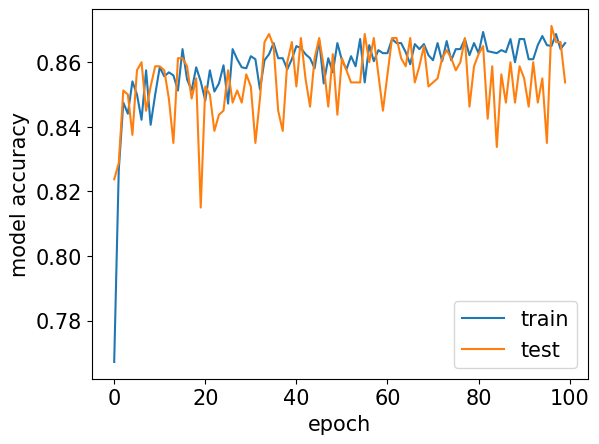

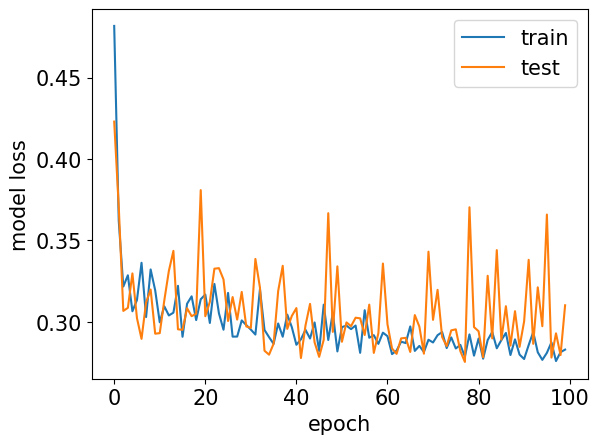

In [11]:
#Train and validate the model with best parameters found from gridsearch

# training parameters
batch_size = 50
epochs = 100

# create the deep neural net
best_DNN = compile_model(optimizer=grid_result.best_params_['optimizer'], lr=grid_result.best_params_['lr'], nlayers=3, units=20, activation=grid_result.best_params_['activation'] , dropout=0.01, rescale=1/50)

# train DNN and store training info in history
history = best_DNN.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=1,
                        validation_data=(x_valid, y_valid))

# evaluate model on validation set
score = best_DNN.evaluate(x_valid, y_valid, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

### Point 2
Take the best DNN from point 1 and study how its performance changes when the number N of
samples is
-  reduced
-  increased
-  augmented

Train: 400 	 Validation: 100
Epoch 1/100
8/8 [==============================] - 1s 34ms/step - loss: 0.6410 - accuracy: 0.6275 - val_loss: 0.5646 - val_accuracy: 0.7500
Epoch 2/100
8/8 [==============================] - 0s 5ms/step - loss: 0.5805 - accuracy: 0.6850 - val_loss: 0.5035 - val_accuracy: 0.7600
Epoch 3/100
8/8 [==============================] - 0s 5ms/step - loss: 0.5443 - accuracy: 0.7075 - val_loss: 0.4964 - val_accuracy: 0.7700
Epoch 4/100
8/8 [==============================] - 0s 5ms/step - loss: 0.5242 - accuracy: 0.6925 - val_loss: 0.4548 - val_accuracy: 0.7900
Epoch 5/100
8/8 [==============================] - 0s 7ms/step - loss: 0.5030 - accuracy: 0.7575 - val_loss: 0.4334 - val_accuracy: 0.7800
Epoch 6/100
8/8 [==============================] - 0s 5ms/step - loss: 0.4883 - accuracy: 0.7375 - val_loss: 0.4490 - val_accuracy: 0.8100
Epoch 7/100
8/8 [==============================] - 0s 5ms/step - loss: 0.4705 - accuracy: 0.7650 - val_loss: 0.4911 - val_accuracy: 0.75

8/8 [==============================] - 0s 5ms/step - loss: 0.3006 - accuracy: 0.8475 - val_loss: 0.3064 - val_accuracy: 0.8300
Epoch 60/100
8/8 [==============================] - 0s 5ms/step - loss: 0.2830 - accuracy: 0.8525 - val_loss: 0.3231 - val_accuracy: 0.8300
Epoch 61/100
8/8 [==============================] - 0s 5ms/step - loss: 0.2915 - accuracy: 0.8500 - val_loss: 0.3184 - val_accuracy: 0.8400
Epoch 62/100
8/8 [==============================] - 0s 5ms/step - loss: 0.2870 - accuracy: 0.8525 - val_loss: 0.2726 - val_accuracy: 0.8900
Epoch 63/100
8/8 [==============================] - 0s 5ms/step - loss: 0.2852 - accuracy: 0.8575 - val_loss: 0.2982 - val_accuracy: 0.8600
Epoch 64/100
8/8 [==============================] - 0s 5ms/step - loss: 0.2910 - accuracy: 0.8525 - val_loss: 0.2913 - val_accuracy: 0.8300
Epoch 65/100
8/8 [==============================] - 0s 5ms/step - loss: 0.3141 - accuracy: 0.8475 - val_loss: 0.3183 - val_accuracy: 0.8500
Epoch 66/100
8/8 [===============

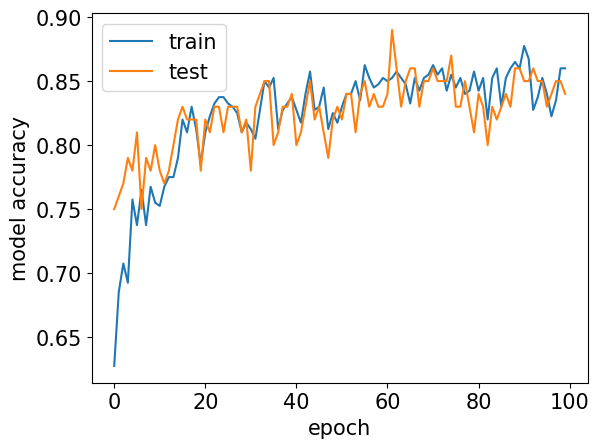

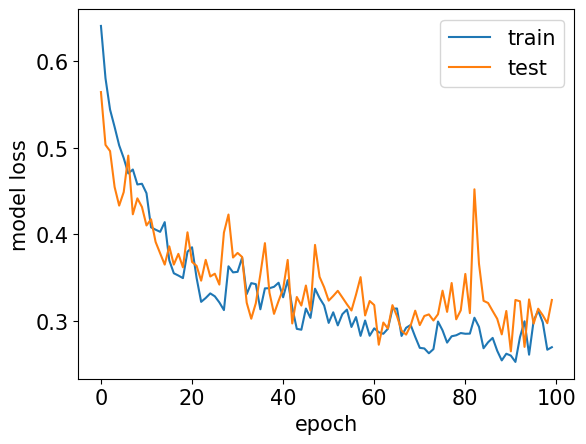

In [12]:
#REDUCED

# training parameters
batch_size = 50
epochs = 100

n_red = 500

x_red = x[:n_red, :n_red]
y_red = y[:n_red]

N_train = int(perc_train * n_red)

#splitting the data into test and train
(x_train, y_train) = (x_red[0:N_train],y_red[0:N_train])
(x_valid, y_valid) = (x_red[N_train:],y_red[N_train:])
print("Train:",len(x_train),"\t Validation:",len(x_valid))

# create the deep neural net
best_DNN = compile_model(optimizer=grid_result.best_params_['optimizer'], lr=grid_result.best_params_['lr'], nlayers=3, units=20, activation=grid_result.best_params_['activation'] , dropout=0.01, rescale=1/50)


# train DNN and store training info in history2
history2 = best_DNN.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=1,
                        validation_data=(x_valid, y_valid))

# evaluate model on validation set
score = best_DNN.evaluate(x_valid, y_valid, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history2

# summarize history2 for accuracy
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history2 for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

Train: 3200 	 Validation: 800
Epoch 1/100
704/704 [==============================] - 2s 1ms/step - loss: 0.4192 - accuracy: 0.7884 - val_loss: 0.2776 - val_accuracy: 0.8800
Epoch 2/100
704/704 [==============================] - 1s 1ms/step - loss: 0.3003 - accuracy: 0.8543 - val_loss: 0.2391 - val_accuracy: 0.8925
Epoch 3/100
704/704 [==============================] - 1s 1ms/step - loss: 0.2631 - accuracy: 0.8728 - val_loss: 0.2156 - val_accuracy: 0.8888
Epoch 4/100
704/704 [==============================] - 1s 1ms/step - loss: 0.2563 - accuracy: 0.8786 - val_loss: 0.2329 - val_accuracy: 0.8838
Epoch 5/100
704/704 [==============================] - 1s 1ms/step - loss: 0.2353 - accuracy: 0.8917 - val_loss: 0.2064 - val_accuracy: 0.9187
Epoch 6/100
704/704 [==============================] - 1s 1ms/step - loss: 0.2129 - accuracy: 0.9073 - val_loss: 0.1648 - val_accuracy: 0.9362
Epoch 7/100
704/704 [==============================] - 1s 1ms/step - loss: 0.1785 - accuracy: 0.9233 - val_loss:

Epoch 58/100
704/704 [==============================] - 1s 1ms/step - loss: 0.1155 - accuracy: 0.9502 - val_loss: 0.0950 - val_accuracy: 0.9500
Epoch 59/100
704/704 [==============================] - 1s 1ms/step - loss: 0.1190 - accuracy: 0.9481 - val_loss: 0.0864 - val_accuracy: 0.9575
Epoch 60/100
704/704 [==============================] - 1s 1ms/step - loss: 0.1178 - accuracy: 0.9497 - val_loss: 0.0867 - val_accuracy: 0.9700
Epoch 61/100
704/704 [==============================] - 1s 1ms/step - loss: 0.1182 - accuracy: 0.9489 - val_loss: 0.1485 - val_accuracy: 0.9237
Epoch 62/100
704/704 [==============================] - 1s 1ms/step - loss: 0.1159 - accuracy: 0.9511 - val_loss: 0.0642 - val_accuracy: 0.9675
Epoch 63/100
704/704 [==============================] - 1s 1ms/step - loss: 0.1131 - accuracy: 0.9514 - val_loss: 0.1439 - val_accuracy: 0.9300
Epoch 64/100
704/704 [==============================] - 1s 1ms/step - loss: 0.1139 - accuracy: 0.9520 - val_loss: 0.0887 - val_accuracy:

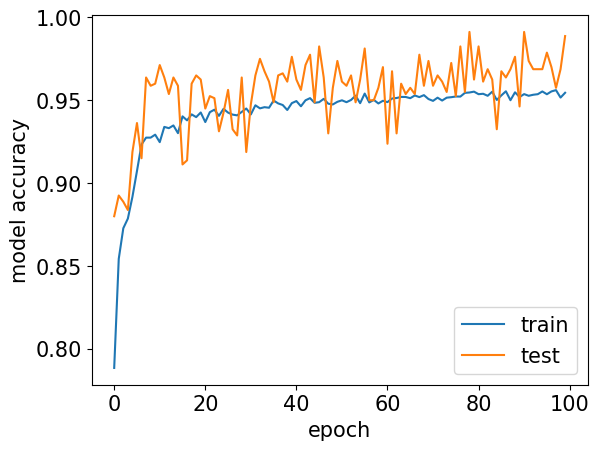

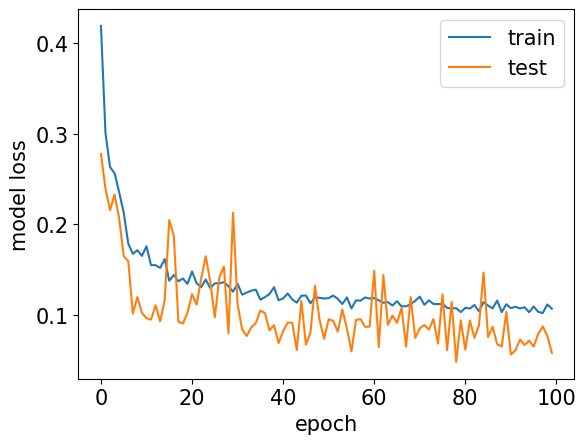

In [18]:
#AUGMENTED

# training parameters
batch_size = 50
epochs = 100

N = len(x)
N_train = int(perc_train * N)

#splitting the data into test and train
(x_train, y_train) = (x[0:N_train],y[0:N_train])
(x_valid, y_valid) = (x[N_train:],y[N_train:])
print("Train:",len(x_train),"\t Validation:",len(x_valid))

s1 = np.std(x_train[:,0])/20
s2 = np.std(x_train[:,1])/20

#generate 10 new training instances from each old instance
factor = 10

x_aug = x_train
y_aug = y_train

for i in range(factor):
    x_aug = np.append(x_aug, x_train + np.random.multivariate_normal(mean=[0,0], cov=np.diag([s1,s2]), size=N_train), axis = 0)
    y_aug = np.append(y_aug, y_train, axis = 0)


# create the deep neural net
best_DNN = compile_model(optimizer=grid_result.best_params_['optimizer'], lr=grid_result.best_params_['lr'], nlayers=3, units=20, activation=grid_result.best_params_['activation'] , dropout=0.01, rescale=1/50)


# train DNN and store training info in history
history = best_DNN.fit(x_aug, y_aug,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=1,
                        validation_data=(x_valid, y_valid))

# evaluate model on validation set
score = best_DNN.evaluate(x_valid, y_valid, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

**Comments on the result:** From the performed gridsearch it emerges that the best parameterse are Adamax as optimizers, 0.1 as learning rate and elu as activation function for neuron of our DNN. We notice how the augmentation of the dataset leads to a significant smaller training error with respect to the training considering the original dataset. Moreover, we also noticed how a reduction in the considered dataset leads to worst performances. For the shifts, a small value compared to the standard deviation of the dataset was chosen so to have a general definition. The validation set is not augmented because it would me meaningless to validate a model on fancy data. 